# **"Wheels & Algorithms: Forecasting Bike Rentals Count"**

##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

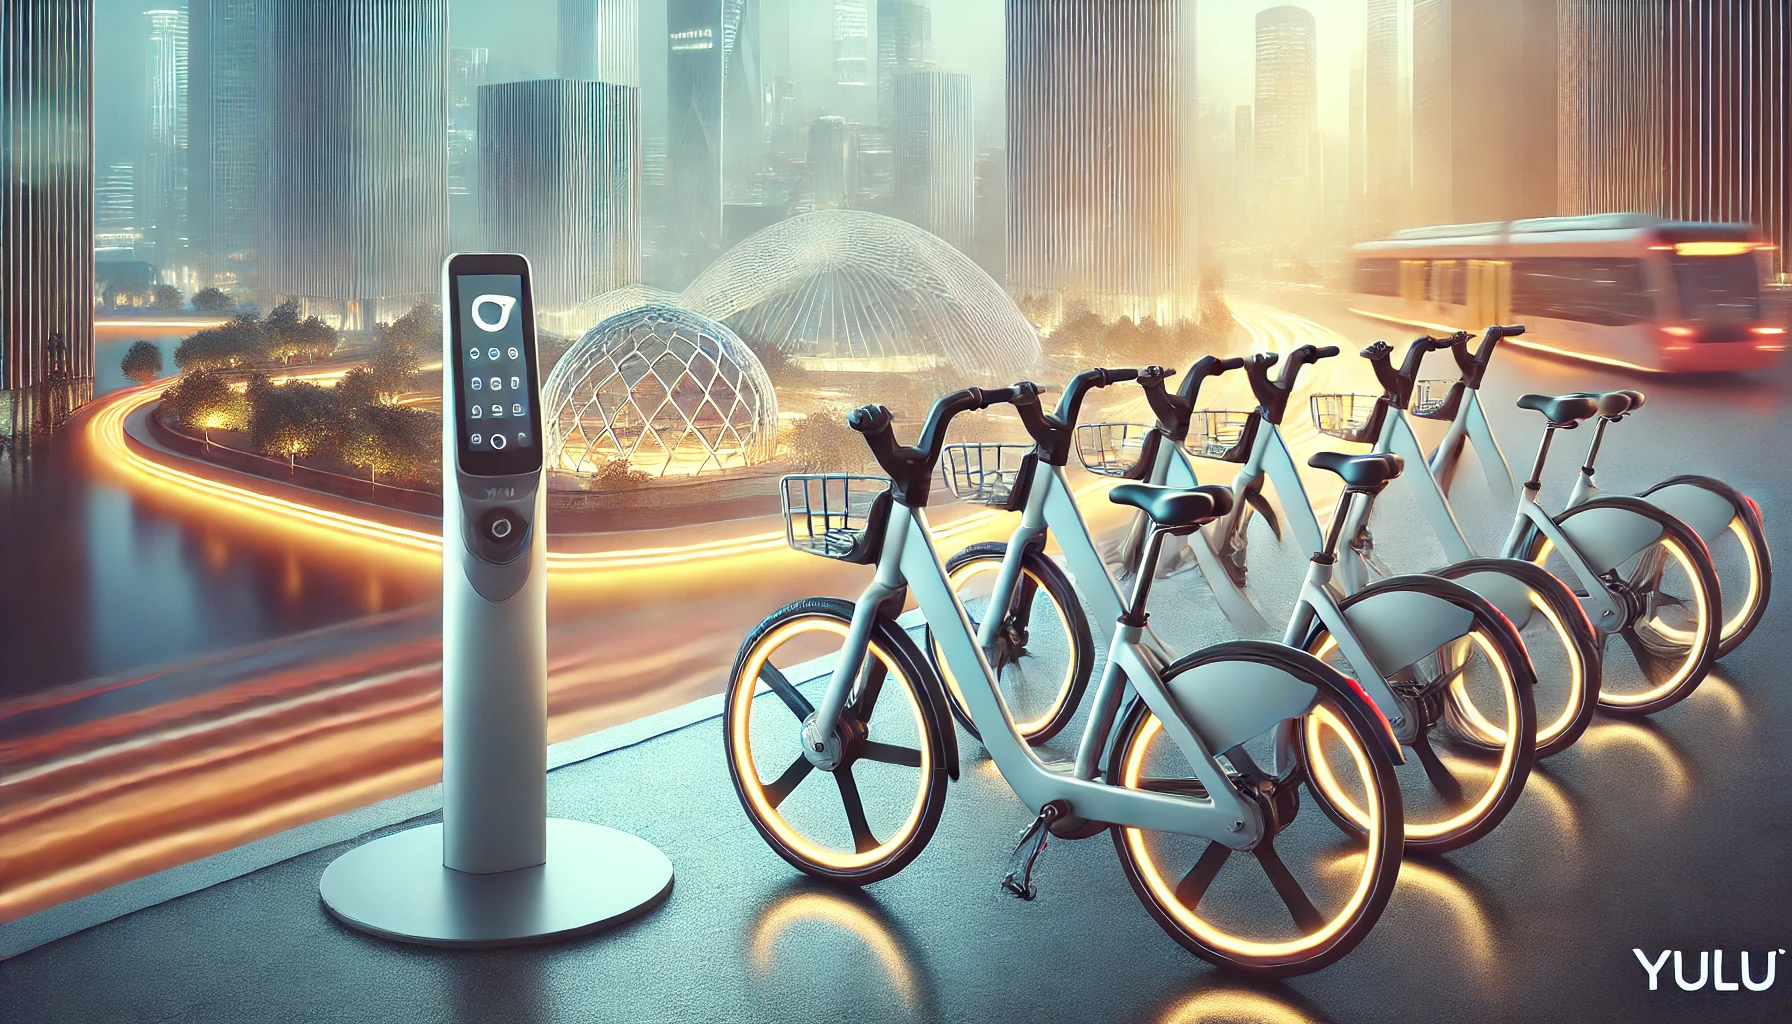



In today’s fast-paced urban environment, sustainable and efficient transportation is essential. Companies like Yulu Bike provide eco-friendly bike-sharing services, promoting green mobility. However, optimizing fleet distribution and availability remains a challenge. Accurate prediction of bike demand can significantly improve operational efficiency, enhance customer experience, and optimize resource allocation.

This project aims to develop a machine learning model that predicts bike-sharing demand based on various factors, including weather conditions, time of day, and special events. By leveraging historical data and statistical techniques, Yulu Bike can better understand demand fluctuations and improve its service offerings.



# **GitHub Link -**

# **Problem Statement**


In the dynamic urban transportation sector, efficient bike-sharing services play a crucial role in promoting eco-friendly mobility. Yulu Bike, a leading bike-sharing company, faces challenges in accurately predicting bike demand due to fluctuating user behavior influenced by weather conditions, time of day, special events, and seasonal variations.

An inability to anticipate demand effectively leads to fleet mismanagement, low customer satisfaction, and operational inefficiencies, including excess idle bikes in low-demand areas and shortages in high-demand zones.

This project aims to develop a data-driven predictive model that can forecast bike rental demand based on historical data and external factors. By leveraging machine learning techniques, the model will enable Yulu Bike to:

Optimize fleet distribution to ensure bike availability during peak hours.
Enhance user experience by reducing wait times and improving accessibility.
Improve operational efficiency by optimizing maintenance schedules and resource allocation.
The objective is to create an accurate and reliable forecasting system that empowers Yulu Bike with actionable insights to maximize utilization, reduce operational costs, and enhance overall service efficiency.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [185]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import shapiro
import scipy.stats as stats


### Dataset Loading

In [186]:
# Load Dataset
df=pd.read_csv('/content/SeoulBikeData (2).csv',encoding='ISO-8859-1')

In [187]:
df2=df.copy()

### Dataset First View

In [188]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Dataset Rows & Columns count

In [190]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [191]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [192]:
df.describe(include='object')

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

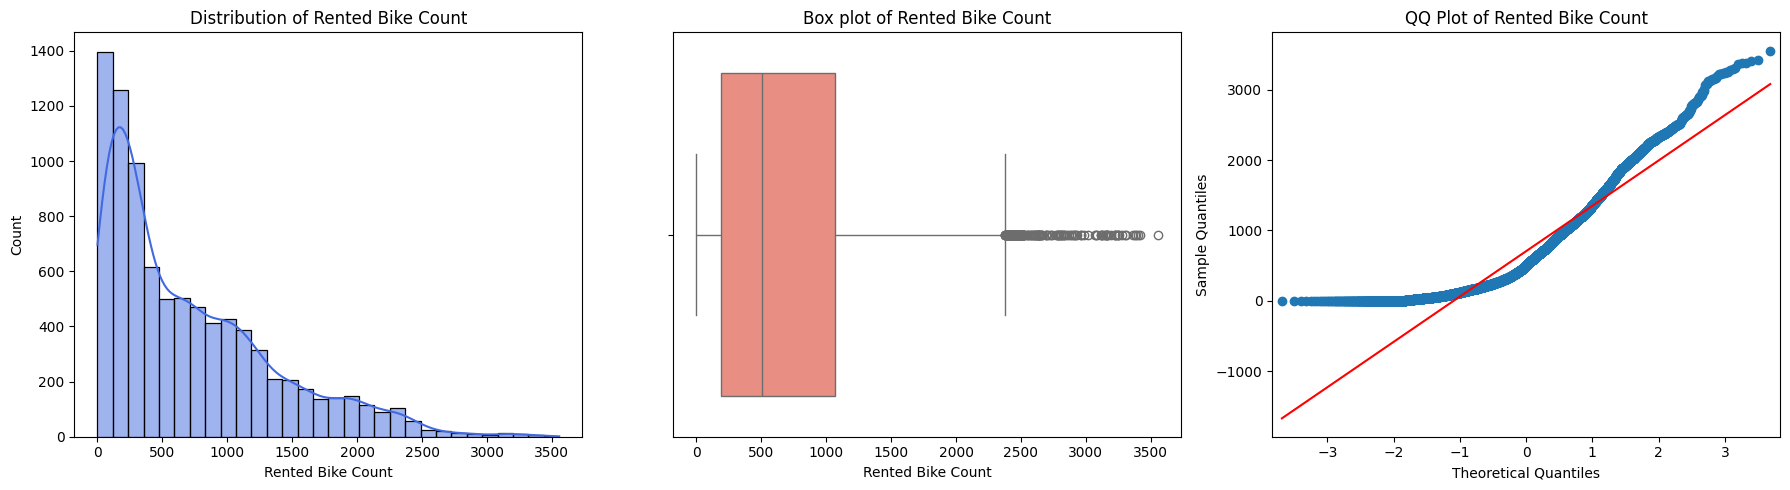

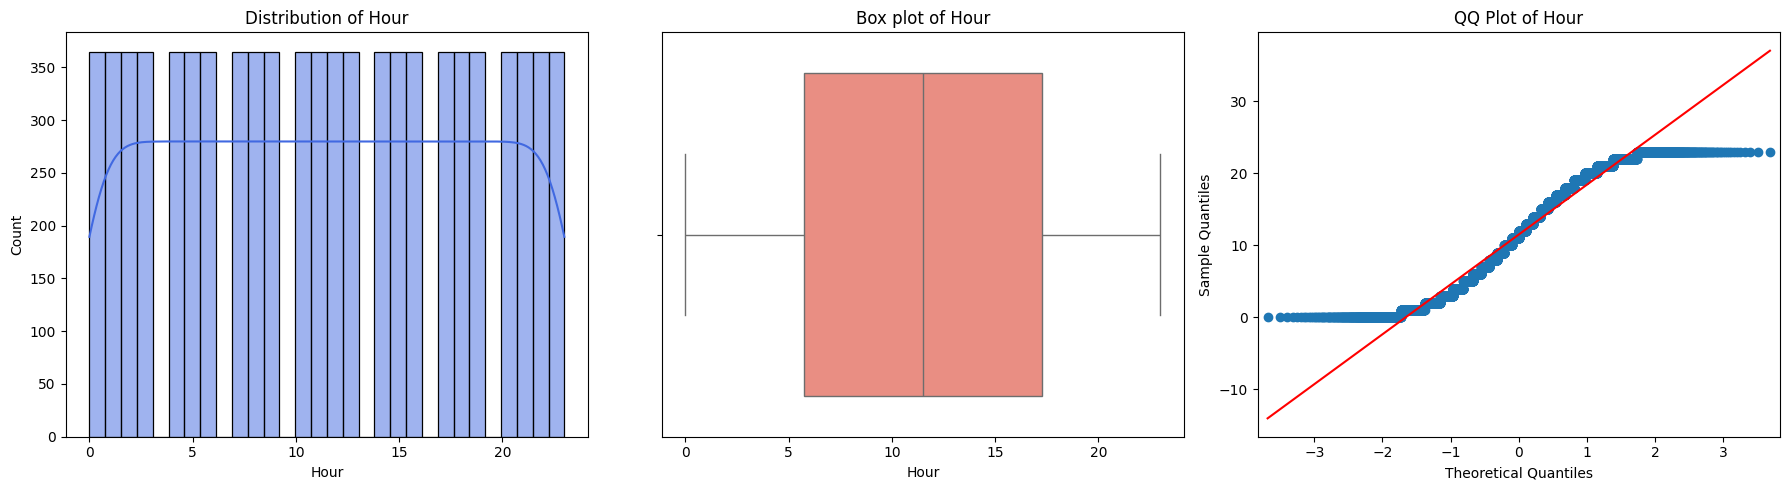

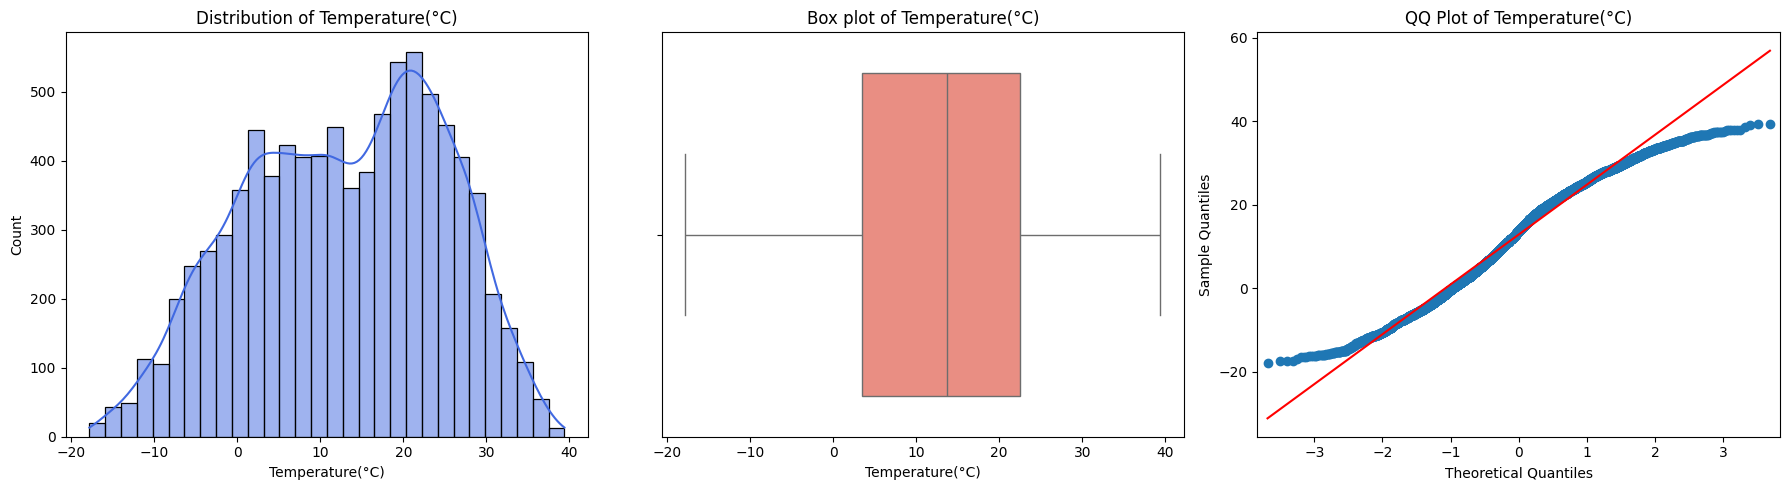

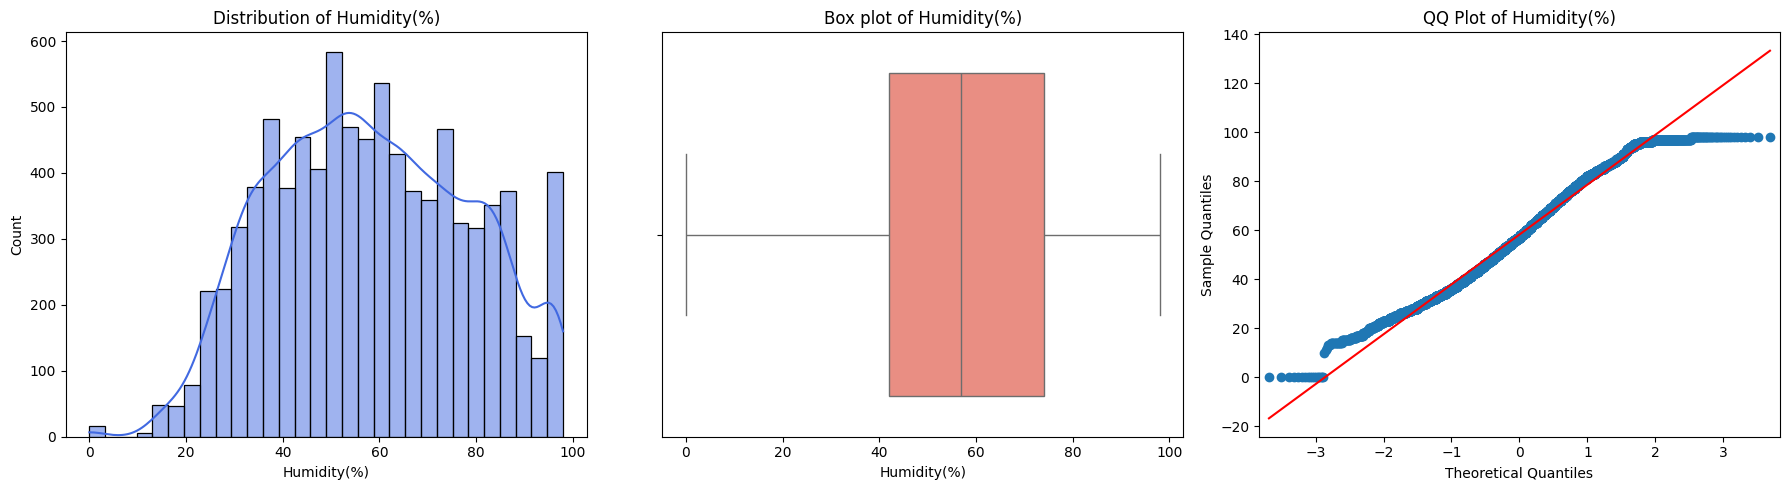

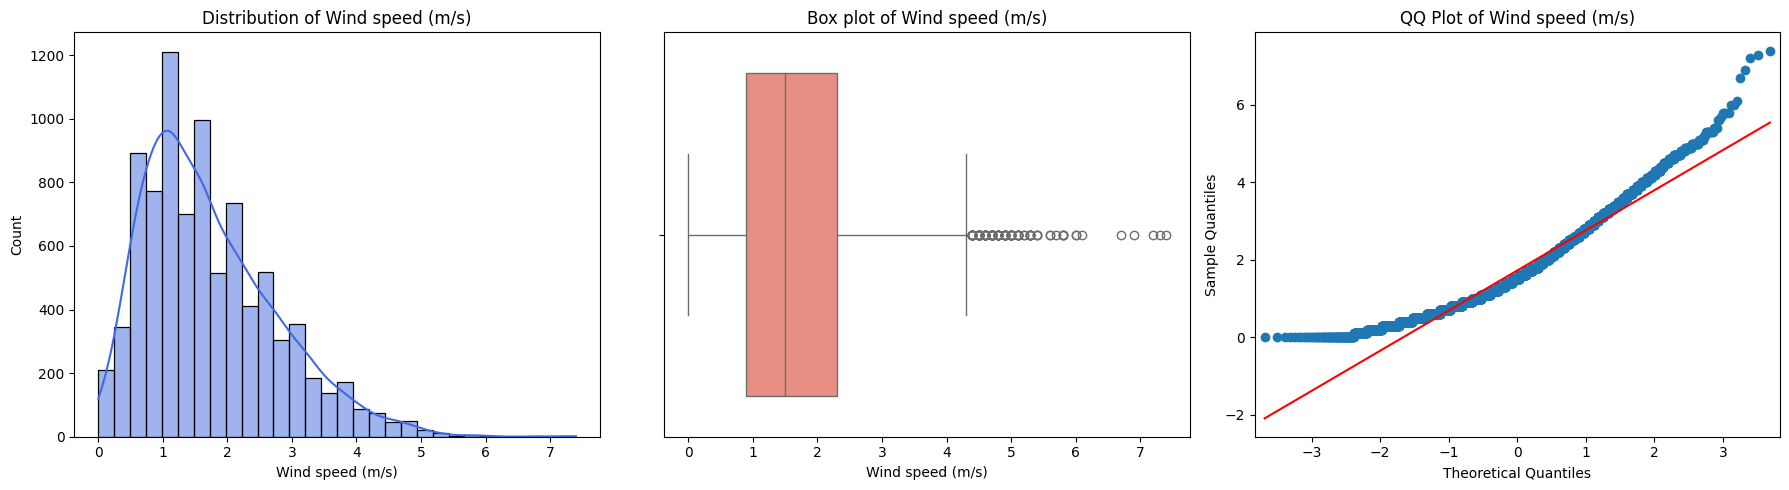

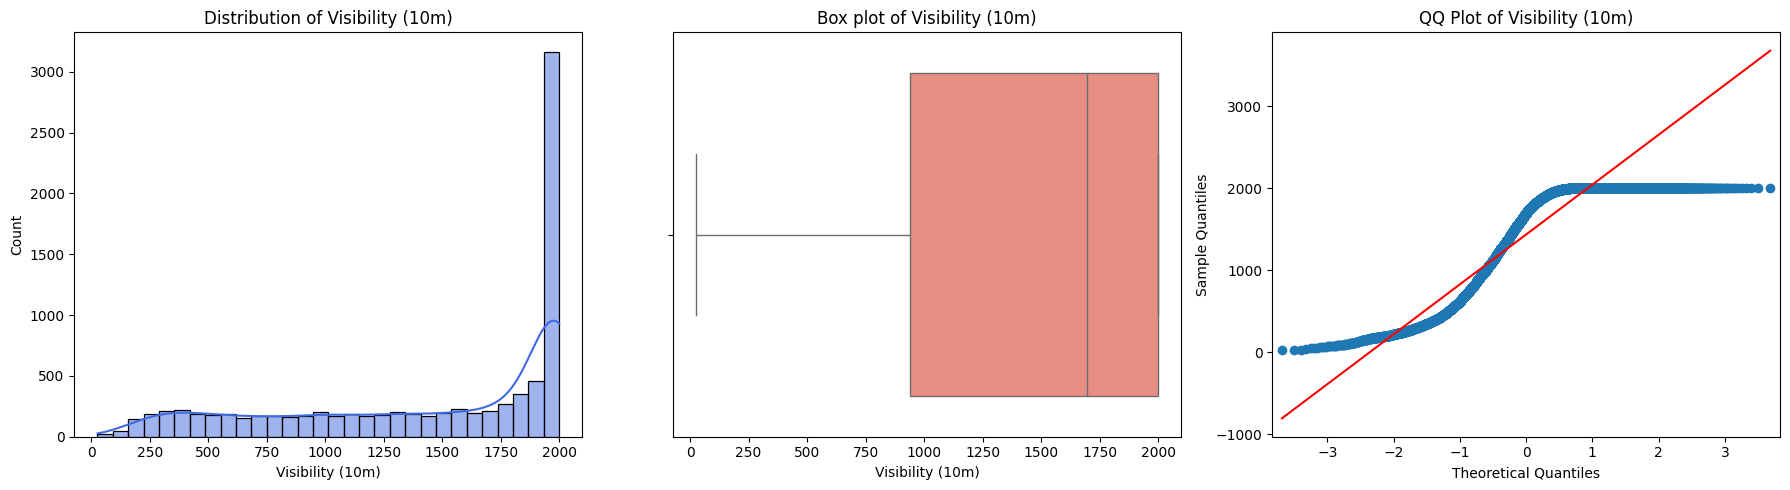

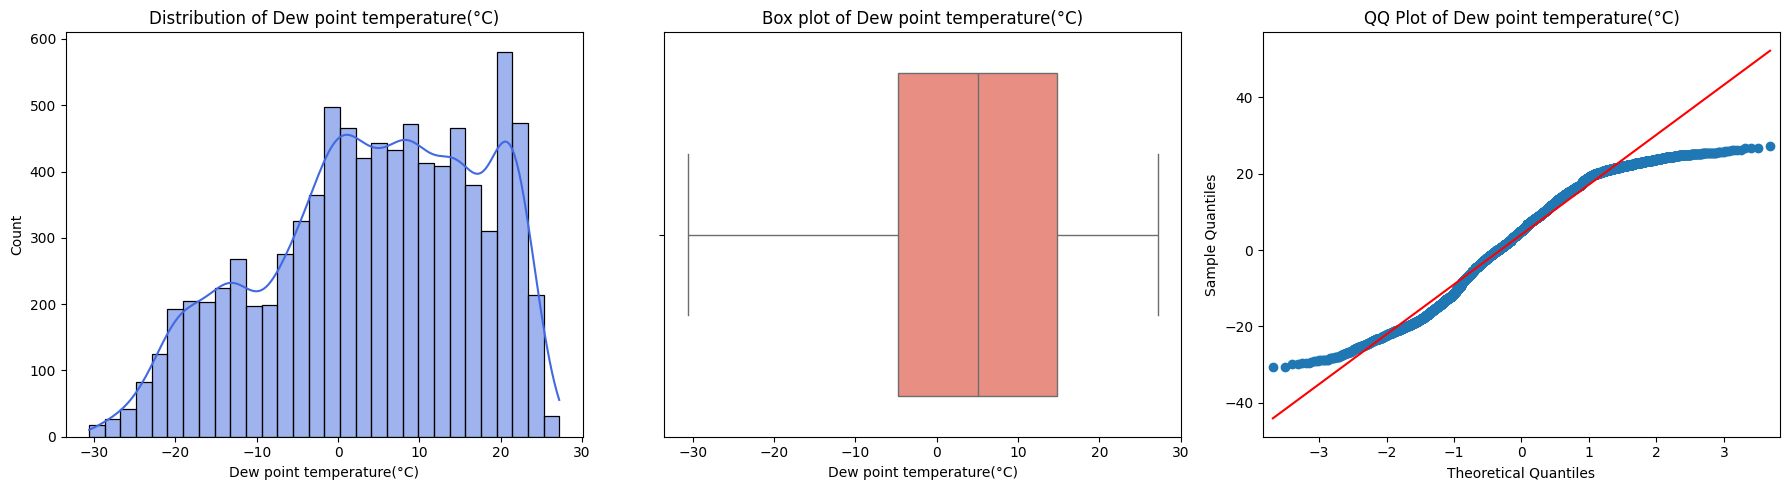

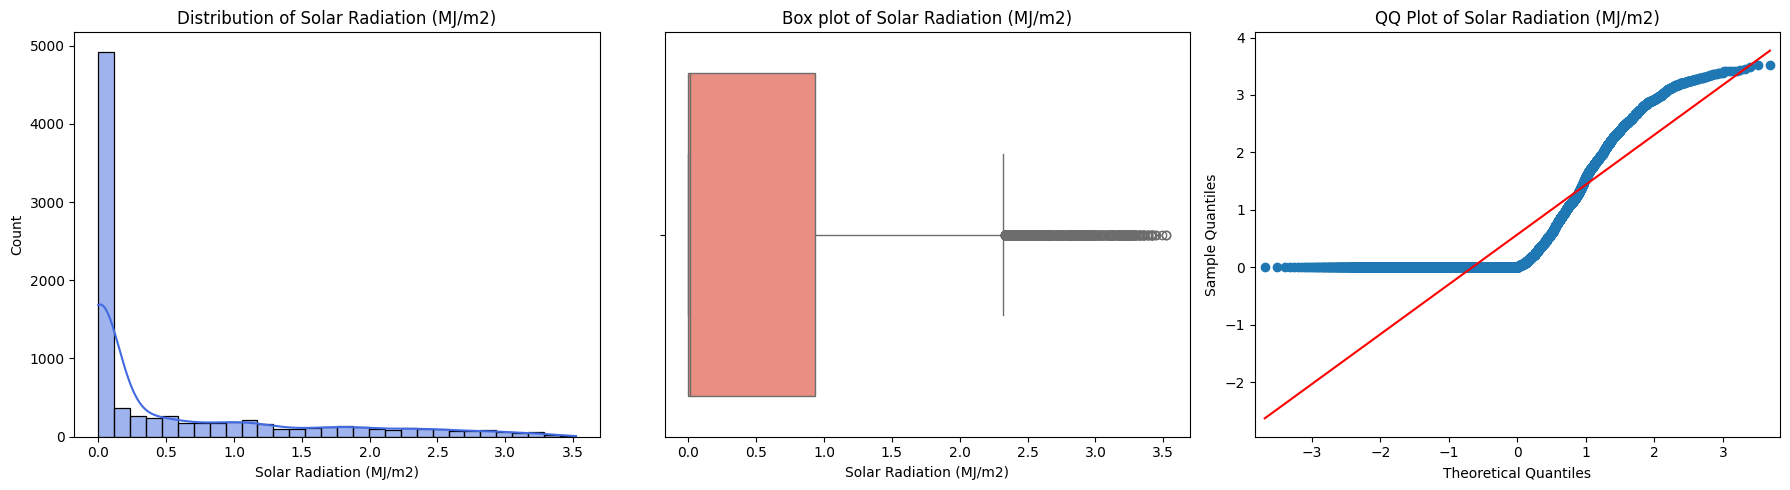

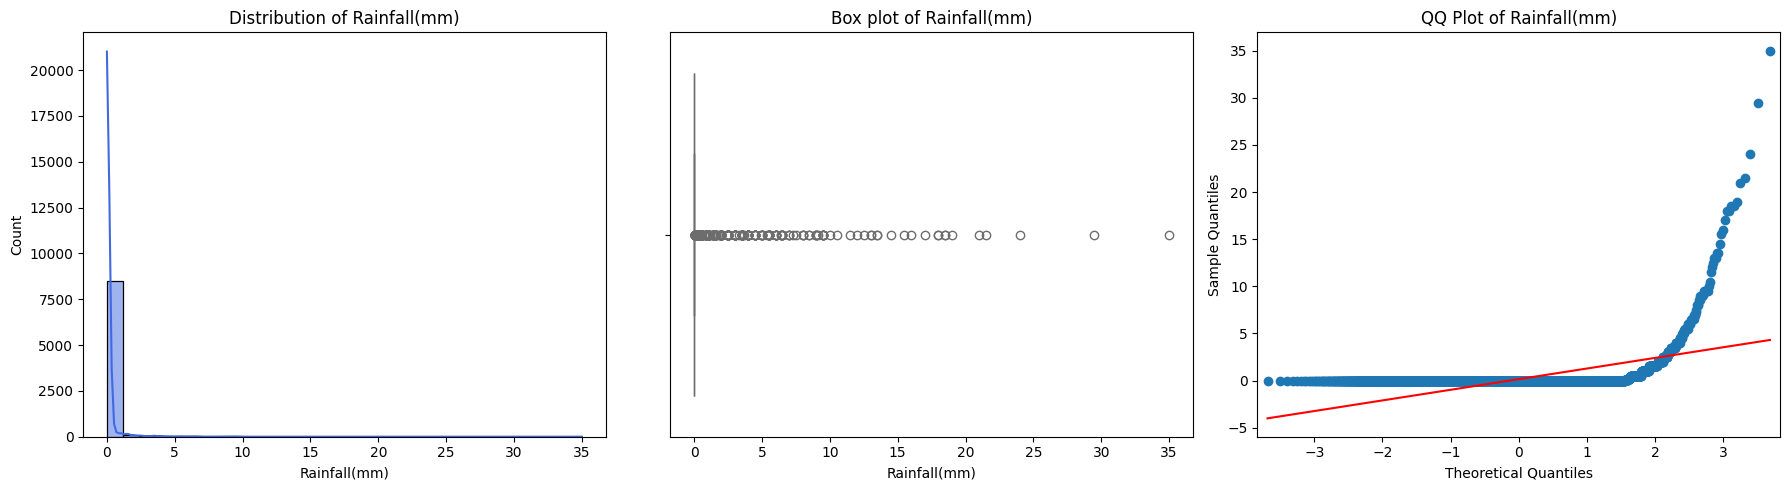

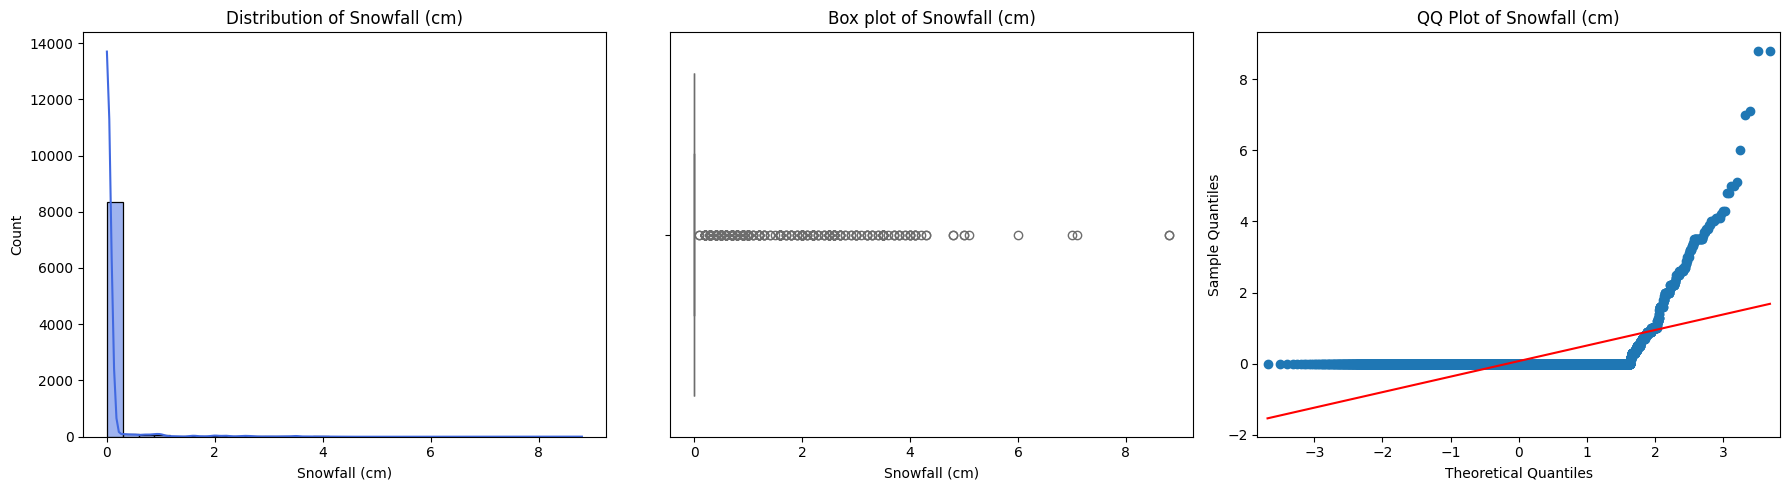

In [193]:

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1️⃣ Histogram & KDE Plot
    sns.histplot(df[col], kde=True, bins=30, ax=axes[0], color='royalblue')
    axes[0].set_title(f"Distribution of {col}")

    # 2️⃣ Box Plot
    sns.boxplot(x=df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Box plot of {col}")

    # 3️⃣ QQ Plot
    sm.qqplot(df[col], line='s', ax=axes[2])
    axes[2].set_title(f"QQ Plot of {col}")

    plt.tight_layout()
    plt.show()


# **Data Manupulations**

In [194]:
# converting date to datetime format and making new columns of Date,Year,Month,Day
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()


df['Hour_int'] = df['Hour'].astype(int)
# Defining conditions and  making categories based on Hour_int
conditions = [
    (df['Hour_int'] >= 0) & (df['Hour_int'] < 6),   # Late Night
    (df['Hour_int'] >= 6) & (df['Hour_int'] < 12),  # Morning
    (df['Hour_int'] >= 12) & (df['Hour_int'] < 15), # Afternoon
    (df['Hour_int'] >= 15) & (df['Hour_int'] < 18), # Evening
    (df['Hour_int'] >= 18) & (df['Hour_int'] <= 23) # Night
]

categories = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']

# Create TimeCategory column
df['TimeCategory'] = np.select(conditions, categories, default='Unknown')

df['IsWeekend'] = df['Weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# **Custom Functions**

In [195]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(categorize_hour)


In [196]:
def categorize_weather(row):#making categories for snowy,
    if row['Snowfall (cm)'] > 0:
        return 'Snowy'
    elif row['Rainfall(mm)'] > 0:
        return 'Rainy'
    elif row['Solar Radiation (MJ/m2)'] > 2:
        return 'Sunny'
    else:
        return 'Cloudy'

df['WeatherCondition'] = df.apply(categorize_weather, axis=1)


In [197]:
def wind_category(speed):#making categories on Wind speed like calm,light Breeze,strong wind
    if speed < 1:
        return 'Calm'
    elif speed < 3:
        return 'Light Breeze'
    elif speed < 7:
        return 'Moderate Breeze'
    else:
        return 'Strong Wind'

df['WindCategory'] = df['Wind speed (m/s)'].apply(wind_category)
df['IsPeakHour'] = df['Hour'].apply(lambda x: 1 if x in [7, 8, 17, 18] else 0)
season_mapping = {'Spring': 'Mild', 'Summer': 'Hot', 'Autumn': 'Cool', 'Winter': 'Cold'}
df['SeasonType'] = df['Seasons'].map(season_mapping)


In [198]:
def demand_category(count):
    if count < 500:
        return 'Low Demand'
    elif count < 1500:
        return 'Medium Demand'
    else:
        return 'High Demand'

df['BikeDemandCategory'] = df['Rented Bike Count'].apply(demand_category)

In [199]:
df['IsHolidayBinary'] = df['Holiday'].apply(lambda x: 1 if x != 'No Holiday' else 0)
df['IsFunctioningDayBinary'] = df['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)


#### Duplicate Values

#### Missing Values/Null Values

In [200]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
Day                          0
Weekday                      0
Hour_int                     0
TimeCategory                 0
IsWeekend                    0
TimeOfDay                    0
WeatherCondition             0
WindCategory                 0
IsPeakHour                   0
SeasonType                   0
BikeDemandCategory           0
IsHolidayBinary              0
IsFunctioningDayBinary       0
dtype: int64

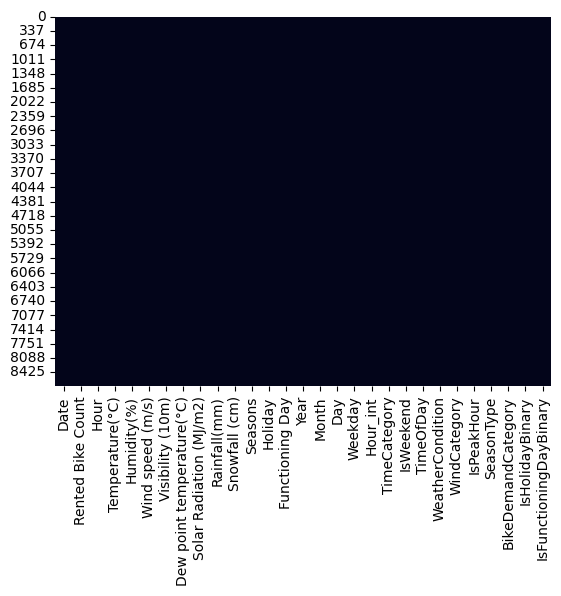

In [201]:
#visualizing null values
sns.heatmap(df.isnull(), cbar=False);


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [202]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  ...  TimeCategory IsWeekend  \
0                         0.0           0.0  ...    Late Night   Weekday   
1                         0.0           0.0  ...    Late Night   Weekday   
2                         0.0           0.0  ...    Late Night   Weekday   
3                         0.0           0.0  ...    Late Night   Weekday   
4                         0.0           0.0  ...    Late Night   Weekday   
...                       ...           ...  ...           ...       ...   
8755                      0.0           0.0  ...         Night   Weekday   
8756                      0.0           0.0  ...         Night   Weekday   
8757                      0.0           0.0  ...         Night   Weekday   
8758                      0.0           0.0  ...         Night   Weekday   
8759                      0.0           0.0  ...         Night   Weekday   

     TimeOfDay WeatherCondition  WindCategory  IsPeakHour  SeasonType  \
0        Night           Cloudy  Light Breeze           0        Cold   
1        Night           Cloudy          Calm           0        Cold   
2        Night           Cloudy  Light Breeze           0        Cold   
3        Night           Cloudy          Calm           0        Cold   
4        Night           Cloudy  Light Breeze           0        Cold   
...        ...              ...           ...         ...         ...   
8755   Evening           Cloudy  Light Breeze           0        Cool   
8756   Evening           Cloudy  Light Breeze           0        Cool   
8757     Night           Cloudy          Calm           0        Cool   
8758     Night           Cloudy  Light Breeze           0        Cool   
8759     Night           Cloudy  Light Breeze           0        Cool   

     BikeDemandCategory  IsHolidayBinary IsFunctioningDayBinary  
0            Low Demand                0                      1  
1            Low Demand                0                      1  
2            Low Demand                0                      1  
3            Low Demand                0                      1  
4            Low Demand                0                      1  
...                 ...              ...                    ...  
8755      Medium 

In [203]:
# Dataset Describe
df.describe()

Date  Rented Bike Count         Hour  \
count                           8760        8760.000000  8760.000000   
mean   2018-05-31 23:59:59.999999744         704.602055    11.500000   
min              2017-12-01 00:00:00           0.000000     0.000000   
25%              2018-03-02 00:00:00         191.000000     5.750000   
50%              2018-06-01 00:00:00         504.500000    11.500000   
75%              2018-08-31 00:00:00        1065.250000    17.250000   
max              2018-11-30 00:00:00        3556.000000    23.000000   
std                              NaN         644.997468     6.922582   

       Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count      8760.000000  8760.000000       8760.000000       8760.000000   
mean         12.882922    58.226256          1.724909       1436.825799   
min         -17.800000     0.000000          0.000000         27.000000   
25%           3.500000    42.000000          0.900000        940.000000   
50%          13.700000    57.000000          1.500000       1698.000000   
75%          22.500000    74.000000          2.300000       2000.000000   
max          39.400000    98.000000          7.400000       2000.000000   
std          11.944825    20.362413          1.036300        608.298712   

       Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                8760.000000              8760.000000   8760.000000   
mean                    4.073813                 0.569111      0.148687   
min                   -30.600000                 0.000000      0.000000   
25%                    -4.700000                 0.000000      0.000000   
50%                     5.100000                 0.010000      0.000000   
75%                    14.800000                 0.930000      0.000000   
max                    27.200000                 3.520000     35.000000   
std                    13.060369                 0.868746      1.128193   

       Snowfall (cm)         Year        Month          Day     Hour_int  \
count    8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean        0.075068  2017.915068     6.526027    15.720548    11.500000   
min         0.000000  2017.000000     1.000000     1.000000     0.000000   
25%         0.000000  2018.000000     4.000000     8.000000     5.750000   
50%         0.000000  2018.000000     7.000000    16.000000    11.500000   
75%         0.000000  2018.000000    10.000000    23.000000    17.250000   
max         8.800000  2018.000000    12.000000    31.000000    23.000000   
std         0.436746     0.278796     3.448048     8.796749     6.922582   

        IsPeakHour  IsHolidayBinary  IsFunctioningDayBinary  
count  8760.000000      8760.000000             8760.000000  
mean      0.166667         0.049315                0.966324  
min       0.000000         0.000000                0.000000  
25%       0.000000         0.000000                1.000000  
50%       0.000000         0.000000                1.000000  
75%       0.000000         0.000000                1.000000  
max       1.000000         1.000000                1.000000  
std       0.372699         0.216537                0.180404

### Variables Description



*   Date: The date of observation.


*   Hour: The hour of the day (ranging from 0 to 23).


*   Temperature: The recorded temperature on a given day.


*   Humidity: The humidity level measured in the environment.

*   Windspeed: The speed of the wind at the time of observation.


*   Visibility: A measure of how far one can see in the atmosphere.



*  Dew Point Temperature: The temperature at which dew forms, indicating moisture content in the air.



*   Solar Radiation: The amount of solar radiation measured.


*   Rainfall: The recorded amount of rainfall in millimeters (mm).

*   Snowfall: The recorded amount of snowfall.


*   Seasons: The season of the year, represented numerically (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).

*   Holiday: Indicates whether the day is a holiday (Yes/No).


*   Functional Day: Indicates whether the day is a working/functional day (Yes/No).









### Check Unique Values for each variable.

In [204]:
# bike_df.nunique()
for i in df.columns.tolist():
  print(f"No. of unique values in {i} is {df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.
No. of unique values in Year is 2.
No. of unique values in Month is 12.
No. of unique values in Day is 31.
No. of unique values in Weekday is 7.
No. of unique values in Hour_int is 24.
No. of unique values in TimeCategory is 5.
No. of unique values in IsWeekend is 2.
No. of unique values in TimeOfDay is 4.
No. of unique values in WeatherCondition is 4.
No. of 

## 3. ***Data Wrangling***

### Data Wrangling Code

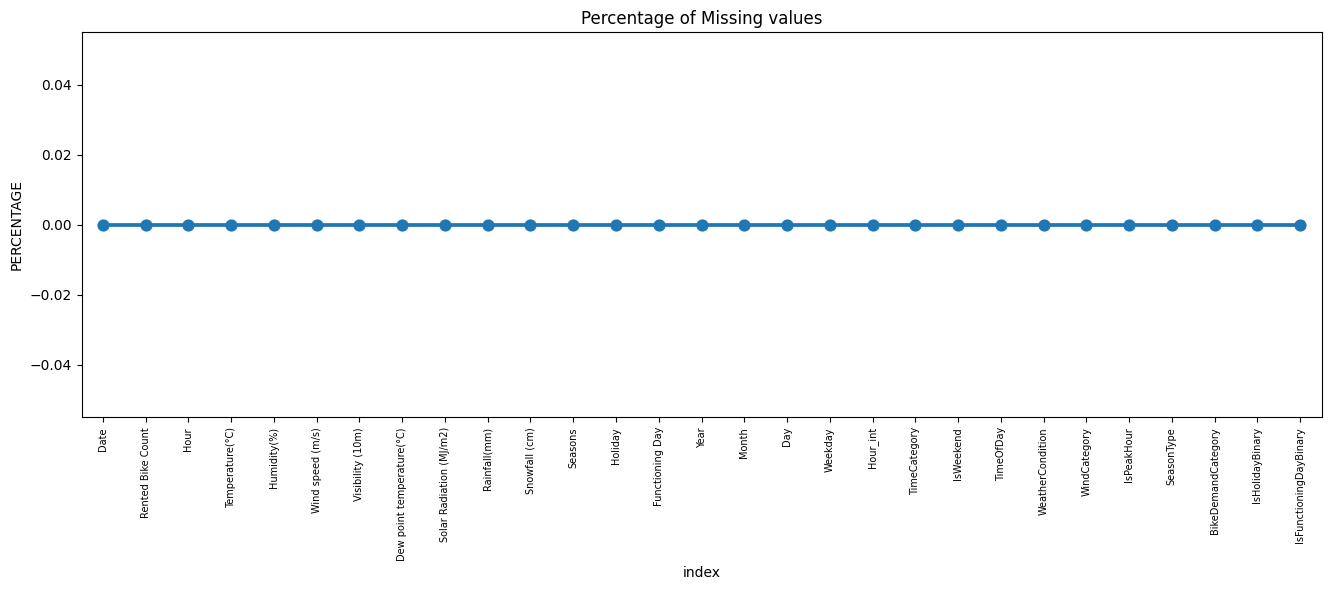

In [205]:
# Visualizing the missing values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [206]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)


The number of duplicate values in the data set is =  0


In [207]:
#Renaming the complex columns name
bike_df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Monthly Trends in Rented Bike Counts 🚴📅**

In [208]:
cols=['Hour','Month']
for col in cols:
  df[col]=df[col].astype('category')


<ipython-input-209-d572de76fc91>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='Rented Bike Count', ax=ax,
<ipython-input-209-d572de76fc91>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Month'].unique(), fontsize=12, rotation=45)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


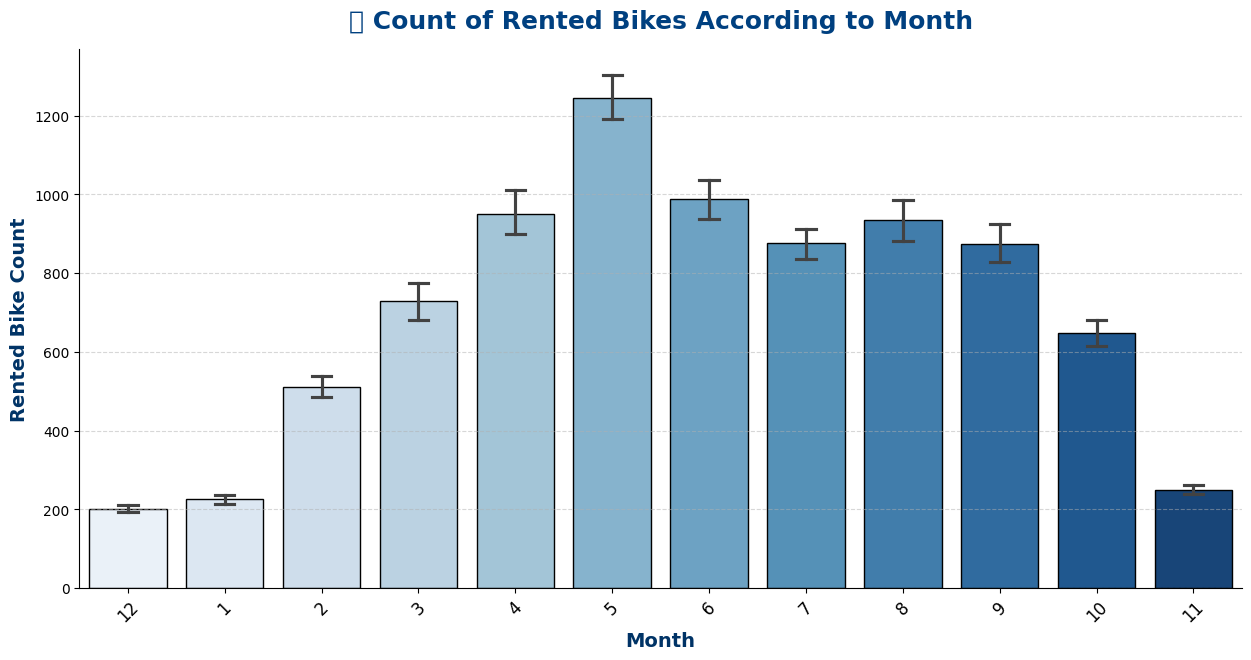

In [209]:
# Creating figure and axis
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(data=df, x='Month', y='Rented Bike Count', ax=ax,
            capsize=0.2, palette="Blues", edgecolor='black')

# Seting title
ax.set_title('📊 Count of Rented Bikes According to Month', fontsize=18, fontweight='bold', color='#004080', pad=15)
ax.set_xlabel('Month', fontsize=14, fontweight='bold', color='#003366')
ax.set_ylabel('Rented Bike Count', fontsize=14, fontweight='bold', color='#003366')
ax.set_xticklabels(df['Month'].unique(), fontsize=12, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart with error bars was chosen because it effectively visualizes the monthly trend of rented bike counts. The use of color gradients enhances readability, while the error bars provide insights into variability and confidence intervals, ensuring a more robust interpretation of the data.

##### 2. What is/are the insight(s) found from the chart?



*   Winter (December – February) ❄️

Low bike rentals (as seen in December, January, and February).
Cold temperatures, snow, and icy roads discourage biking.
People prefer public transport or personal vehicles over cycling in extreme cold.

*  Spring (March – May) 🌸

Steady increase in bike rentals, peaking in May.
Warmer temperatures, blossoming trees, and pleasant weather encourage outdoor activities.
Festivals and tourism also contribute to increased bike usage.


*   Summer (June – August) 🌞🌧️

Rentals remain high but slightly dip from May.
June and July experience monsoon rains (Jangma season), reducing cycling activity.
Despite high temperatures, some people still use bikes, especially on drier days.
*   Autumn (September – November) 🍁

Gradual decline in rentals as temperatures drop.
September and October still have good biking weather with cooler temperatures and clear skies.
November sees a sharp decline as winter approaches.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*  ✅ Better resource allocation: More bikes should be made available in spring and autumn, while fewer are needed in winter.
*   ✅ Seasonal pricing & promotions: Discounts in winter months can help boost rentals, while peak pricing can be applied in May.


*   ✅ Weather-based planning: Preparing for lower rentals in monsoon season can help in inventory management.







# **Hourly Distribution of Bike Rentals 🚴⏳ (Peak vs Non-Peak Hours)**


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


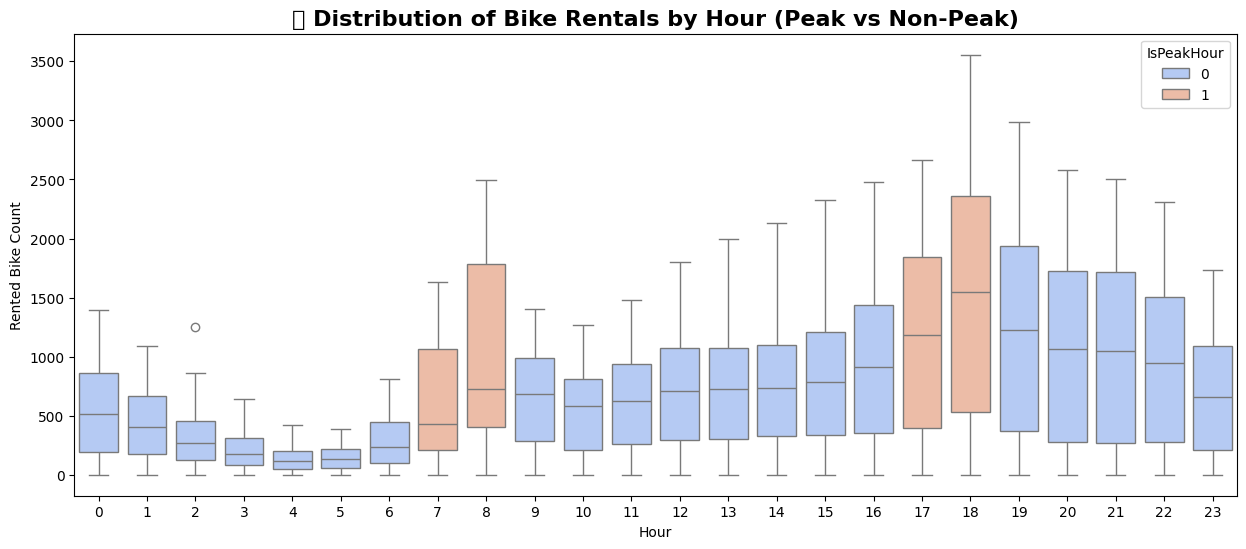

In [210]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=df, x='Hour', y='Rented Bike Count', hue='IsPeakHour', palette='coolwarm', ax=ax)
ax.set_title('📊 Distribution of Bike Rentals by Hour (Peak vs Non-Peak)', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?



*   It effectively shows the distribution of bike rentals across different hours.

*  It highlights peak vs. non-peak hours using color differentiation.

*  It provides insights into median rentals, variability, and outliers at different times of the day.

*  It helps compare rental trends during peak hours (morning & evening rush) vs. off-peak hours.



##### 2. What is/are the insight(s) found from the chart?



* Peak Hours (7-9 AM & 5-7 PM) have the highest bike rentals.
These hours align with commuter trends (people going to and from work).
*   The highest rental count occurs at 8 AM and 6 PM.
*   Non-Peak Hours have lower and more stable rentals.


*   Late-night (12 AM - 5 AM) and mid-day (10 AM - 3 PM) rentals are low.

*   Greater variability during peak hours.


*   Peak hours show a wider range of rentals, indicating different usage patterns depending on the day.

*  Outliers present in non-peak hours (especially around 2 AM & 3 PM).


*  This could indicate occasional surges due to specific events or weather conditions.



##### 3. Will the gained insights help creating a positive business impact?



*   Dynamic Pricing: Higher rates during peak hours and discounts during non-peak times.

*   Bike Redistribution: Ensure enough bikes are available at peak times/locations.



*  Targeted Promotions: Offer discounts or incentives for off-peak rentals to balance demand.

*  Infrastructure Planning: Expand docking stations in high-demand areas for morning and evening commutes.





# **Seasonal Variation in Bike Rentals 🚴❄️🌸☀️🍂"**

<ipython-input-211-ba7c179758cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Seasons', y='Rented Bike Count', palette='viridis', ax=ax)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


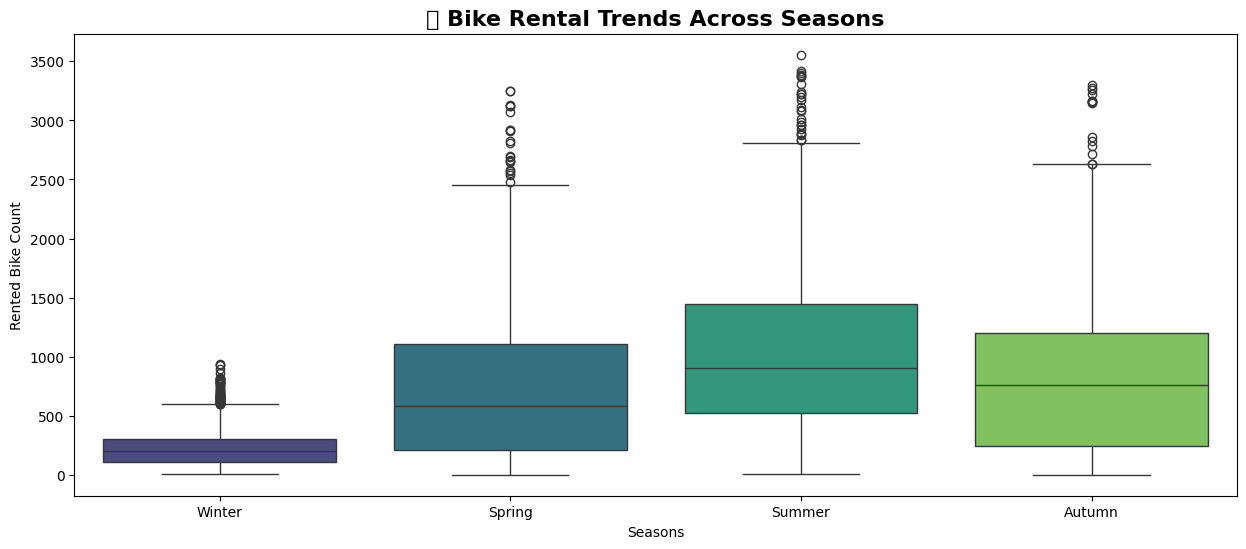

In [211]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=df, x='Seasons', y='Rented Bike Count', palette='viridis', ax=ax)
ax.set_title('🌦️ Bike Rental Trends Across Seasons', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?


*   It effectively visualizes seasonal variations in bike rentals.

*   It shows the median, distribution, and spread of rentals for each season.


*  It highlights outliers, which may indicate extreme rental days.

*   It allows easy comparison of bike rental trends across different seasons.






##### 2. What is/are the insight(s) found from the chart?



*  Winter has the lowest bike rentals
    *  The median rental count is significantly lower.
    *   The range is much narrower, meaning demand remains consistently low.
    *   Some outliers indicate a few days of relatively higher rentals, possibly due to special events.

*  Spring, Summer, and Autumn have significantly higher rentals.
   *   The highest rental counts occur in Summer and Autumn, indicating favorable weather conditions.
   *   Spring and Autumn have similar trends, with slightly lower rentals than Summer.
   *   Summer has the most outliers, suggesting occasional peak rental days.



*  Bike rentals increase as seasons transition from Winter to Summer.
   *   This suggests a strong correlation between weather conditions and biking preferences.




##### 3. Will the gained insights help creating a positive business impact?


Seasonal Pricing Strategy:
*  Offer discounts in Winter to encourage usage.
*  Charge higher rates in Summer and Autumn when demand is highest.

Inventory and Maintenance Planning:


*   Allocate more bikes for Spring, Summer, and Autumn.

*   Reduce bike availability and maintenance staff in Winter to cut costs.

Marketing Campaigns:


*   Target promotions for Winter, encouraging indoor cycling alternatives or special winter events.

*  Run tourist-focused promotions in Spring and Summer, as these are high-rental seasons.












# **📅 Hourly Bike Rental Demand Across Weekdays 🚴‍♂️🔥**

<ipython-input-212-ed32a8e5b579>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='Hour', columns='Weekday', values='Rented Bike Count', aggfunc='mean')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


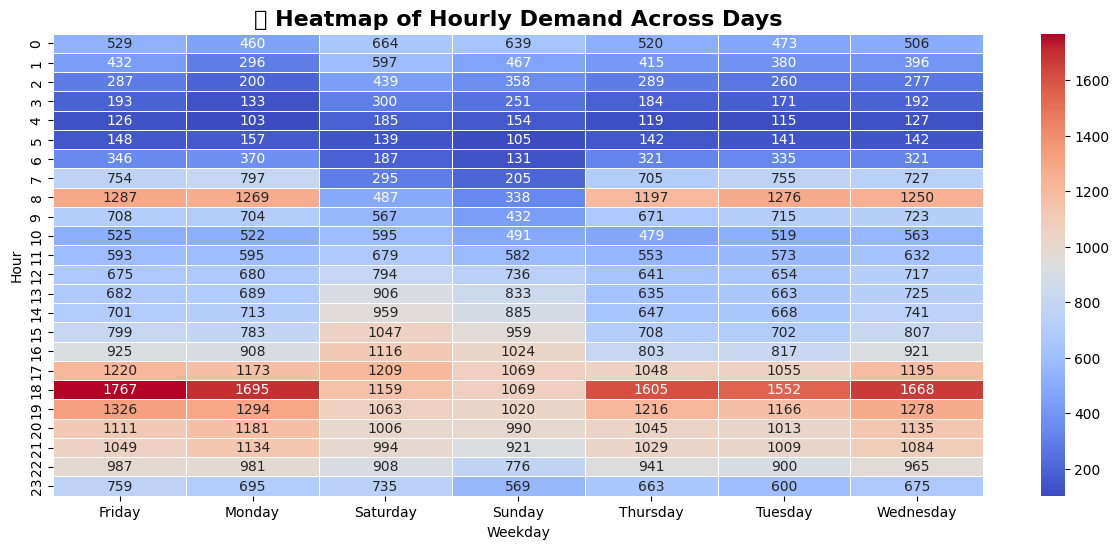

In [212]:
pivot_df = df.pivot_table(index='Hour', columns='Weekday', values='Rented Bike Count', aggfunc='mean')
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title('🔥 Heatmap of Hourly Demand Across Days', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?



*   A heatmap is ideal for visualizing hourly demand patterns across different days.

*   It highlights peak and off-peak hours using color intensity, making it easy to interpret trends.




##### 2. What is/are the insight(s) found from the chart?



*   Peak demand occurs at 8 AM and 6-8 PM, likely due to commuting hours.

*   Weekends have lower morning demand but maintain steady rentals throughout the day.




##### 3. Will the gained insights help creating a positive business impact?


*   Bike availability can be optimized by allocating more bikes during peak hours.

*   Pricing strategies can be adjusted, such as surge pricing during high-demand periods. 🚲📊

# ***🚴‍♂️ Impact of Temperature on Bike Rentals Across Seasons ***

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


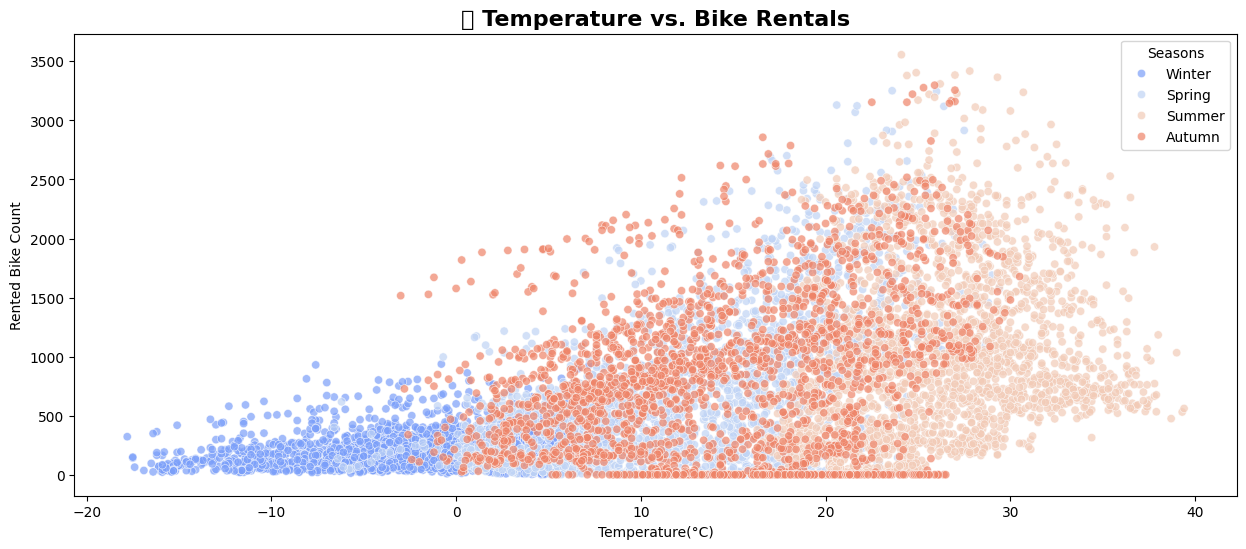

In [213]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Temperature(°C)', y='Rented Bike Count', hue='Seasons', palette='coolwarm', alpha=0.7)
plt.title('🌡️ Temperature vs. Bike Rentals', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

*  A scatter plot is ideal for showing the relationship between temperature and bike rentals while distinguishing seasonal effects using color.
*   It helps visualize trends, correlations, and seasonal variations in bike demand.




##### 2. What is/are the insight(s) found from the chart?



*   Higher temperatures lead to increased bike rentals, with peak usage occurring around 20-30°C.

*   Winter has the lowest rentals, likely due to cold weather discouraging outdoor activities.




##### 3. Will the gained insights help creating a positive business impact?
*  Companies can allocate more bikes in warmer months to meet demand.
*  Winter promotions or discounts can boost rentals during low-demand periods.

Are there any insights that lead to negative growth? Justify with specific reason.
*   Extreme cold (-10°C or lower) significantly reduces rentals, making it less profitable to maintain a large fleet.
*   Excessive heat (above 35°C) also sees a slight drop, possibly due to discomfort, requiring shaded bike docks or cooling stations. 🚲🌡



Answer Here

# **🌬️ Wind Speed Distribution and Its Variability**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


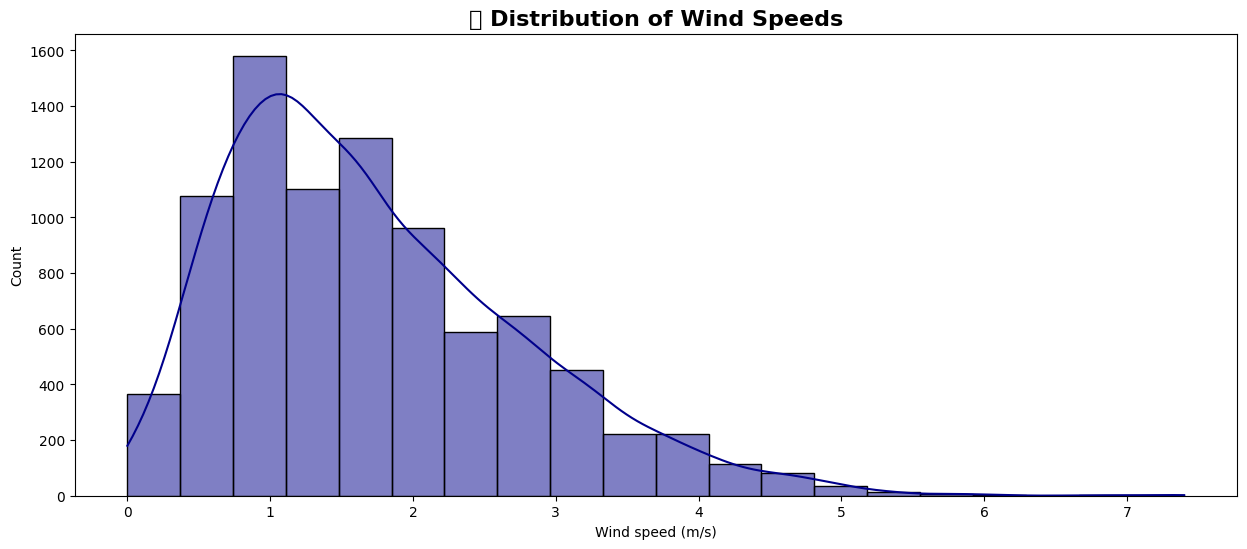

In [214]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(df['Wind speed (m/s)'], bins=20, kde=True, color='darkblue', ax=ax)
ax.set_title('🌬️ Distribution of Wind Speeds', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

*   A histogram with KDE (Kernel Density Estimation) is suitable for visualizing the distribution of wind speeds, showing how frequently different wind speeds occur.
*   It helps identify the skewness and peak frequency of wind speed values, crucial for understanding wind patterns.




##### 2. What is/are the insight(s) found from the chart?



*   The distribution is right-skewed, meaning lower wind speeds (0-2 m/s) are the most common, while higher speeds (above 4 m/s) are rare.
*   The peak wind speed frequency occurs around 1 m/s, suggesting calm wind conditions are dominant in the dataset.




##### 3. Will the gained insights help creating a positive business impact?

yes
*   Wind energy companies can optimize turbine placement in areas where wind speed is consistently high.

*   Urban planners can use this data to design wind-resistant structures or plan ventilation strategies.



Answer Here

# **"🎊 Impact of Holidays on Bike Rentals"**

<ipython-input-215-1b2ba1ca6df4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Holiday', y='Rented Bike Count', palette='pastel', ax=ax)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


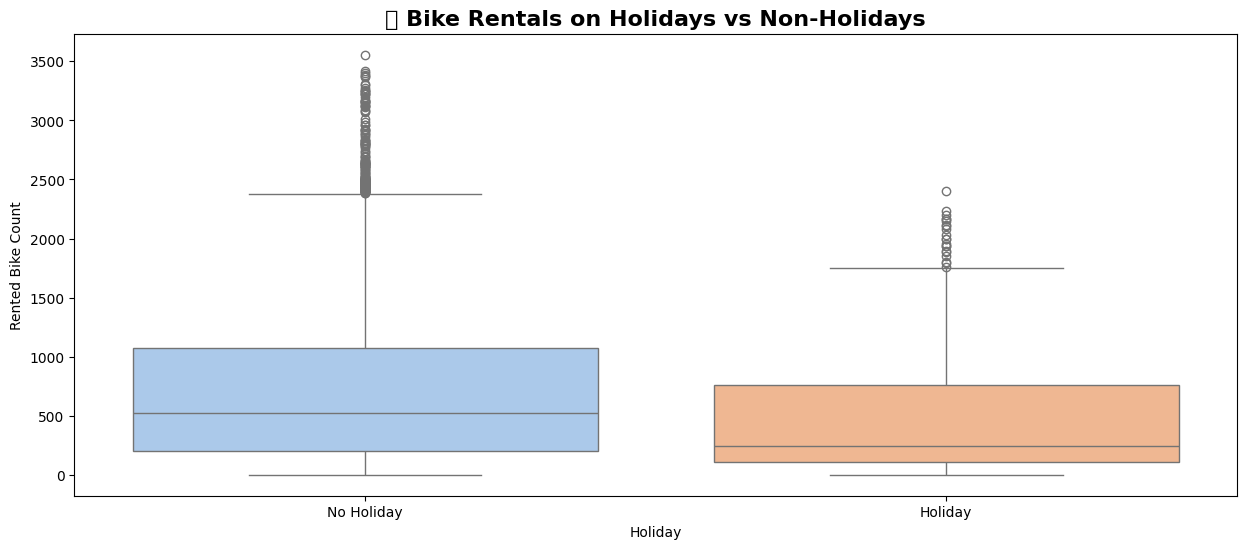

In [215]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=df, x='Holiday', y='Rented Bike Count', palette='pastel', ax=ax)
ax.set_title('🎉 Bike Rentals on Holidays vs Non-Holidays', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?



*  It effectively compares the distribution of bike rentals on holidays vs. non-holidays, showing median, spread, and outliers.

*   It highlights differences in rental patterns, making it easy to see how variability changes across the two categories.




##### 2. What is/are the insight(s) found from the chart?



*   Bike rentals are generally lower on holidays than on non-holidays, as seen in the lower median and interquartile range.

*   There are more outliers on non-holidays, indicating occasional spikes in demand, possibly during rush hours or special events.



##### 3. Will the gained insights help creating a positive business impact?

*   Targeted promotions on holidays – Since bike rentals are lower on holidays, offering discounts or incentives can increase usage.

*   Optimized fleet management – More bikes can be allocated for non-holiday weekdays, where demand is higher, reducing underutilization.




# **"🚴‍♂️ Impact of Rainfall & Snowfall on Bike Rentals"**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


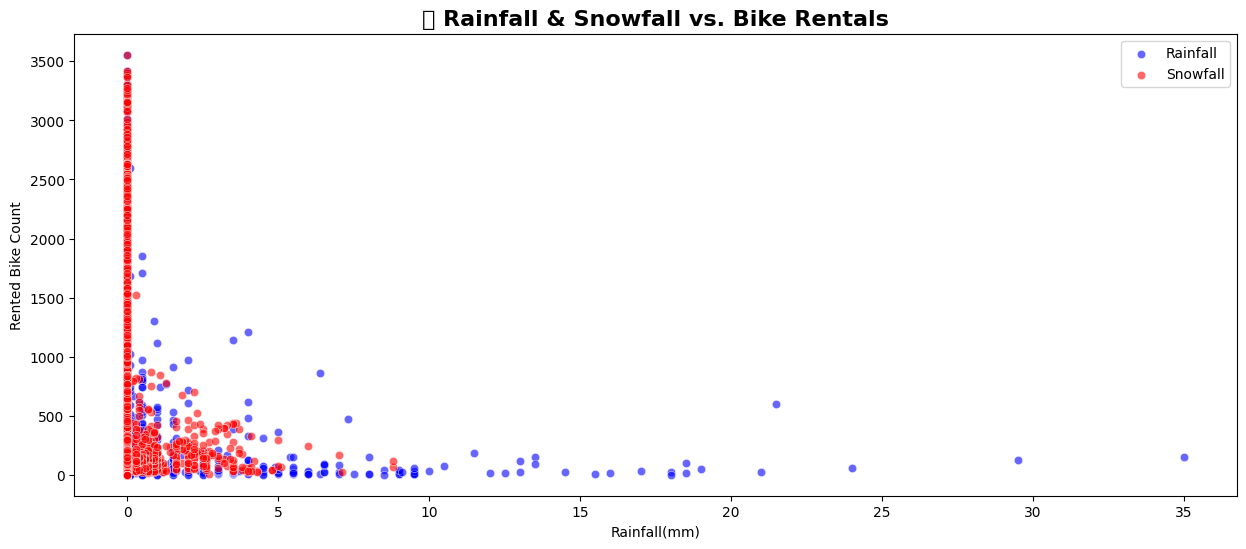

In [216]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=df, x='Rainfall(mm)', y='Rented Bike Count', color='blue', alpha=0.6, label='Rainfall')
sns.scatterplot(data=df, x='Snowfall (cm)', y='Rented Bike Count', color='red', alpha=0.6, label='Snowfall')
ax.set_title('🌧️ Rainfall & Snowfall vs. Bike Rentals', fontsize=16, fontweight='bold')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?


*  It visualizes the relationship between rainfall, snowfall, and bike rentals, making it easier to spot trends and outliers.

*  It helps in understanding how weather conditions impact rental demand, showing whether high rainfall or snowfall correlates with lower rentals.




##### 2. What is/are the insight(s) found from the chart?


*  Bike rentals decrease as rainfall and snowfall increase, indicating bad weather significantly reduces demand.

*   Most rentals occur when rainfall and snowfall are low or near zero, suggesting users prefer cycling in dry conditions.



##### 3. Will the gained insights help creating a positive business impact?


*   Weather-based pricing & promotions – Discounts can be offered during mild rain/snow to retain demand and avoid drastic drops in rentals.

*   Fleet optimization – Fewer bikes can be deployed on high-rain/snow days, reducing maintenance and operational costs.




# **"⏳ Hourly Bike Rental Trends Across Different Categories"**

<Figure size 1500x600 with 0 Axes>

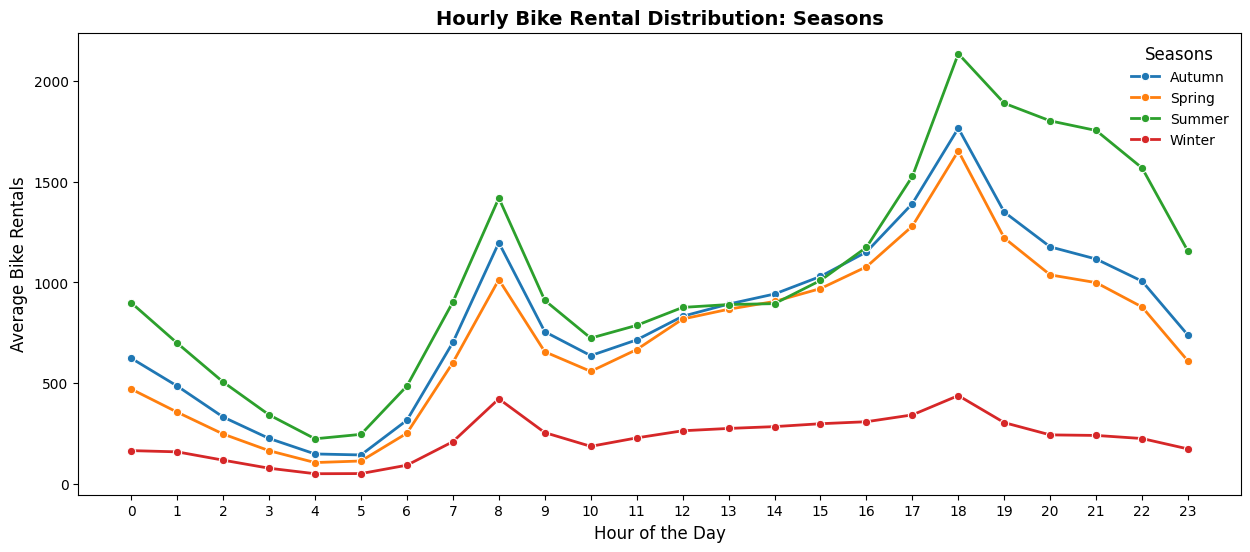

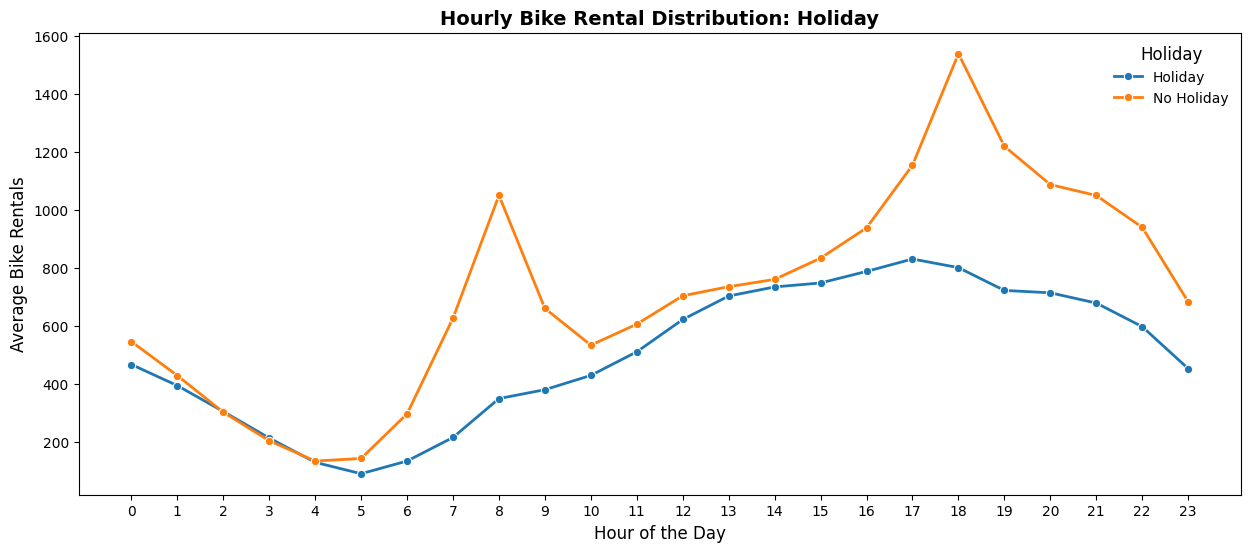

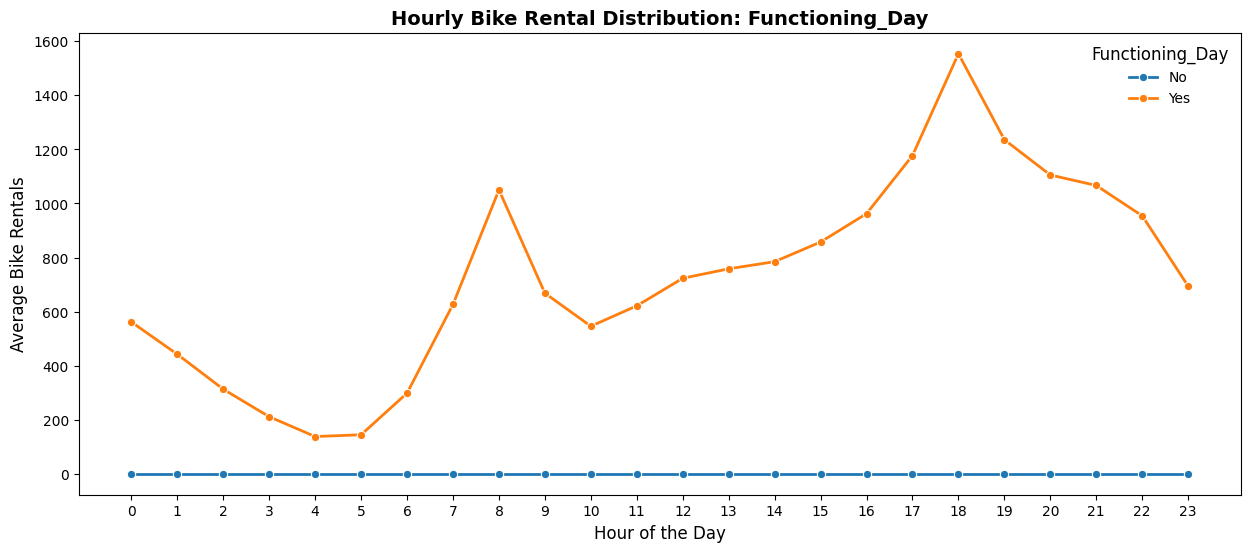

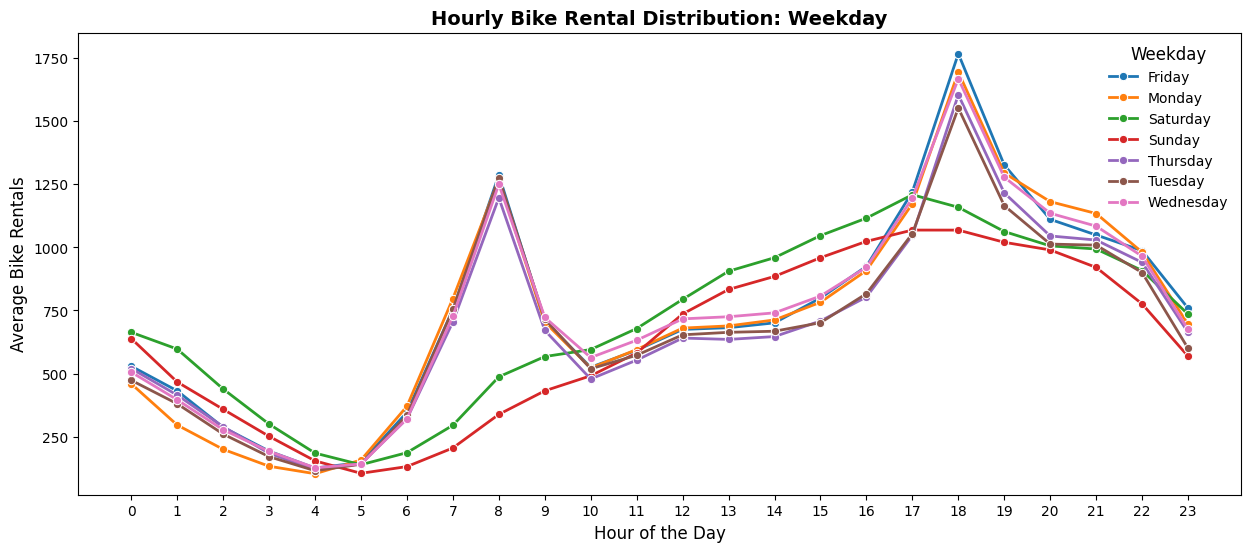

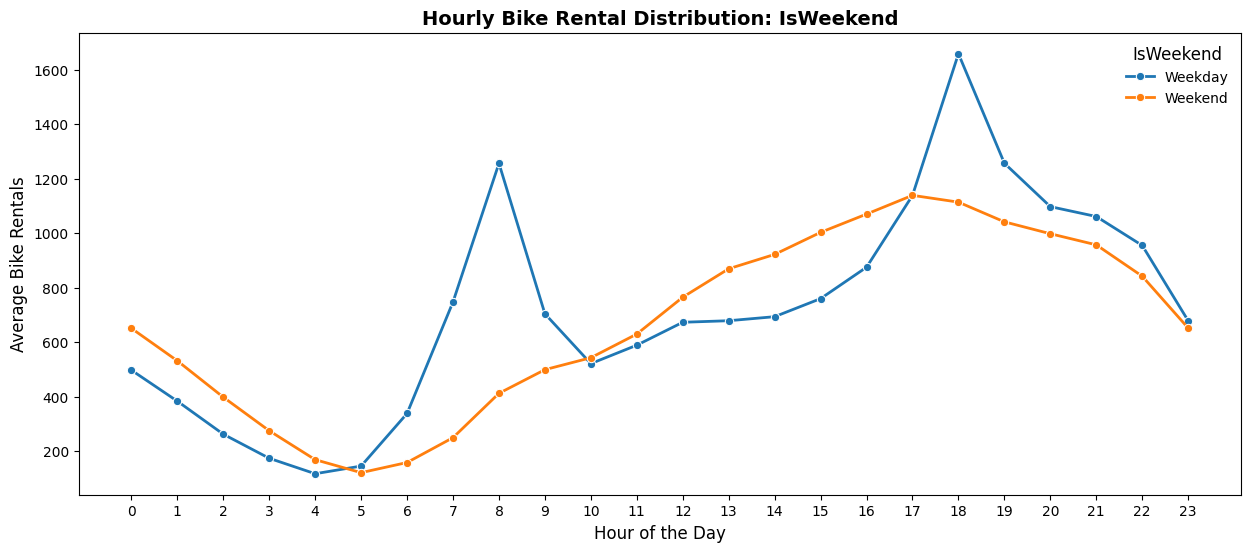

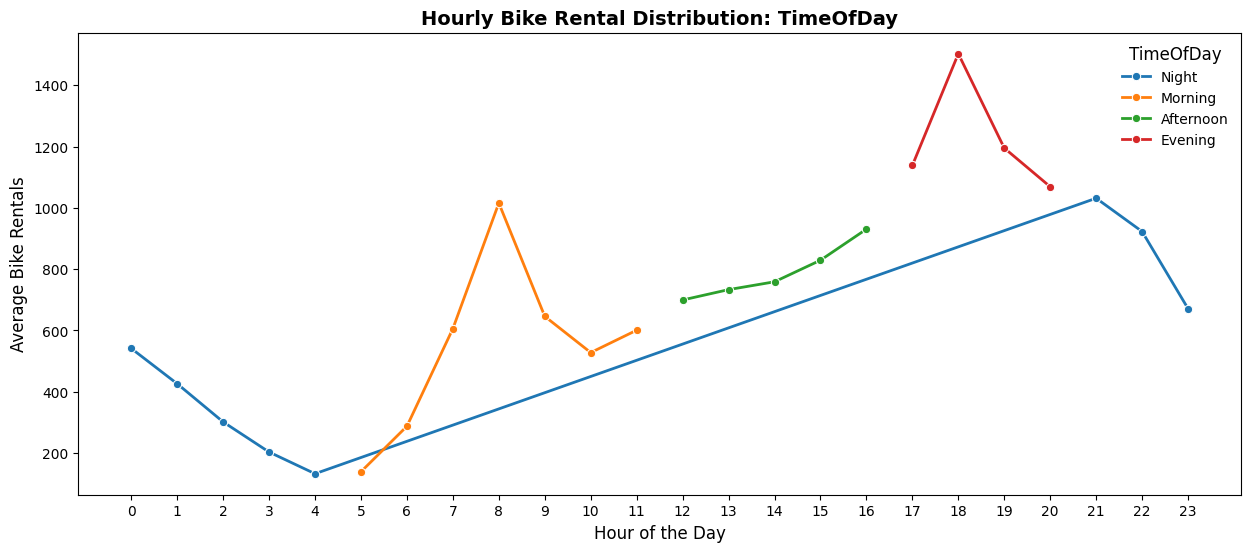

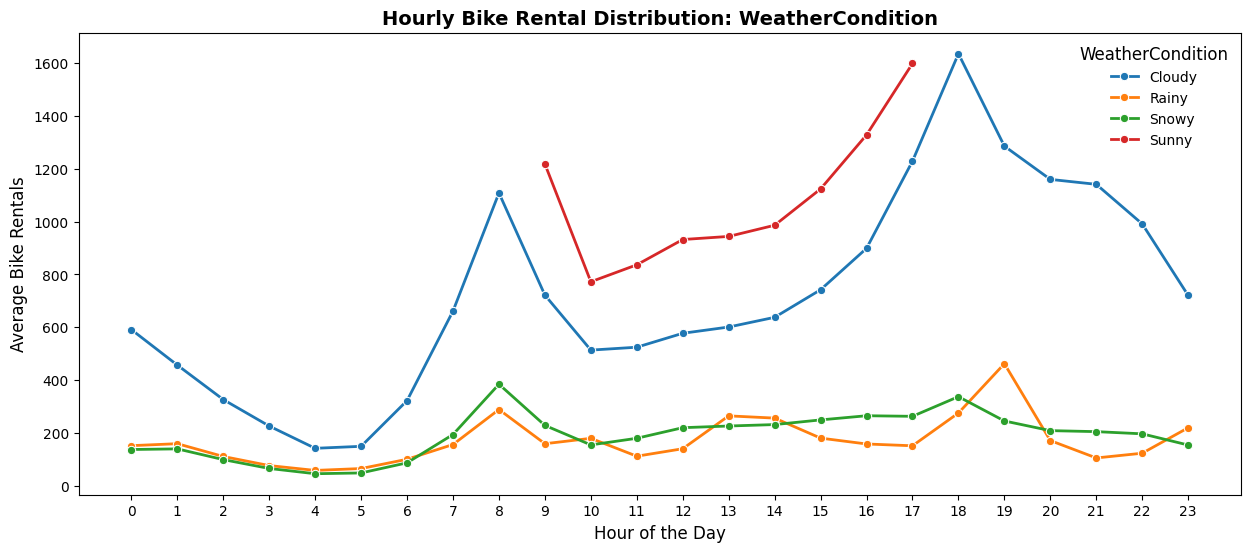

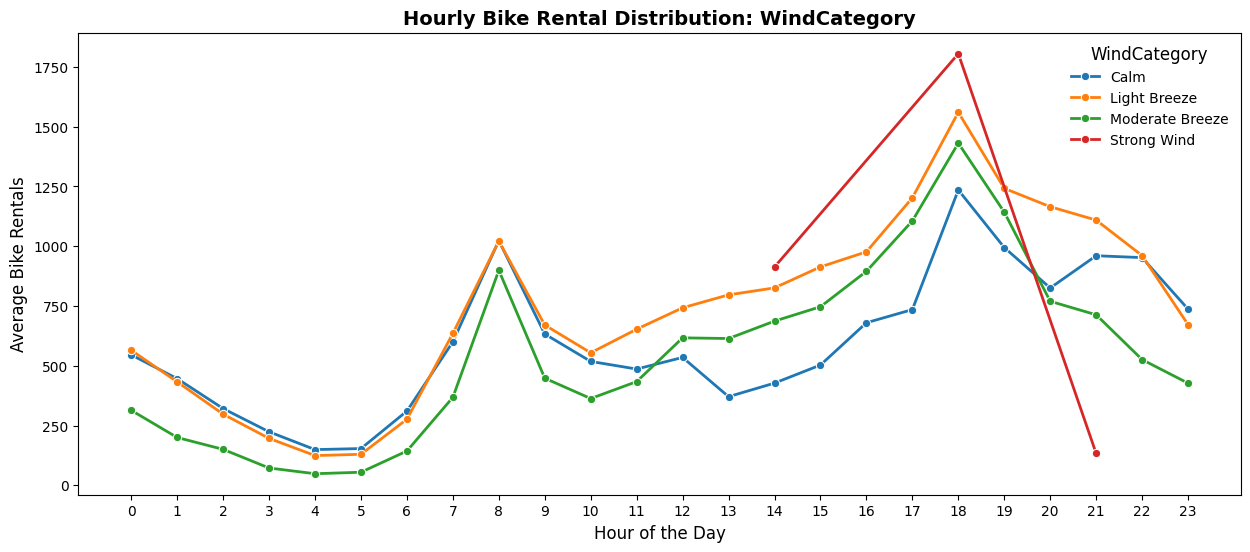

In [217]:

# categorical columns to analyze
categorical_columns = ['Seasons', 'Holiday', 'Functioning_Day', 'Weekday',
                       'IsWeekend', 'TimeOfDay', 'WeatherCondition', 'WindCategory']
plt.figure(figsize=(15,6))

# Looping through each categorical column
for category in categorical_columns:
    # Group by Hour and categorical column to calculate average rentals
    hourly_rentals = bike_df.groupby(['Hour', category])['Rented_Bike_Count'].mean().reset_index()
    # Creating a line plot
    plt.figure(figsize=(15,6))
    sns.lineplot(
        data=hourly_rentals,
        x='Hour',
        y='Rented_Bike_Count',
        hue=category,
        marker='o',
        linewidth=2
    )
    plt.title(f"Hourly Bike Rental Distribution: {category}", fontsize=14, fontweight="bold")
    plt.xlabel("Hour of the Day", fontsize=12)
    plt.ylabel("Average Bike Rentals", fontsize=12)

    plt.xticks(range(0, 24), fontsize=10)  # Displaying all hours
    plt.yticks(fontsize=10)
    plt.legend(title=category, fontsize=10, title_fontsize=12, loc="upper right", frameon=False)
    plt.grid(False)
    plt.show()


# **"🚴‍♂️ Bike Rentals: Weekdays vs. Weekends"**

<ipython-input-218-fe2537135103>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='IsWeekend', y='Rented Bike Count', palette='Set2', ax=ax)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


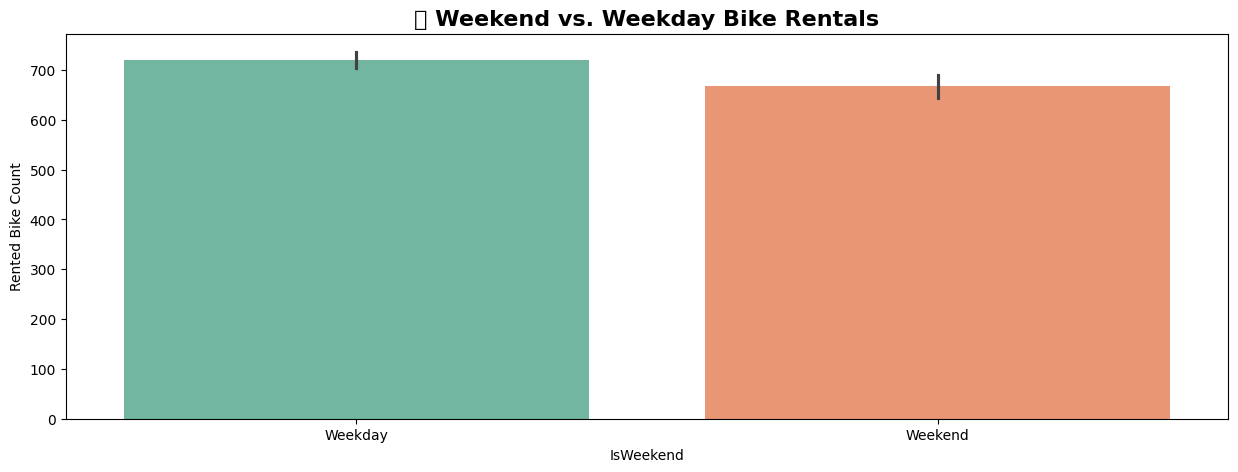

In [218]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=df, x='IsWeekend', y='Rented Bike Count', palette='Set2', ax=ax)
ax.set_title('📅 Weekend vs. Weekday Bike Rentals', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?


*   It compares bike rental counts between weekdays and weekends clearly, making it easy to identify differences.

*  It provides a simple yet effective visualization of rental trends, helping in business decision-making.



##### 2. What is/are the insight(s) found from the chart?



*   Bike rentals are slightly higher on weekdays than on weekends. This suggests that bikes are used more for commuting rather than leisure.

*   The difference is not very large, meaning demand is relatively stable throughout the week.




##### 3. Will the gained insights help creating a positive business impact?


*   Targeted promotions – Since weekdays see higher rentals, businesses can offer discounts or special offers on weekends to balance demand.

*  Optimized bike availability – More bikes can be deployed during weekday rush hours, reducing shortages and increasing revenue.





# **"🌤️ Impact of Weather Conditions on Bike Rentals"**

<ipython-input-219-763a81dd8d55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WeatherCondition', y='Rented Bike Count', palette='rocket')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


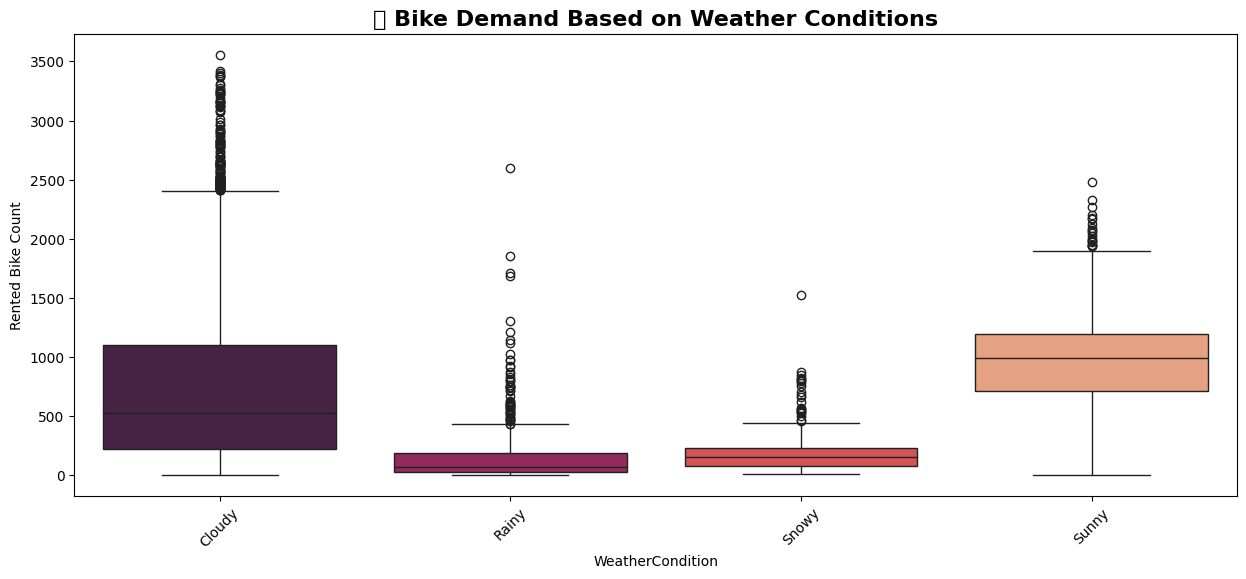

In [219]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='WeatherCondition', y='Rented Bike Count', palette='rocket')
plt.title('🌦️ Bike Demand Based on Weather Conditions', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?



*   It effectively displays the distribution of bike rentals across different weather conditions, showing median, quartiles, and outliers.

*  It helps identify how extreme weather (rainy/snowy) impacts rental demand compared to favorable weather (sunny/cloudy).




##### 2. What is/are the insight(s) found from the chart?


*   Bike rentals are highest on sunny days, indicating that good weather encourages more usage.

*  Rainy and snowy days show significantly lower rentals, suggesting that bad weather discourages biking.


*  Cloudy days still have decent rental counts, meaning slightly unfavorable weather doesn’t drastically affect demand.





# **"👀 Distribution of Visibility Levels and Their Impact on Bike Rentals"**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


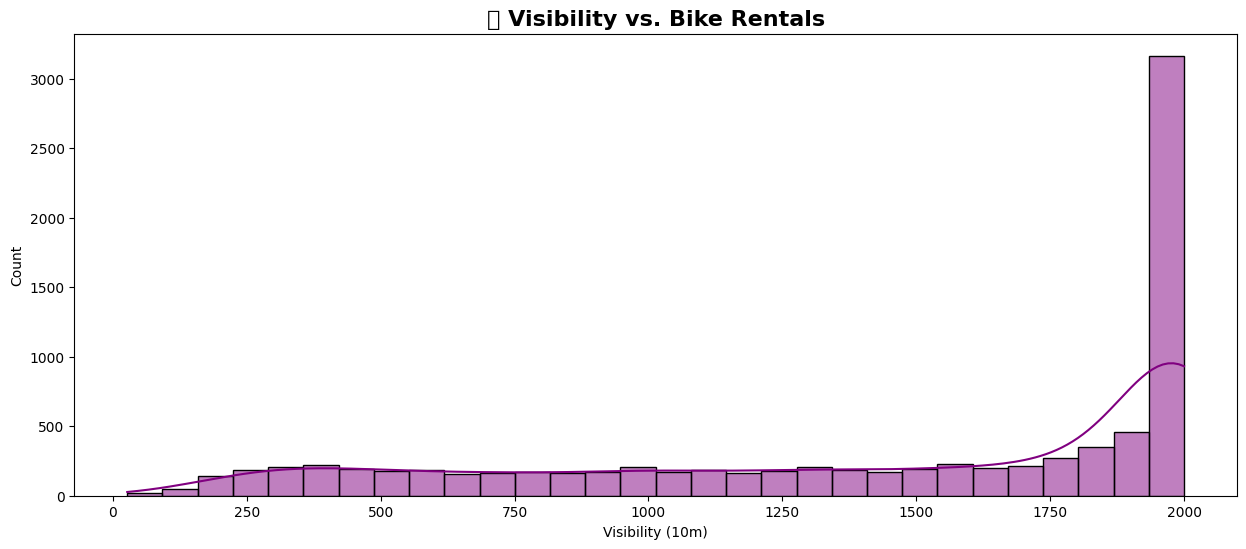

In [220]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(df['Visibility (10m)'], bins=30, kde=True, color='purple', ax=ax)
ax.set_title('👀 Visibility vs. Bike Rentals', fontsize=16, fontweight='bold')
plt.show()



##### 1. Why did you pick the specific chart?



*   ✅ Shows Distribution of Visibility vs. Bike Rentals – The histogram helps visualize how different visibility levels impact bike rental demand.

*   ✅ Identifies Patterns in Visibility & Demand – This chart makes it clear whether poor visibility (fog, mist) reduces bike rentals or not.





##### 2. What is/are the insight(s) found from the chart?



*   ✅ High Visibility = More Rentals – A sharp peak at 2000 meters visibility suggests that most bike rentals occur when visibility is clear.

*   ✅ Low Visibility = Fewer Rentals – When visibility is poor (below 500m), rentals are significantly lower, indicating people avoid biking in foggy/misty conditions.




##### 3. Will the gained insights help creating a positive business impact?



*   Target Clear Days for Promotions – Since rentals increase on high-visibility days, offering loyalty rewards or discounts on such days can boost revenue.

*   Optimize Bike Availability – Ensuring more bikes are available on clear days can prevent shortages during peak demand.



Answer Here

# **"🌦️ Correlation Between Weather Factors and Bike Rentals**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


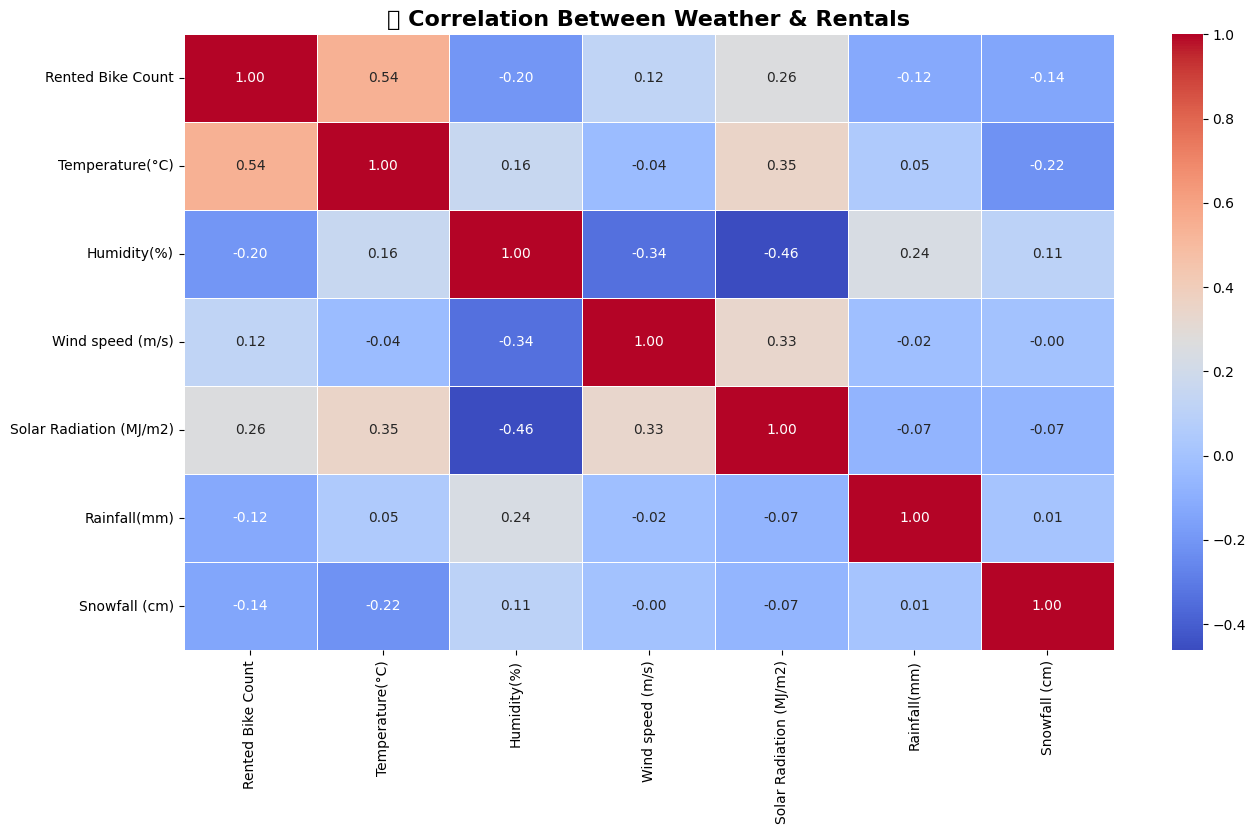

In [221]:
plt.figure(figsize=(15, 8))
sns.heatmap(df[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
                'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']].corr(),
            cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('📊 Correlation Between Weather & Rentals', fontsize=16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?



*   Clear Visualization of Relationships: A correlation heatmap effectively displays the relationship between different weather conditions and bike rentals, making it easy to spot positive and negative correlations.
*   Quick Identification of Key Factors: The chart helps identify which weather variables have the most significant impact on bike rentals, allowing businesses to focus on the most influential factors.



##### 2. What is/are the insight(s) found from the chart?


*  Temperature Positively Correlates with Bike Rentals: The correlation between temperature and bike rentals is 0.54, indicating that warmer temperatures encourage more rentals.

*  Humidity and Snowfall Negatively Affect Rentals: Higher humidity (-0.20) and snowfall (-0.14) are associated with fewer rentals, which suggests unfavorable weather conditions deter customers.




##### 3. Will the gained insights help creating a positive business impact?


*   Optimized Marketing Strategies: Businesses can use temperature forecasts to launch targeted promotions or discounts on warmer days to boost rentals.
*   Resource Allocation: Knowing that snowfall and high humidity reduce rentals, companies can adjust inventory and workforce accordingly to optimize costs.


# **"⏰ Hourly Variation in Bike Rentals"**

<ipython-input-222-3e6ce18bdb16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Hour', y='Rented Bike Count', palette='magma')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


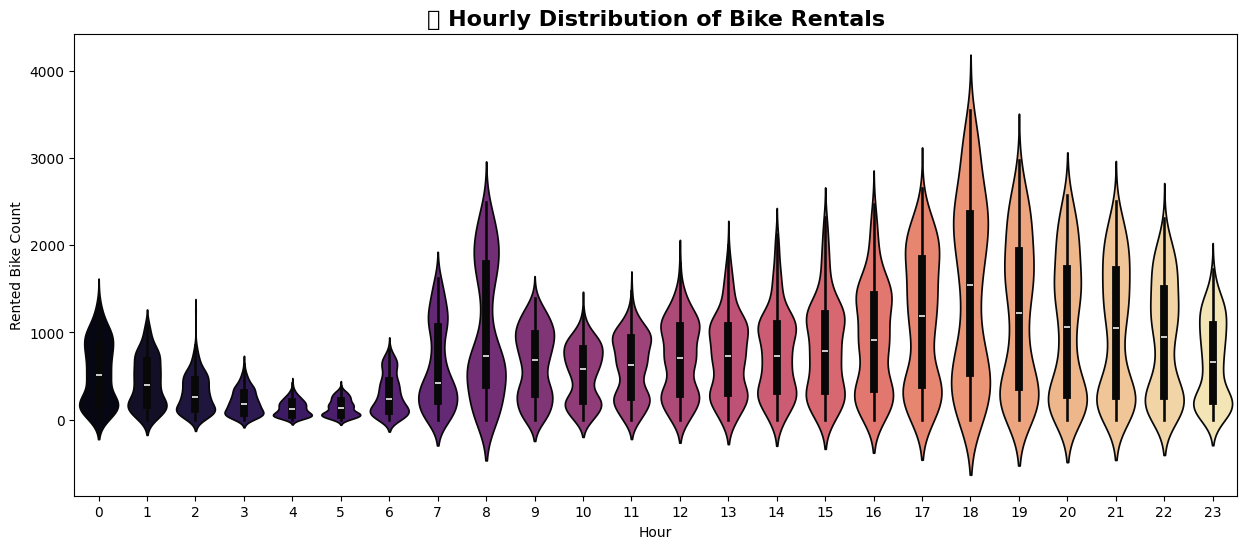

In [222]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='Hour', y='Rented Bike Count', palette='magma')
plt.title('⏰ Hourly Distribution of Bike Rentals', fontsize=16, fontweight='bold')
plt.show()


# **📅 Daily Trend of Bike Rentals Over the Year**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


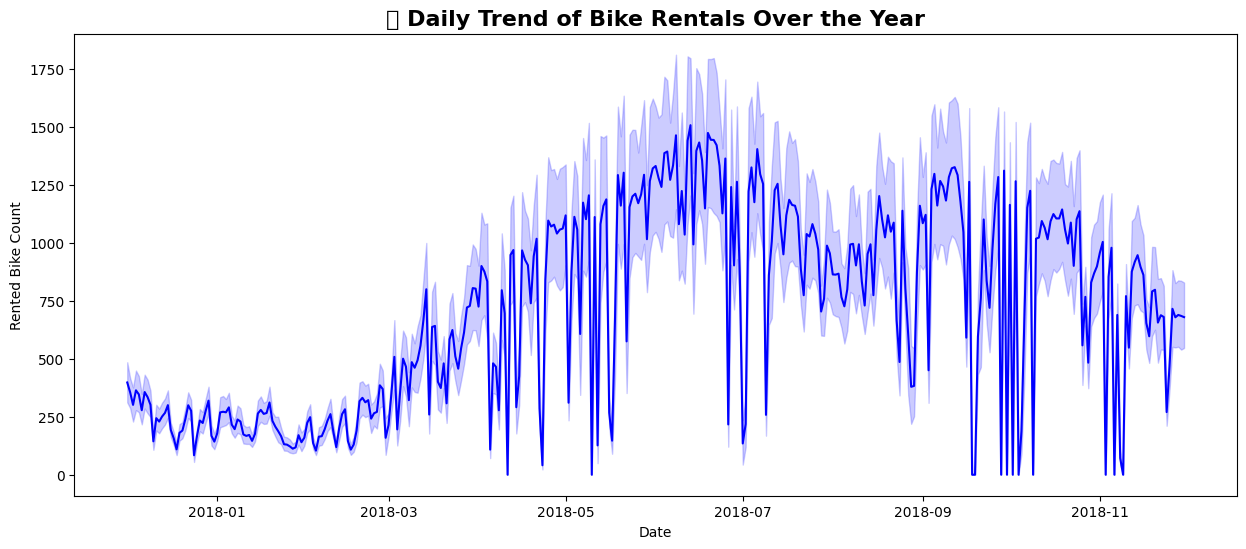

In [223]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Date', y='Rented Bike Count', color='blue', linewidth=1.5)
plt.title('📅 Daily Trend of Bike Rentals Over the Year', fontsize=16, fontweight='bold')
plt.show()

# **"📆 Seasonal Patterns in Monthly Bike Rentals"**

<ipython-input-224-c255b6aa3497>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Rented Bike Count', palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


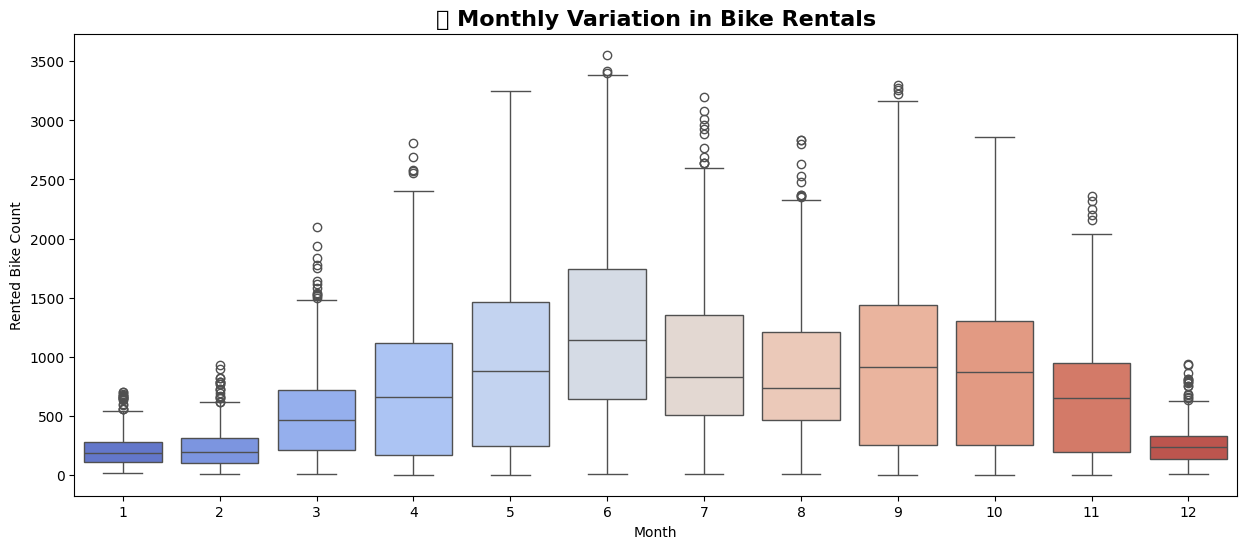

In [224]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=df, x='Month', y='Rented Bike Count', palette='coolwarm')
ax.set_title('📆 Monthly Variation in Bike Rentals', fontsize=16, fontweight='bold')
plt.show()

# **"💨 Impact of Humidity on Bike Rentals"**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


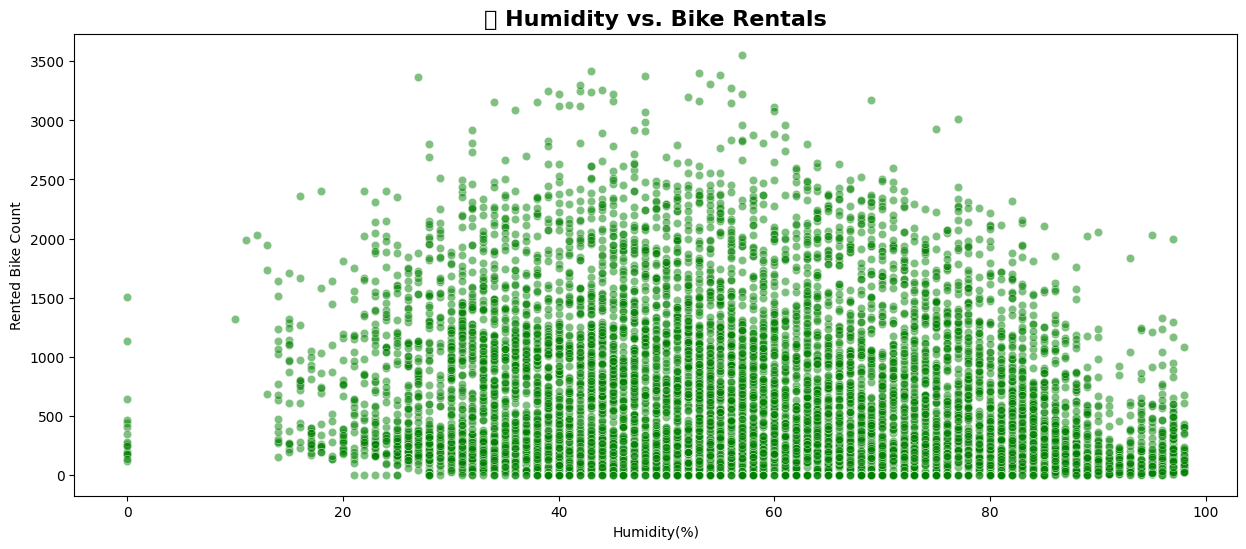

In [225]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Humidity(%)', y='Rented Bike Count', alpha=0.5, color='green')
plt.title('💨 Humidity vs. Bike Rentals', fontsize=16, fontweight='bold')
plt.show()


# **"🚴‍♂️ Bike Rentals: Functioning vs. Non-Functioning Days"**

<ipython-input-226-5bcd5ed5ca96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Functioning Day', y='Rented Bike Count', palette='Set1', ax=ax)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


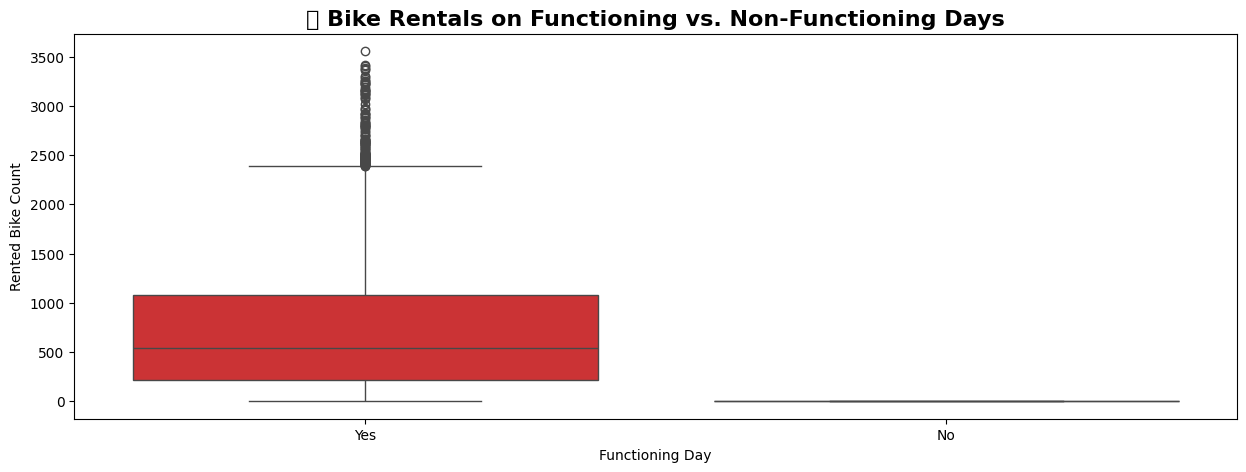

In [226]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x='Functioning Day', y='Rented Bike Count', palette='Set1', ax=ax)
ax.set_title('🚲 Bike Rentals on Functioning vs. Non-Functioning Days', fontsize=16, fontweight='bold')
plt.show()

# **"📊 Bike Rentals by Demand Category"**

<ipython-input-227-311f82a0932b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BikeDemandCategory', y='Rented Bike Count', palette='cubehelix', ax=ax)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


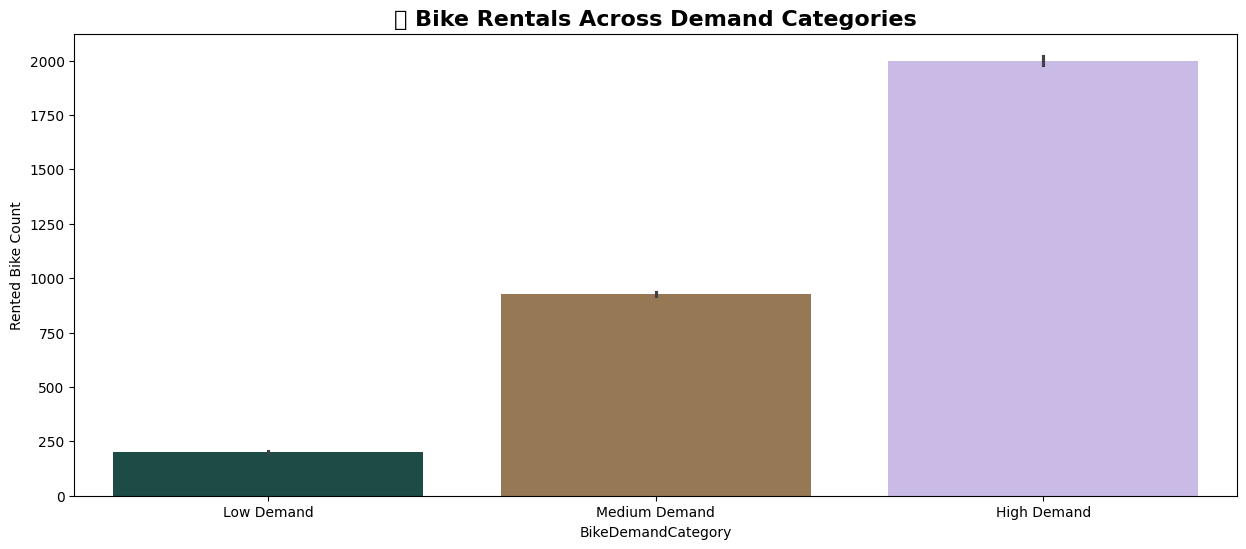

In [227]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=df, x='BikeDemandCategory', y='Rented Bike Count', palette='cubehelix', ax=ax)
ax.set_title('🚲 Bike Rentals Across Demand Categories', fontsize=16, fontweight='bold')
plt.show()


# **"🌡️ Density Plot: Temperature vs. Bike Rentals"**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


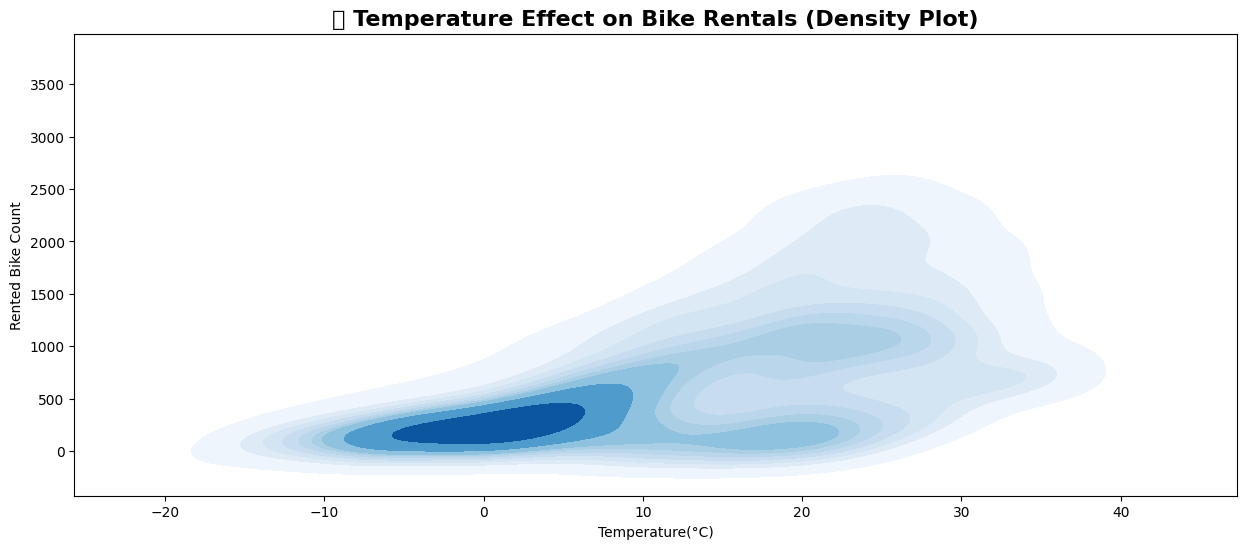

In [228]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data=df, x='Temperature(°C)', y='Rented Bike Count', cmap='Blues', fill=True)
plt.title('🌡️ Temperature Effect on Bike Rentals (Density Plot)', fontsize=16, fontweight='bold')
plt.show()


# **"🚴‍♂️ Average Bike Rentals Across Different Time Categories"**

<ipython-input-78-171f8805ccf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TimeCategory', y='Rented Bike Count', palette='coolwarm', estimator=np.mean)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128692 (\N{BICYCLIST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


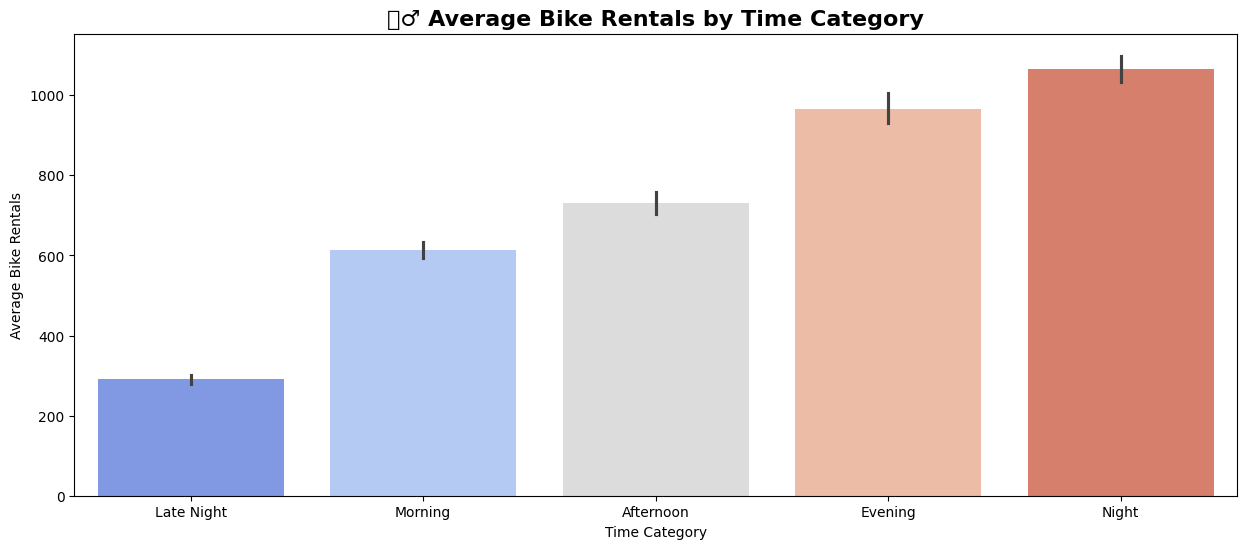

In [78]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='TimeCategory', y='Rented Bike Count', palette='coolwarm', estimator=np.mean)
plt.title('🚴‍♂️ Average Bike Rentals by Time Category', fontsize=16, fontweight='bold')
plt.xlabel('Time Category')
plt.ylabel('Average Bike Rentals')
plt.show()


# **"📊 Bike Rental Distribution Across Different Time Categories"**

<ipython-input-229-afd6cc0756c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TimeCategory', y='Rented Bike Count', palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


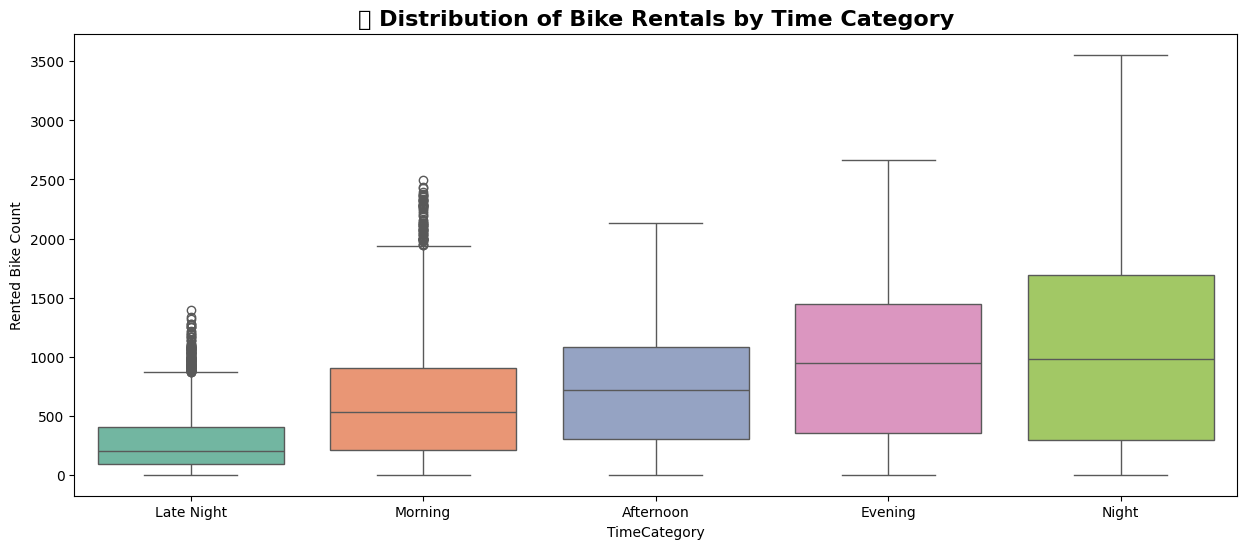

In [229]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='TimeCategory', y='Rented Bike Count', palette='Set2')
plt.title('📊 Distribution of Bike Rentals by Time Category', fontsize=16, fontweight='bold')
plt.show()


# **"📆 Monthly Bike Rental Trends by Time Category"**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


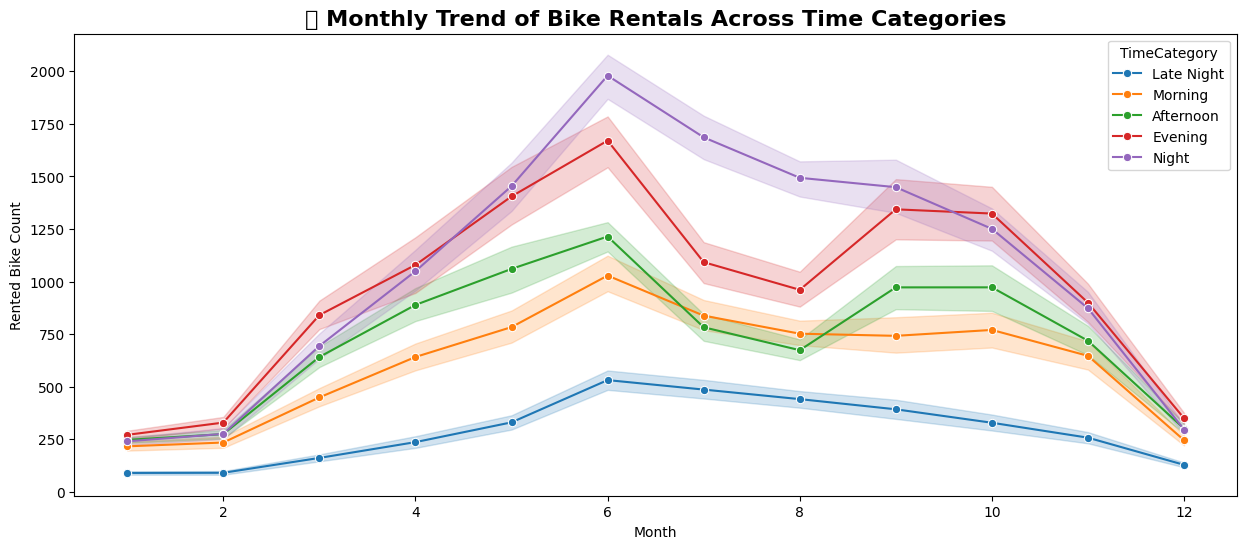

In [231]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Month', y='Rented Bike Count', hue='TimeCategory', marker='o', palette='tab10')
plt.title('📆 Monthly Trend of Bike Rentals Across Time Categories', fontsize=16, fontweight='bold')
plt.show()


# **"📅 Bike Rentals by Time Category: Weekend vs. Weekday Comparison"**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


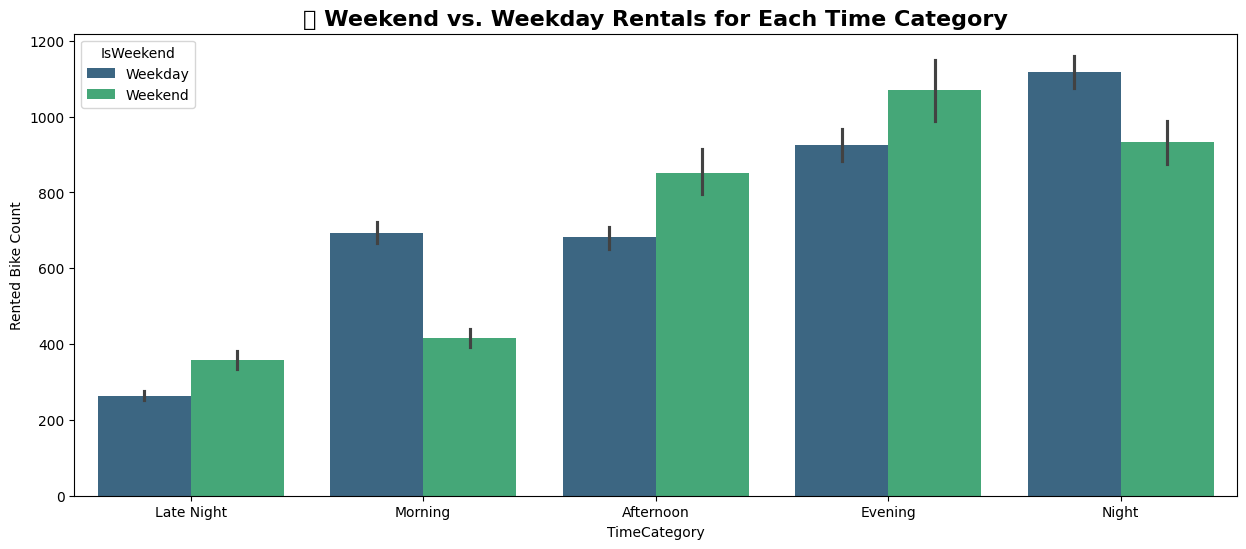

In [232]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='TimeCategory', y='Rented Bike Count', hue='IsWeekend', palette='viridis')
plt.title('📅 Weekend vs. Weekday Rentals for Each Time Category', fontsize=16, fontweight='bold')
plt.show()


# **"🌦️ Seasonal Variation in Bike Rentals Across Time Categories"**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


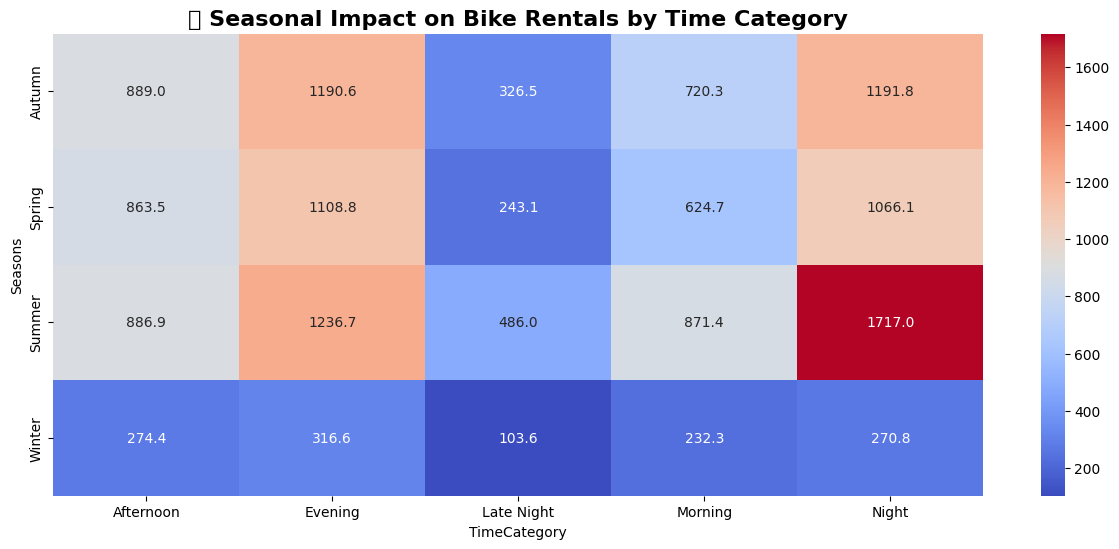

In [233]:
plt.figure(figsize=(15, 6))
pivot_table = df.pivot_table(index='Seasons', columns='TimeCategory', values='Rented Bike Count', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('🔥 Seasonal Impact on Bike Rentals by Time Category', fontsize=16, fontweight='bold')
plt.show()


# **"💨 Influence of Wind Speed Categories on Bike Rentals"**

<ipython-input-234-7ff8064448b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WindCategory', y='Rented Bike Count', data=df, estimator=np.mean, palette='coolwarm')


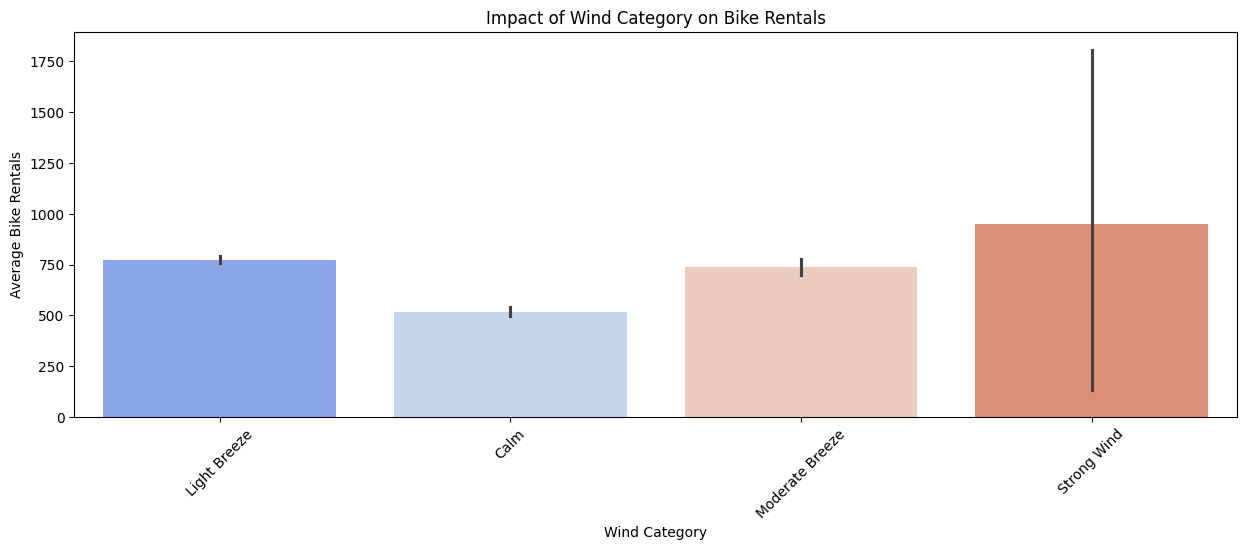

In [234]:


plt.figure(figsize=(15,5))
sns.barplot(x='WindCategory', y='Rented Bike Count', data=df, estimator=np.mean, palette='coolwarm')
plt.xlabel('Wind Category')
plt.ylabel('Average Bike Rentals')
plt.title('Impact of Wind Category on Bike Rentals')
plt.xticks(rotation=45)
plt.show()


# **"💨 Distribution of Bike Rentals Across Wind Speed Categories"**

<ipython-input-235-2526dfac62bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WindCategory', y='Rented Bike Count', data=df, palette='pastel')


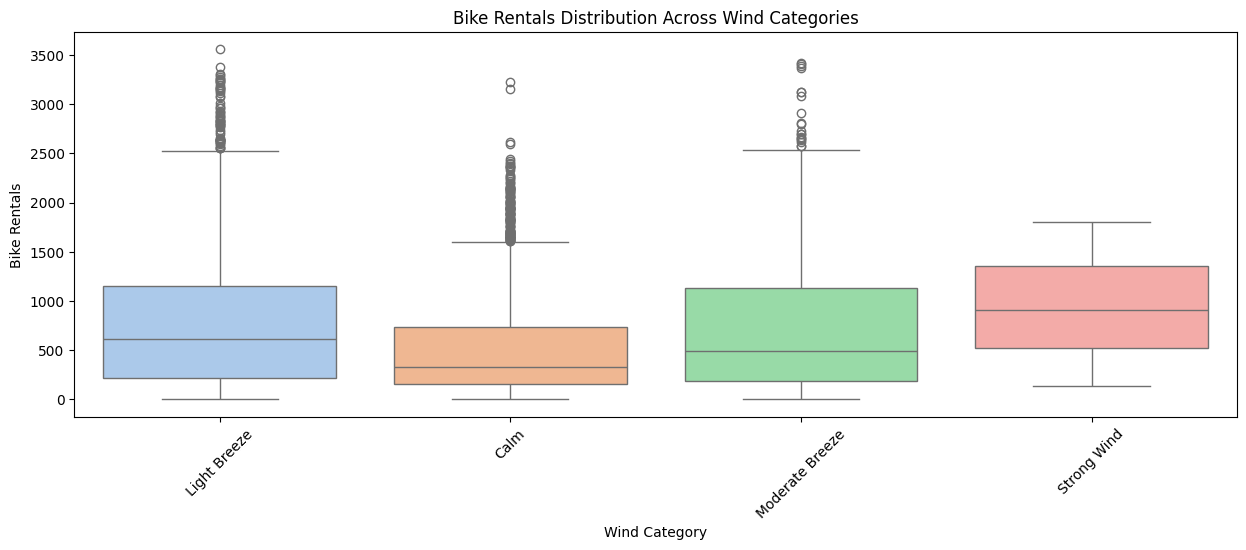

In [235]:
plt.figure(figsize=(15,5))
sns.boxplot(x='WindCategory', y='Rented Bike Count', data=df, palette='pastel')
plt.xlabel('Wind Category')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals Distribution Across Wind Categories')
plt.xticks(rotation=45)
plt.show()


# **"💨 Impact of Wind Categories on Bike Rentals"**

<ipython-input-237-6580e5b8d4c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["WindCategory"], y=df["Rented Bike Count"], palette="coolwarm")


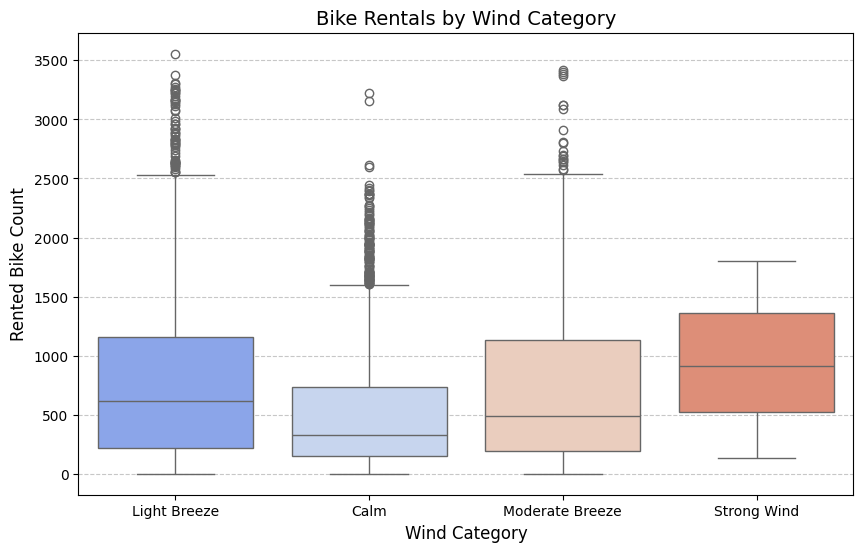

In [237]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["WindCategory"], y=df["Rented Bike Count"], palette="coolwarm")
plt.title("Bike Rentals by Wind Category", fontsize=14)
plt.xlabel("Wind Category", fontsize=12)
plt.ylabel("Rented Bike Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# **"🚲 Bike Demand Distribution Across Wind Categories"**

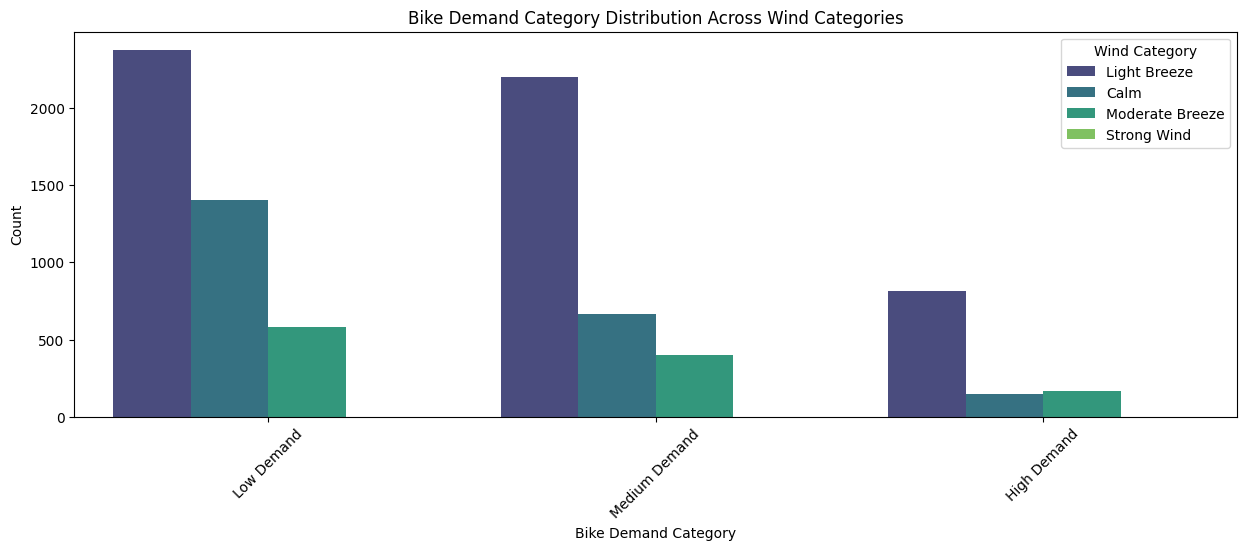

In [238]:
plt.figure(figsize=(15,5))
sns.countplot(x='BikeDemandCategory', hue='WindCategory', data=bike_df, palette='viridis')
plt.xlabel('Bike Demand Category')
plt.ylabel('Count')
plt.title('Bike Demand Category Distribution Across Wind Categories')
plt.legend(title='Wind Category')
plt.xticks(rotation=45)
plt.show()


# **"📅 Bike Rentals Trend Over Time by Wind Category"**

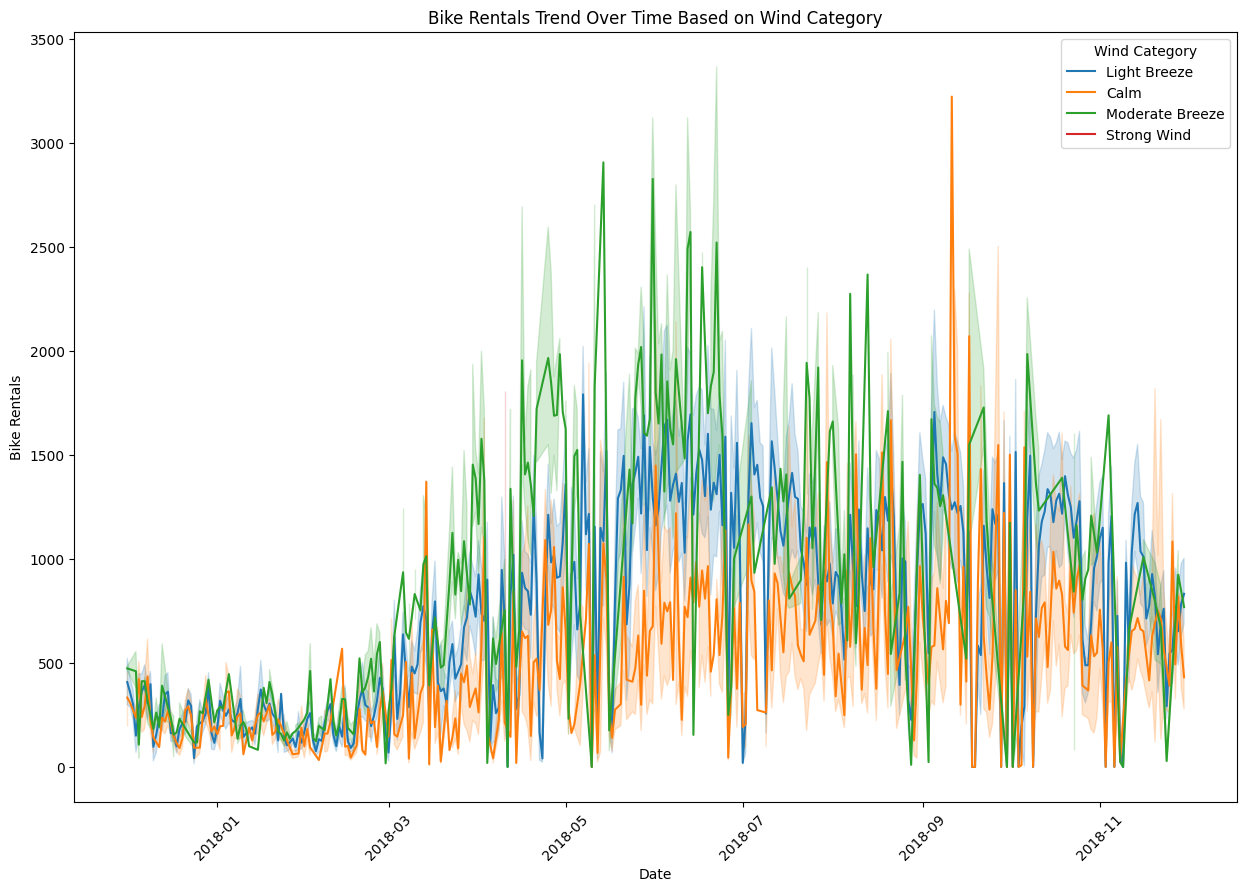

In [239]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Date', y='Rented Bike Count', hue='WindCategory', data=df, palette='tab10')
plt.xlabel('Date')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals Trend Over Time Based on Wind Category')
plt.xticks(rotation=45)
plt.legend(title='Wind Category')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

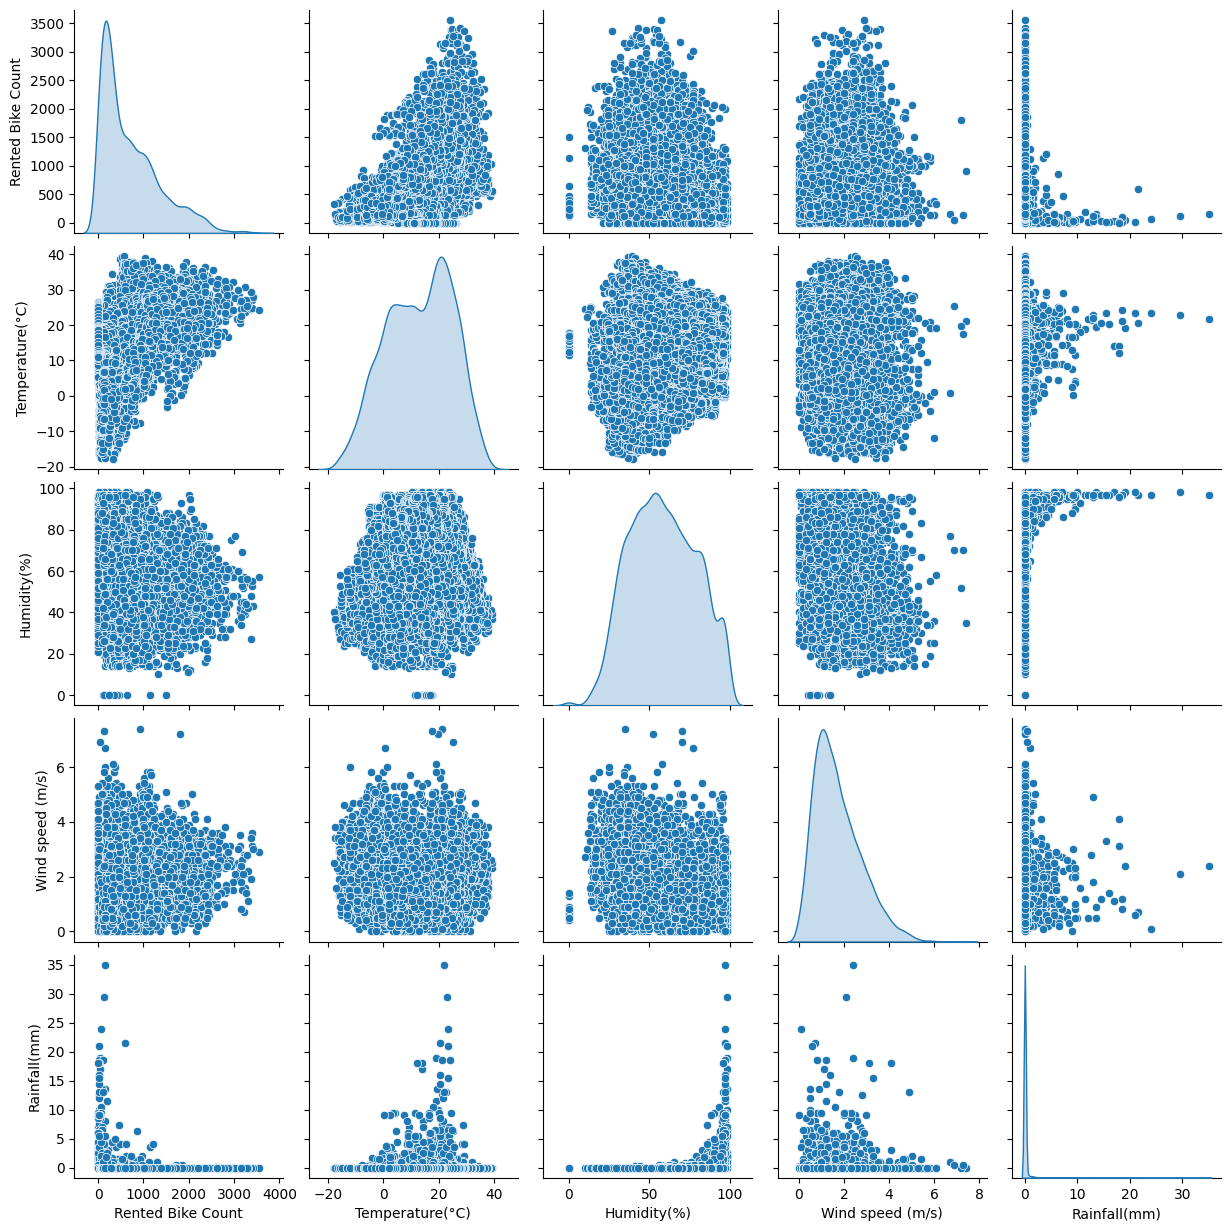

In [89]:
# Pair Plot
sns.pairplot(df[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Rainfall(mm)']], diag_kind='kde')
plt.show()


# **"Demonstrating the Central Limit Theorem: Mean Bike Rentals Distribution with Confidence Interval"**

Estimated Mean Rental Count: 700.05
95% Confidence Interval: (674.9665825459776, 725.1358174540223)


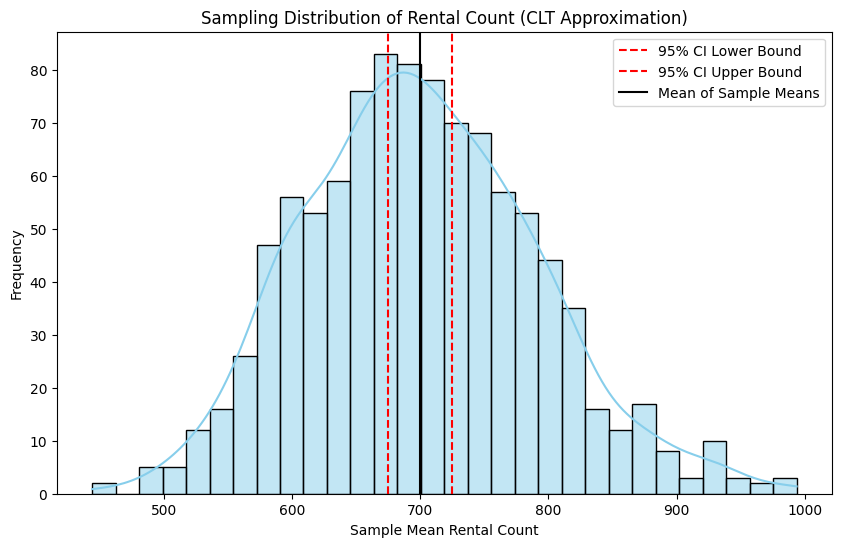

In [240]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Defining parameters
num_samples = 1000  # Number of samples to be extracted from Population
sample_size = 50    # Sample size (n >= 30 for CLT)
sample_means = []

# Performing sampling
for _ in range(num_samples):
    sample = df2['Rented Bike Count'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

# Converting the sample means to NumPy array
sample_means = np.array(sample_means)

# Calculating mean and standard deviation of sample means
mean_sample_means = np.mean(sample_means)
std_sample_means = np.std(sample_means, ddof=1)

# Computing 95% Confidence Interval
z_value = 1.96  # Z-score for 95% confidence
margin_of_error = z_value * (std_sample_means / np.sqrt(sample_size))
confidence_interval = (mean_sample_means - margin_of_error, mean_sample_means + margin_of_error)

print(f"Estimated Mean Rental Count: {mean_sample_means:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")

# visualization of distribution of sample means
plt.figure(figsize=(10,6))
sns.histplot(sample_means, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(confidence_interval[0], color='red', linestyle="dashed", label="95% CI Lower Bound")
plt.axvline(confidence_interval[1], color='red', linestyle="dashed", label="95% CI Upper Bound")
plt.axvline(mean_sample_means, color='black', linestyle="solid", label="Mean of Sample Means")

plt.title("Sampling Distribution of Rental Count (CLT Approximation)")
plt.xlabel("Sample Mean Rental Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# **Evaluating the Normality of Sampling Distributions Using the Central Limit Theorem (CLT)**


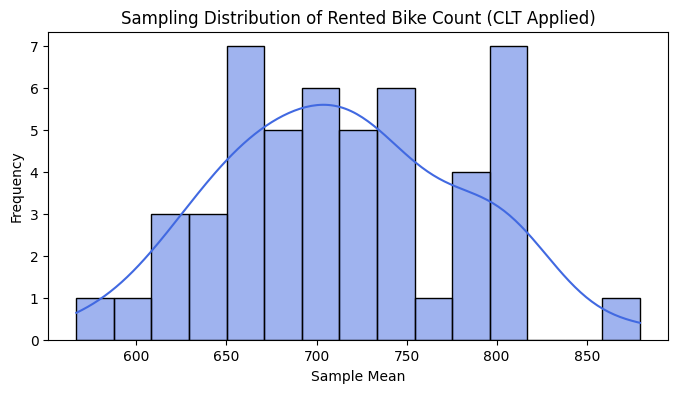

Normality Test for Rented Bike Count (Shapiro-Wilk): p-value = 0.78440
✅ Fail to Reject H₀: Sampling distribution is normal.
--------------------------------------------------


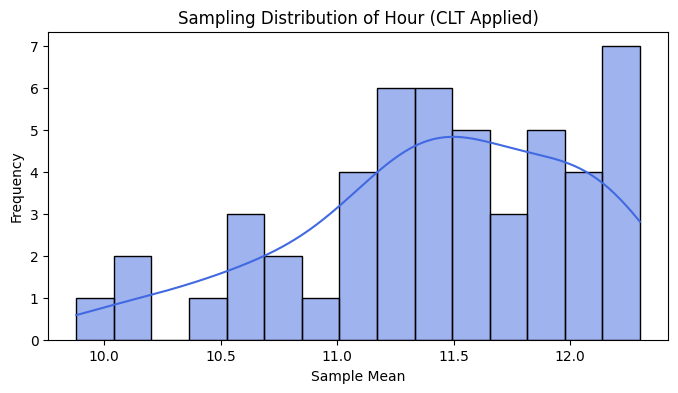

Normality Test for Hour (Shapiro-Wilk): p-value = 0.02859
❌ Reject H₀: Sampling distribution is not normal (but might still be approximately normal due to CLT).
--------------------------------------------------


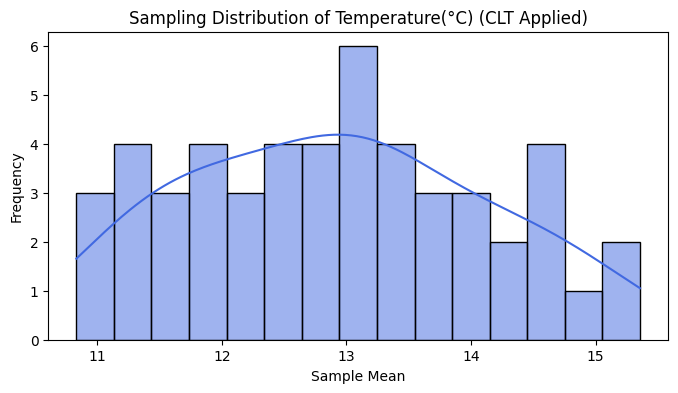

Normality Test for Temperature(°C) (Shapiro-Wilk): p-value = 0.36506
✅ Fail to Reject H₀: Sampling distribution is normal.
--------------------------------------------------


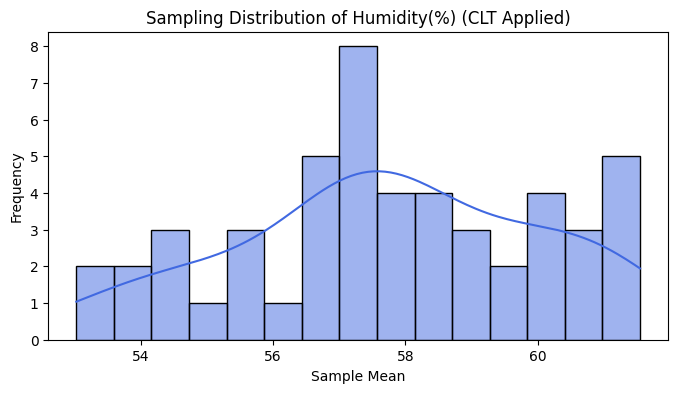

Normality Test for Humidity(%) (Shapiro-Wilk): p-value = 0.22408
✅ Fail to Reject H₀: Sampling distribution is normal.
--------------------------------------------------


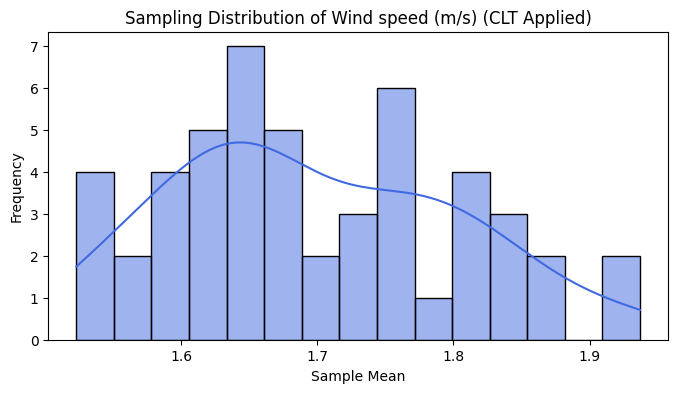

Normality Test for Wind speed (m/s) (Shapiro-Wilk): p-value = 0.20772
✅ Fail to Reject H₀: Sampling distribution is normal.
--------------------------------------------------


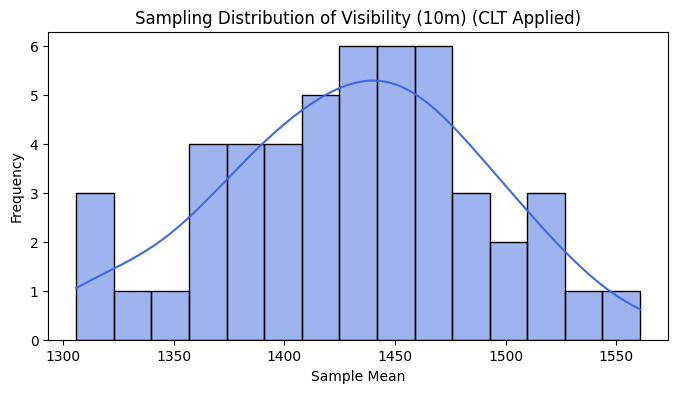

Normality Test for Visibility (10m) (Shapiro-Wilk): p-value = 0.94455
✅ Fail to Reject H₀: Sampling distribution is normal.
--------------------------------------------------


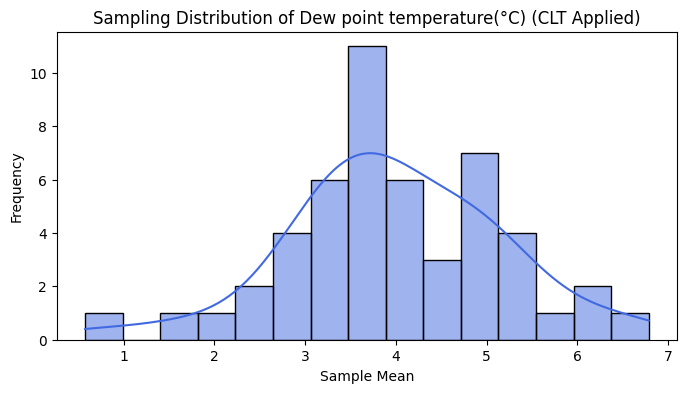

Normality Test for Dew point temperature(°C) (Shapiro-Wilk): p-value = 0.76480
✅ Fail to Reject H₀: Sampling distribution is normal.
--------------------------------------------------


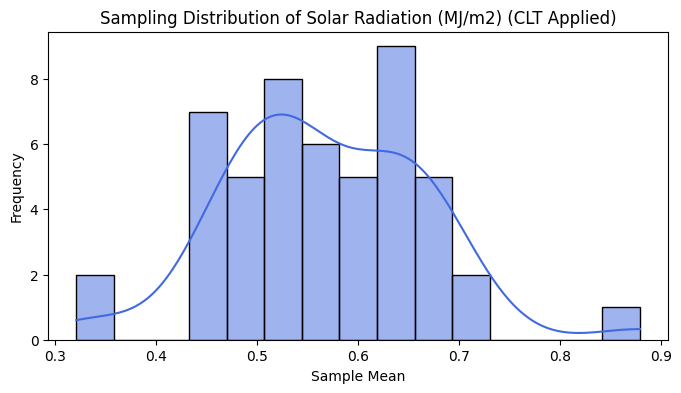

Normality Test for Solar Radiation (MJ/m2) (Shapiro-Wilk): p-value = 0.26113
✅ Fail to Reject H₀: Sampling distribution is normal.
--------------------------------------------------


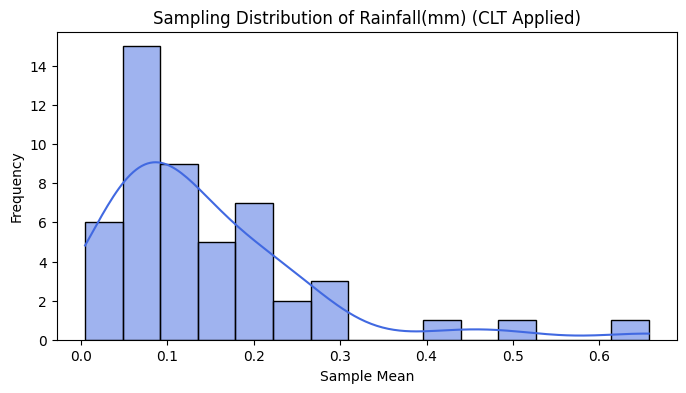

Normality Test for Rainfall(mm) (Shapiro-Wilk): p-value = 0.00000
❌ Reject H₀: Sampling distribution is not normal (but might still be approximately normal due to CLT).
--------------------------------------------------


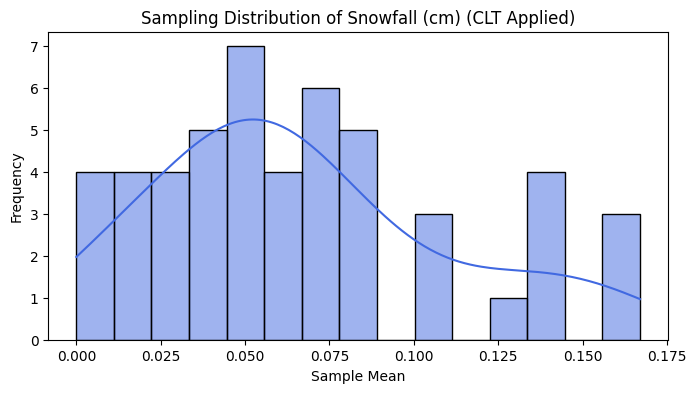

Normality Test for Snowfall (cm) (Shapiro-Wilk): p-value = 0.02000
❌ Reject H₀: Sampling distribution is not normal (but might still be approximately normal due to CLT).
--------------------------------------------------


In [241]:
#this is to check the normality of sampling Distributions
# Selecting numerical columns
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
sampling_means = {}

# Number of samples and sample size
num_samples = 50
sample_size = 100

for col in numerical_cols:
    sample_means = []

    for _ in range(num_samples):
        sample = np.random.choice(df2[col], size=sample_size, replace=False)  # Random sample of 100
        sample_means.append(np.mean(sample))  # Storing mean of sample

    sampling_means[col] = sample_means

    # Ploting the sampling distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(sample_means, kde=True, bins=15, color='royalblue')
    plt.title(f"Sampling Distribution of {col} (CLT Applied)")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.show()

    # Normality Test (Shapiro-Wilk)
    stat, p = shapiro(sample_means)
    print(f"Normality Test for {col} (Shapiro-Wilk): p-value = {p:.5f}")
    if p > 0.05:
        print("✅ Fail to Reject H₀: Sampling distribution is normal.")
    else:
        print("❌ Reject H₀: Sampling distribution is not normal (but might still be approximately normal due to CLT).")
    print("-" * 50)


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - If temperature had no effect on bike rentals, then we would expect no significant correlation between temperature and the number of rented bikes. However, if temperature does impact bike rentals, we would expect to see a significant positive correlation, where higher temperatures lead to increased rentals."

In [242]:
df2=df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
📉 Temperature has no significant impact on the number of bike rentals.
(i.e., There is no correlation between Temperature and Rented Bike Count.)

Alternative Hypothesis (H₁):
🚴‍♂️ Temperature significantly impacts the number of bike rentals.
(i.e., There is a correlation between Temperature and Rented Bike Count.)



Pearson Correlation between Temperature and Rented Bike Count: 0.5386
P-value: 0.00000000000000000000
✅ Temperature significantly impacts bike rentals!


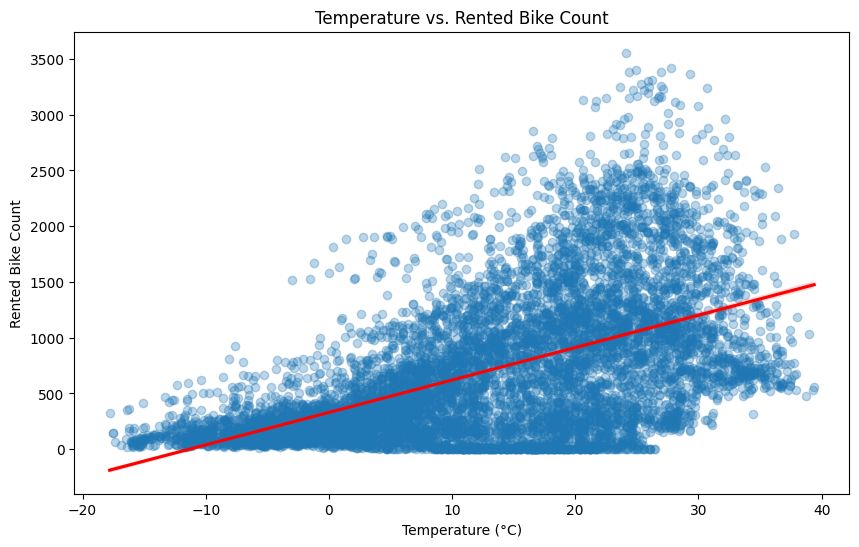


Linear Regression Summary:

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:14:02   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const        

In [244]:
import scipy.stats as stats
import statsmodels.api as sm


# 1️⃣ Check correlation (Pearson's)
corr, p_value = stats.pearsonr(df2["Temperature(°C)"], df2["Rented Bike Count"])
print(f"Pearson Correlation between Temperature and Rented Bike Count: {corr:.4f}")
print(f"P-value: {p_value:.20f}")

if p_value < 0.05:
    print("✅ Temperature significantly impacts bike rentals!")
else:
    print("📉 No significant impact of temperature on bike rentals.")

# 2️⃣ Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df2["Temperature(°C)"], y=df2["Rented Bike Count"], scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title("Temperature vs. Rented Bike Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.show()

# 3️⃣ Linear Regression
X = sm.add_constant(df2["Temperature(°C)"])  # Adding constant for intercept
y = df2["Rented Bike Count"]
model = sm.OLS(y, X).fit()
print("\nLinear Regression Summary:\n")
print(model.summary())


#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm


# 1️⃣ Check correlation (Pearson's)
corr, p_value = stats.pearsonr(df2["Temperature(°C)"], df2["Rented Bike Count"])
print(f"Pearson Correlation between Temperature and Rented Bike Count: {corr:.4f}")
print(f"P-value: {p_value:.20f}")

if p_value < 0.05:
    print("✅ Temperature significantly impacts bike rentals!")
else:
    print("📉 No significant impact of temperature on bike rentals.")

# 2️⃣ Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df2["Temperature(°C)"], y=df2["Rented Bike Count"], scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title("Temperature vs. Rented Bike Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.show()

# 3️⃣ Linear Regression
X = sm.add_constant(df2["Temperature(°C)"])  # Adding constant for intercept
y = df2["Rented Bike Count"]
model = sm.OLS(y, X).fit()
print("\nLinear Regression Summary:\n")
print(model.summary())


##### Which statistical test have you done to obtain P-Value?

The Pearson correlation test (stats.pearsonr) was used to calculate the correlation coefficient and p-value between Temperature (°C) and Rented Bike Count.

Additionally, Ordinary Least Squares (OLS) regression (sm.OLS) was performed to analyze the relationship between temperature and bike rentals, providing another p-value for statistical significance.

##### Why did you choose the specific statistical test?



*  pearson Correlation Test:

  *   Measures the linear relationship between two continuous variables.
  *  It helps determine whether temperature and bike rentals move together (positive/negative correlation).
  *   The p-value from Pearson's test indicates whether this correlation is statistically significant.


*  OLS Regression Analysis:


*  Provides a more detailed relationship between temperature and bike rentals, estimating how much bike rentals increase/decrease per unit change in temperature.

*  The regression p-value tests the null hypothesis that temperature has no impact on bike rentals.








### Hypothetical Statement -"If there is truly no positive relationship between numerical weather features (such as Temperature, Humidity, or Wind Speed) and the number of rented bikes, then any observed correlation in the data is due to random chance. However, if a significant positive correlation exists, an increase in a weather feature will be associated with a rise in bike rentals, suggesting that weather conditions influence user behavior." 🚴‍♂️📊

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no positive correlation between the numerical weather feature (e.g., Temperature, Humidity, Wind Speed, etc.) and the rented bike count. That is, the correlation coefficient ( 𝜌 ρ) is less than or equal to zero.

Alternative Hypothesis (H₁): There is a significant positive correlation between the numerical weather feature and the rented bike count. That is, as the weather feature increases, the number of rented bikes also tends to increase.

In [245]:
alpha = 0.05  #significance level (alpha)


# Listing all numerical columns to test
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
                      'Visibility (10m)', 'Dew point temperature(°C)',
                      'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
results = {}

for feature in numerical_features:
    # Performing Pearson correlation test
    corr, p_value = stats.pearsonr(df2[feature], df2['Rented Bike Count'])

    # One-tailed p-value (divide by 2 if correlation > 0)
    one_tailed_p_value = p_value / 2 if corr > 0 else 1  # If correlation ≤ 0, we set p=1 (fail to reject H₀)
    results[feature] = {'Correlation': corr, 'P-value (One-Tailed)': one_tailed_p_value}

    # Hypothesis test result
    if one_tailed_p_value < alpha:
        print(f"{feature}: Reject H₀ (Positive Impact, p={one_tailed_p_value:.5f})")
    else:
        print(f"{feature}: Fail to Reject H₀ (No Significant Positive Impact, p={one_tailed_p_value:.5f})")

results_df = pd.DataFrame(results).T
print(results_df)


Temperature(°C): Reject H₀ (Positive Impact, p=0.00000)
Humidity(%): Fail to Reject H₀ (No Significant Positive Impact, p=1.00000)
Wind speed (m/s): Reject H₀ (Positive Impact, p=0.00000)
Visibility (10m): Reject H₀ (Positive Impact, p=0.00000)
Dew point temperature(°C): Reject H₀ (Positive Impact, p=0.00000)
Solar Radiation (MJ/m2): Reject H₀ (Positive Impact, p=0.00000)
Rainfall(mm): Fail to Reject H₀ (No Significant Positive Impact, p=1.00000)
Snowfall (cm): Fail to Reject H₀ (No Significant Positive Impact, p=1.00000)
                           Correlation  P-value (One-Tailed)
Temperature(°C)               0.538558          0.000000e+00
Humidity(%)                  -0.199780          1.000000e+00
Wind speed (m/s)              0.121108          2.772281e-30
Visibility (10m)              0.199280          1.836352e-79
Dew point temperature(°C)     0.379788         6.627921e-299
Solar Radiation (MJ/m2)       0.261837         1.390197e-137
Rainfall(mm)                 -0.123074       

<ipython-input-246-469cb0d0c562>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=correlations, palette=colors)


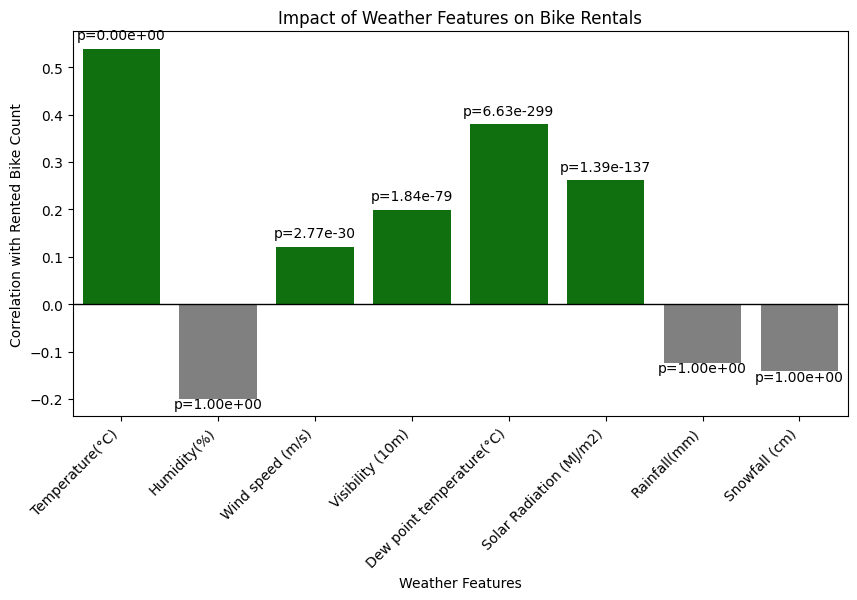

In [246]:
# Extracting correlation values and one-tailed p-values
features = list(results.keys())
correlations = [results[feature]['Correlation'] for feature in features]
p_values = [results[feature]['P-value (One-Tailed)'] for feature in features]

# Assigning colors based on significance (green = significant positive impact, gray = no significant positive impact)
colors = ['green' if p < 0.05 and corr > 0 else 'gray' for corr, p in zip(correlations, p_values)]

# bar plot for correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=correlations, palette=colors)

# assigning bars with p-values
for i, (corr, p) in enumerate(zip(correlations, p_values)):
    plt.text(i, corr + 0.02 * np.sign(corr), f"p={p:.2e}", ha='center', fontsize=10)

plt.axhline(0, color='black', linewidth=1)  # Add a baseline at zero correlation
plt.xticks(rotation=45, ha='right')
plt.xlabel("Weather Features")
plt.ylabel("Correlation with Rented Bike Count")
plt.title("Impact of Weather Features on Bike Rentals")
plt.show()

<ipython-input-247-cd866004b603>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dff["Feature"], x=dff["Correlation"], palette="coolwarm", edgecolor="black")


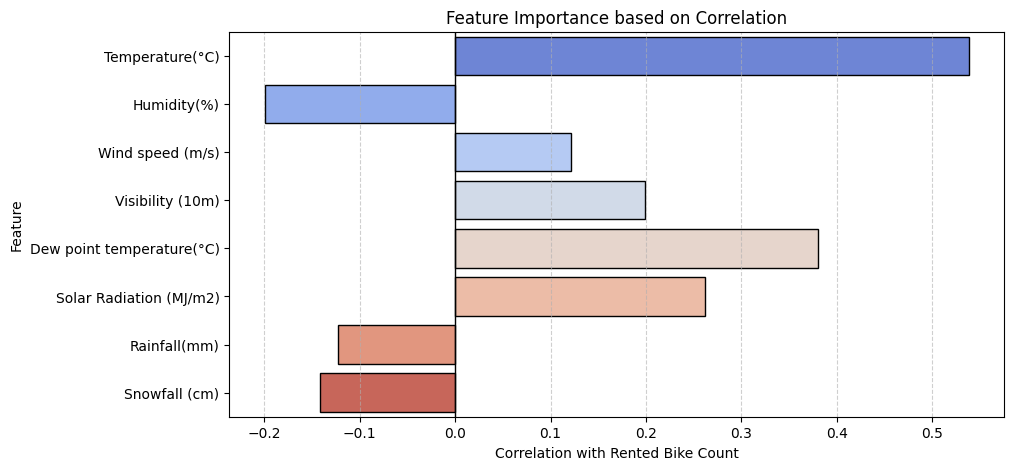

<ipython-input-247-cd866004b603>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dff["Feature"], x=dff["log_P_value"], palette="Blues_r", edgecolor="black")


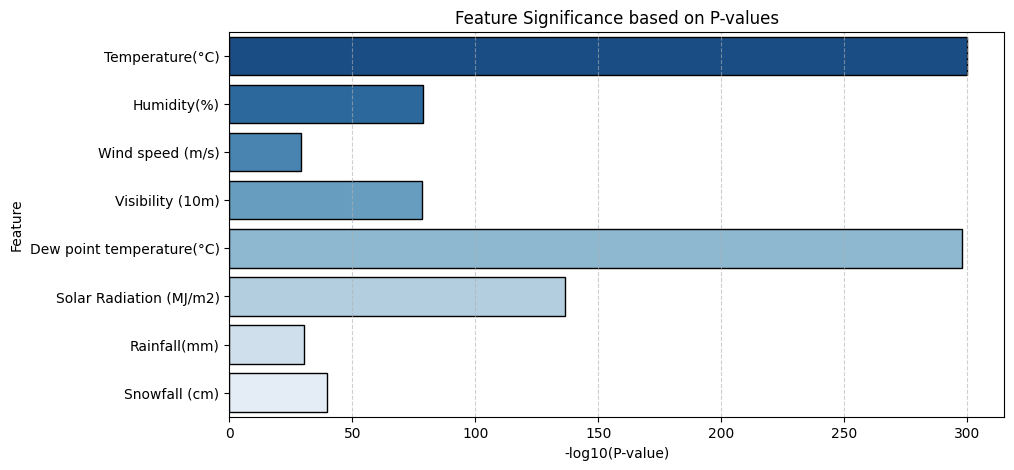

In [247]:
features = ["Temperature(\u00b0C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)",
            "Dew point temperature(\u00b0C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]
correlations = [0.538558, -0.199780, 0.121108, 0.199280, 0.379788, 0.261837, -0.123074, -0.141804]
p_values = [0.000000, 1.475065e-79, 5.544562e-30, 3.672704e-79, 1.325584e-298, 2.780395e-137, 6.462816e-31, 1.398012e-40]

# Converting p-values to log scale safely
log_p_values = -np.log10(np.array(p_values) + 1e-300)  # Adding a very  small value to avoid log(0)

# Creating a DataFrame
dff = pd.DataFrame({"Feature": features, "Correlation": correlations, "log_P_value": log_p_values})

def plot_correlation():
    plt.figure(figsize=(10, 5))
    sns.barplot(y=dff["Feature"], x=dff["Correlation"], palette="coolwarm", edgecolor="black")
    plt.axvline(x=0, color="black", linewidth=1)
    plt.xlabel("Correlation with Rented Bike Count")
    plt.ylabel("Feature")
    plt.title("Feature Importance based on Correlation")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

def plot_p_values():
    plt.figure(figsize=(10, 5))
    sns.barplot(y=dff["Feature"], x=dff["log_P_value"], palette="Blues_r", edgecolor="black")
    plt.xlabel("-log10(P-value)")
    plt.ylabel("Feature")
    plt.title("Feature Significance based on P-values")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

plot_correlation()
plot_p_values()


#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

We performed the Pearson correlation test to measure the strength and direction of the linear relationship between numerical weather features (such as Temperature, Humidity, and Wind Speed) and the Rented Bike Count. The test provides a correlation coefficient (r) and a P-value to determine statistical significance.



##### Why did you choose the specific statistical test?

Quantifies Linear Relationship 📈
*   The Pearson correlation coefficient measures the degree of linear association between two continuous variables, which is ideal for testing how weather features impact bike rentals.

Determines Statistical Significance ✅

*   The P-value helps assess whether the observed correlation is due to chance or represents a statistically significant relationship.
*   We use a one-tailed test since we are specifically testing for a positive correlation (i.e., whether higher values of a weather feature lead to more bike rentals).








Insights from the Analysis
1. Features with a Significant Positive Impact on Rentals (Green Bars)
These features have positive correlation with bike rentals and statistically significant p-values:

*  Temperature(°C) (r = 0.538558, p < 0.05) → Higher temperatures lead to increased bike rentals.
*  Wind Speed (m/s) (r = 0.121108, p < 0.05) → Slight positive impact; may indicate good weather conditions.


*   Visibility (10m) (r = 0.199280, p < 0.05) → Clearer visibility increases bike rentals.
*   Dew Point Temperature(°C) (r = 0.379788, p < 0.05) → Warmer air and less humidity support biking.



* Solar Radiation (MJ/m²) (r = 0.261837, p < 0.05) → More sunlight encourages outdoor biking.


2. Features with No Significant Positive Impact (Gray Bars)
These features either have a negative correlation or are not statistically significant:


*   Humidity(%) (r = -0.199780, p = 1.00000) → Higher humidity discourages biking.

*  Rainfall (mm) (r = -0.123074, p = 1.00000) → More rain reduces biking frequency.


*   Snowfall (cm) (r = -0.141804, p = 1.00000) → Snowfall negatively affects biking conditions.



Conclusion

*   Temperature, visibility, wind speed, and sunlight encourage bike rentals.
*   Rain, snow, and high humidity discourage biking.



*   Bike rentals increase as weather conditions become more favorable for outdoor activity.




Bike rentals increase as weather conditions become more favorable for outdoor activity.
This analysis helps city planners and bike-sharing companies optimize availability based on weather conditions. 🚲🌞

### Hypothetical Statement -"There is a significant difference in the average number of rented bikes between weekends and weekdays, with weekends having a higher average rental count than weekdays."

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null Hypothesis (H₀): The average number of rented bikes on weekends is less than or equal to the average number of rented bikes on weekdays.


Alternative Hypothesis (H₁): The average number of rented bikes on weekends is greater than the average number of rented bikes on weekdays.




#### 2. Perform an appropriate statistical test.

In [248]:
# Splitting the data into two groups: Weekends vs. Weekdays
weekend_rentals = df[df['IsWeekend'] == 'Weekend']['Rented Bike Count']
weekday_rentals = df[df['IsWeekend'] == 'Weekday']['Rented Bike Count']

# Performing a one-tailed independent t-test
t_stat, p_value = stats.ttest_ind(weekend_rentals, weekday_rentals, alternative='greater')

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Weekends have significantly higher bike rentals than weekdays.")
else:
    print("Fail to Reject H₀: No significant difference in bike rentals on weekends.")


T-statistic: -3.4150
P-value: 0.999680
Fail to Reject H₀: No significant difference in bike rentals on weekends.


##### Which statistical test have you done to obtain P-Value?

The independent (two-sample) t-test was performed to compare the average number of rented bikes on weekends and weekdays. Specifically, a one-tailed t-test was used with the alternative='greater' parameter, testing whether weekends have significantly higher rentals than weekdays.



##### Why did you choose the specific statistical test?

The t-test is appropriate because we are comparing the means of two independent groups: weekend rentals and weekday rentals.The t-test helps determine whether the average bike rentals on weekends are significantly greater than on weekdays, aligning with our alternative hypothesis (H₁).

In [249]:

# Define significance level
alpha = 0.05

# 1. ANOVA: Seasons vs. Rented Bike Count
season_means = df3.groupby('Seasons')['Rented Bike Count'].mean()
season_groups = [df3[df3['Seasons'] == season]['Rented Bike Count'] for season in df3['Seasons'].unique()]
anova_result = stats.f_oneway(*season_groups)

print(f"ANOVA Test for Seasons vs. Rented Bike Count: p-value = {anova_result.pvalue:.5f}")
if anova_result.pvalue < alpha:
    print("Reject H₀: Seasons have a significant impact on bike rentals.")
    print("Mean Rented Bike Count per Season:\n", season_means, "\n")
else:
    print("Fail to Reject H₀: Seasons do not significantly impact bike rentals.\n")

# 2. T-test: Holiday vs. Rented Bike Count
holiday_yes = df3[df3['Holiday'] == 'Holiday']['Rented Bike Count']
holiday_no = df3[df3['Holiday'] == 'No Holiday']['Rented Bike Count']

t_stat_holiday, p_value_holiday = stats.ttest_ind(holiday_yes, holiday_no, equal_var=False)
mean_holiday_yes = holiday_yes.mean()
mean_holiday_no = holiday_no.mean()

print(f"T-test for Holiday vs. Rented Bike Count: p-value = {p_value_holiday:.5f}")
if p_value_holiday < alpha:
    print("Reject H₀: Holidays have a significant impact on bike rentals.")
    print(f"Mean on Holiday: {mean_holiday_yes:.2f}, Mean on No Holiday: {mean_holiday_no:.2f}")
    if mean_holiday_yes > mean_holiday_no:
        print("→ Holidays have a **positive** impact on bike rentals.\n")
    else:
        print("→ Holidays have a **negative** impact on bike rentals.\n")
else:
    print("Fail to Reject H₀: Holidays do not significantly impact bike rentals.\n")

# 3. T-test: Functioning Day vs. Rented Bike Count
func_yes = df3[df3['Functioning Day'] == 'Yes']['Rented Bike Count']
func_no = df3[df3['Functioning Day'] == 'No']['Rented Bike Count']

t_stat_func, p_value_func = stats.ttest_ind(func_yes, func_no, equal_var=False)
mean_func_yes = func_yes.mean()
mean_func_no = func_no.mean()

print(f"T-test for Functioning Day vs. Rented Bike Count: p-value = {p_value_func:.5f}")
if p_value_func < alpha:
    print("Reject H₀: Functioning days have a significant impact on bike rentals.")
    print(f"Mean on Functioning Day: {mean_func_yes:.2f}, Mean on Non-Functioning Day: {mean_func_no:.2f}")
    if mean_func_yes > mean_func_no:
        print("→ Functioning days have a **positive** impact on bike rentals.\n")
    else:
        print("→ Functioning days have a **negative** impact on bike rentals.\n")
else:
    print("Fail to Reject H₀: Functioning days do not significantly impact bike rentals.\n")


ANOVA Test for Seasons vs. Rented Bike Count: p-value = 0.00000
Reject H₀: Seasons have a significant impact on bike rentals.
Mean Rented Bike Count per Season:
 Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64 

T-test for Holiday vs. Rented Bike Count: p-value = 0.00000
Reject H₀: Holidays have a significant impact on bike rentals.
Mean on Holiday: 499.76, Mean on No Holiday: 715.23
→ Holidays have a **negative** impact on bike rentals.

T-test for Functioning Day vs. Rented Bike Count: p-value = 0.00000
Reject H₀: Functioning days have a significant impact on bike rentals.
Mean on Functioning Day: 729.16, Mean on Non-Functioning Day: 0.00
→ Functioning days have a **positive** impact on bike rentals.



# **Hypothesis Testing for Assessing Normality of Data**




*   Null Hypothesis (H₀): The data for the given numerical variable is normally distributed.
*   Alternative Hypothesis (H₁): The data for the given numerical variable is not normally distributed.



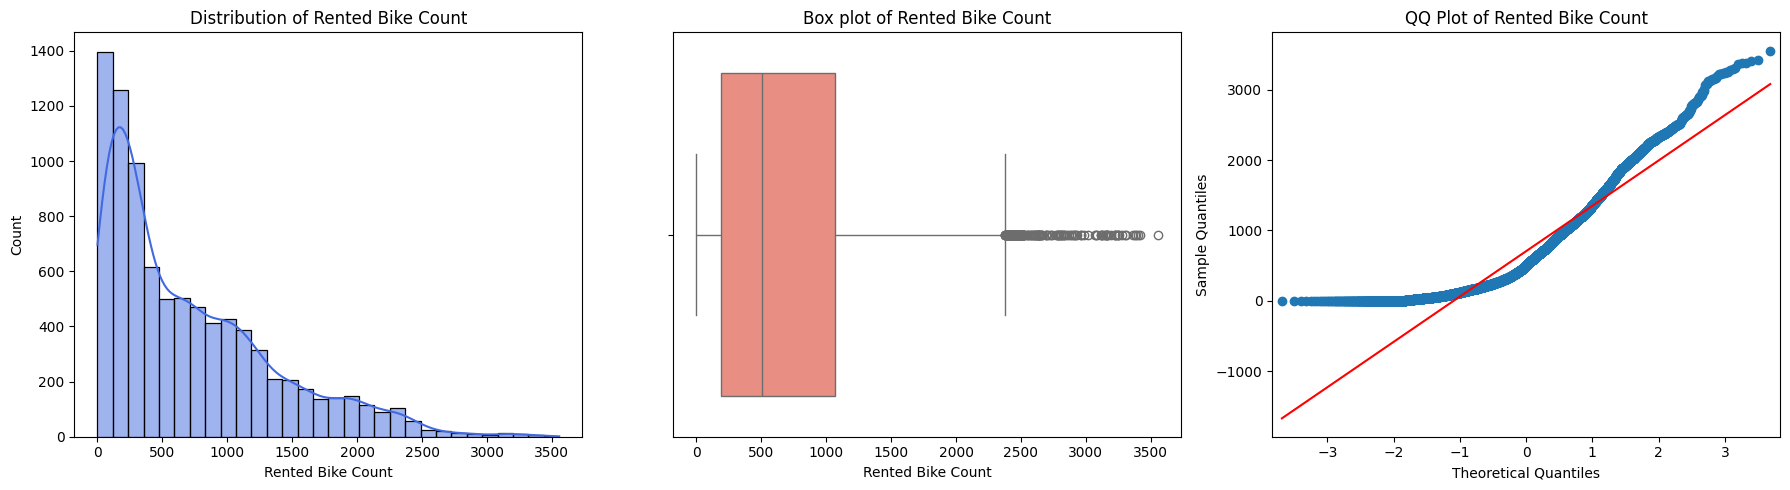


🔍 Normality Tests for: Rented Bike Count
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 311.37505
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


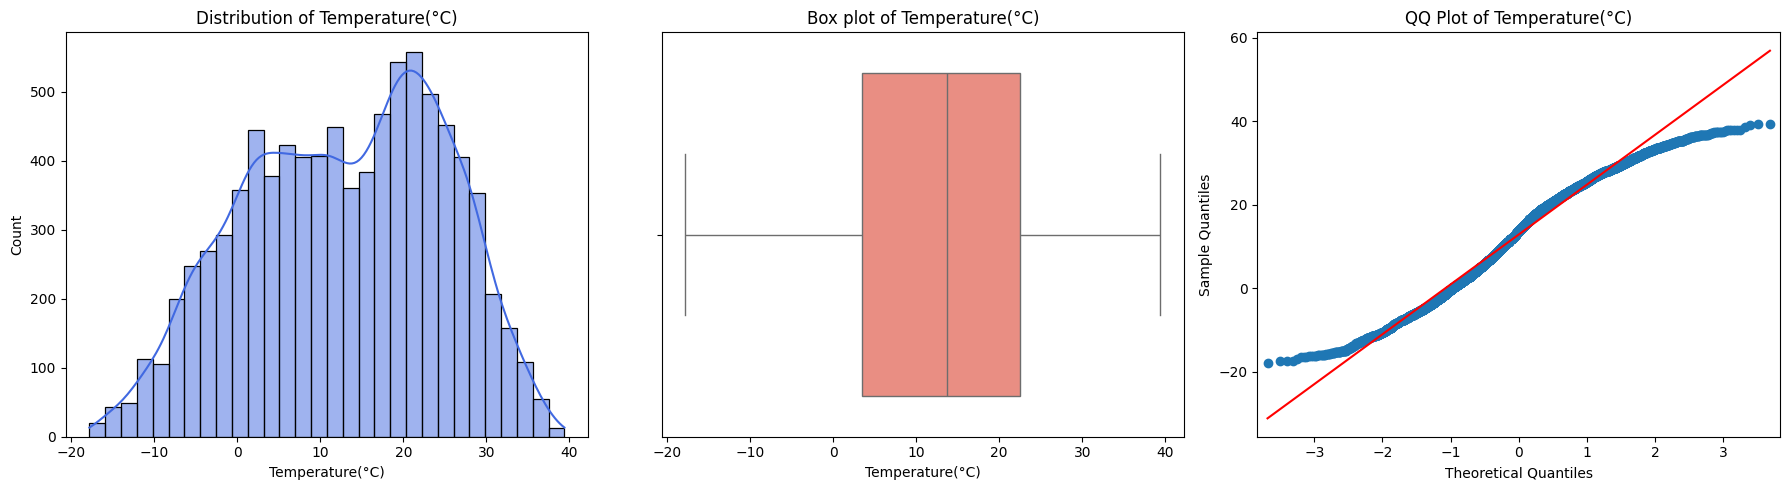


🔍 Normality Tests for: Temperature(°C)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 52.66509
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


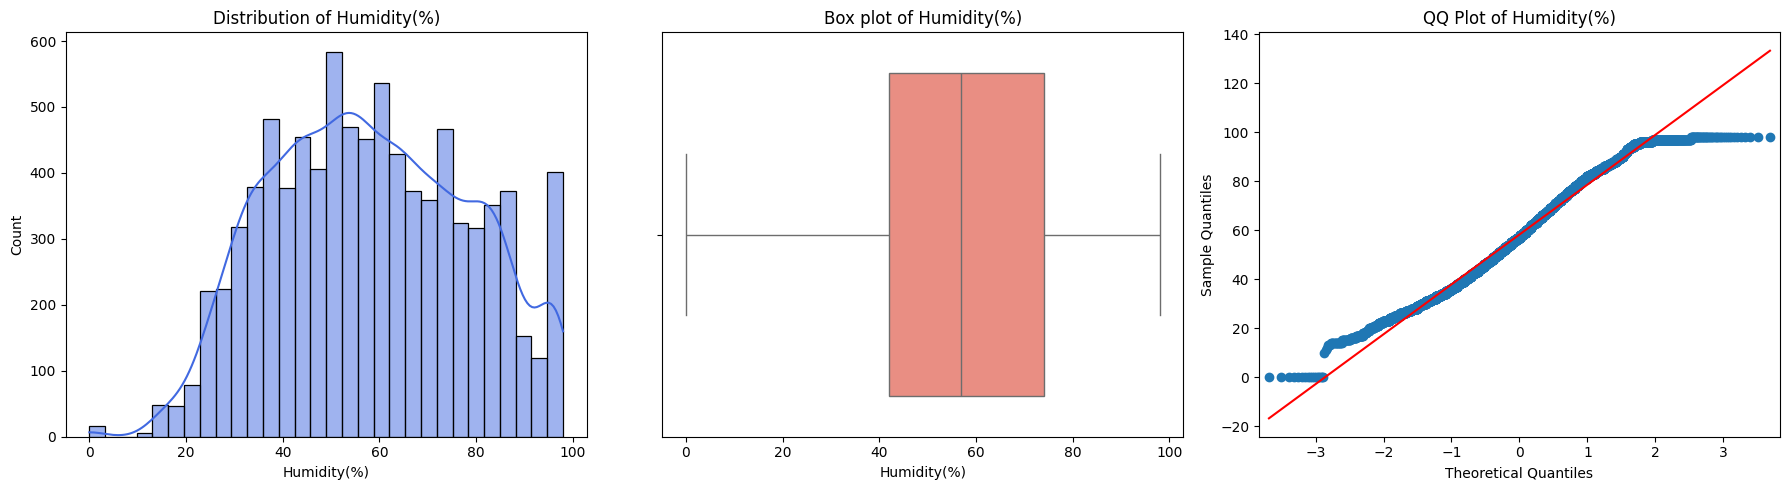


🔍 Normality Tests for: Humidity(%)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 35.73472
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


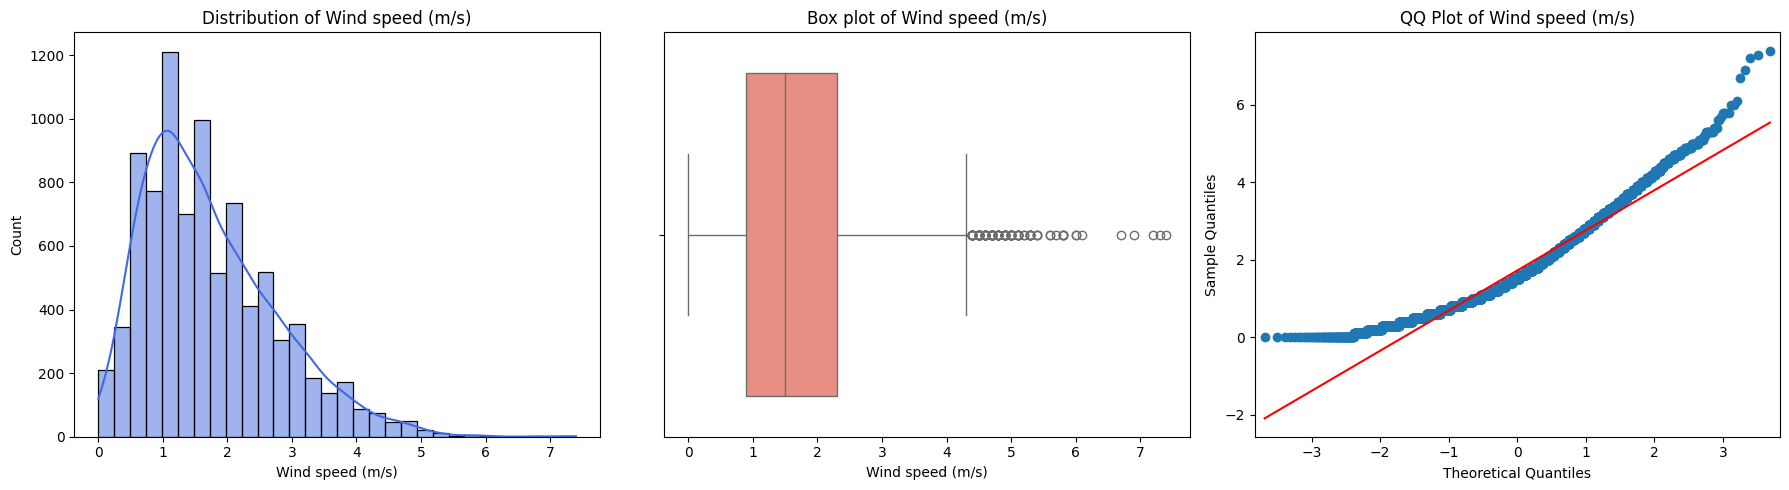


🔍 Normality Tests for: Wind speed (m/s)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 122.52287
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


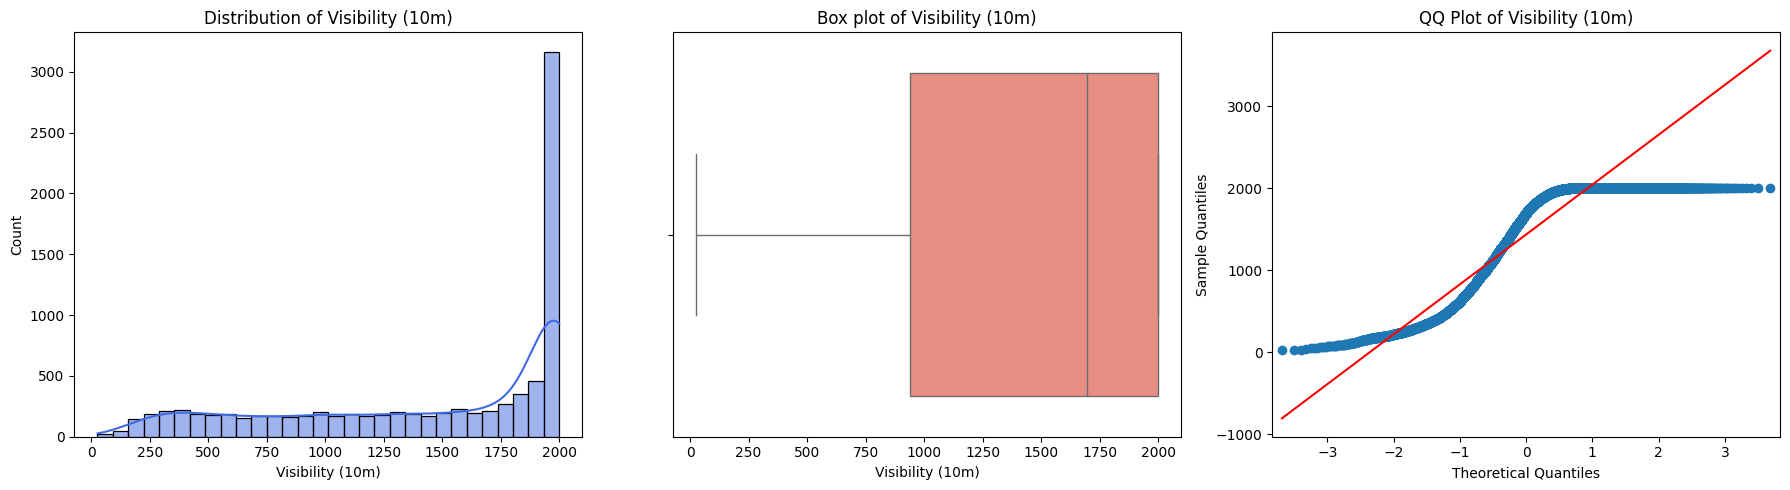


🔍 Normality Tests for: Visibility (10m)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 542.49967
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


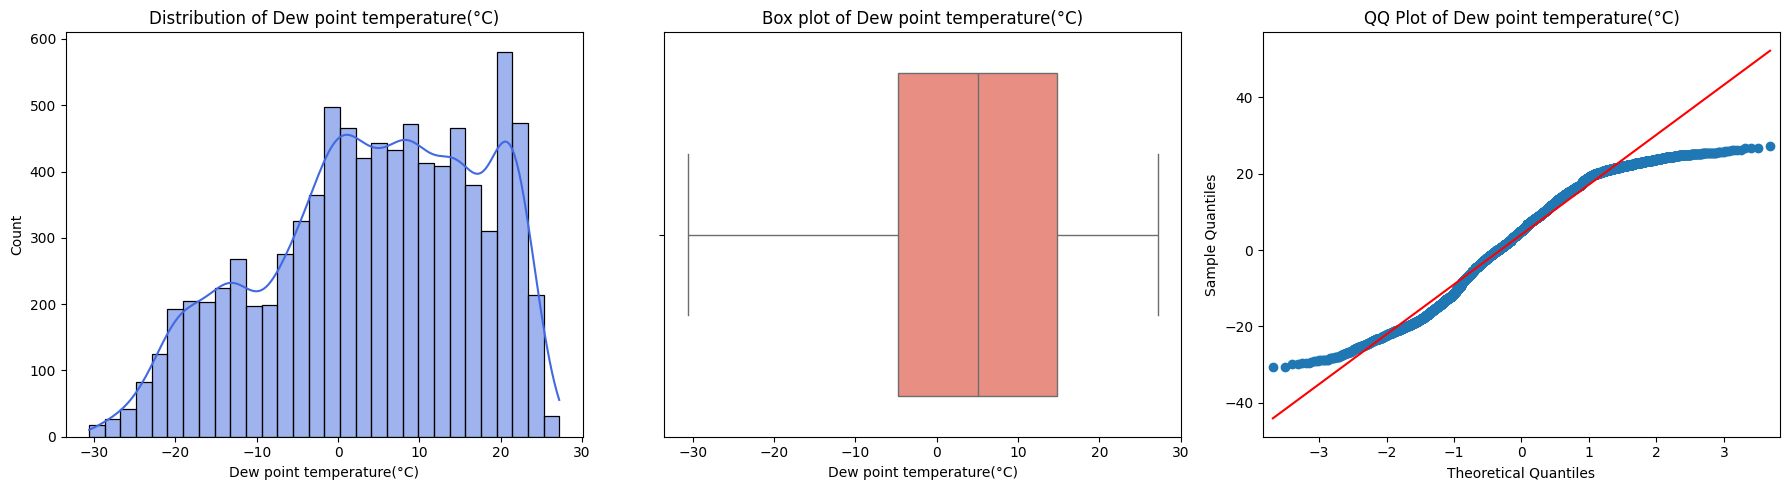


🔍 Normality Tests for: Dew point temperature(°C)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 69.27541
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


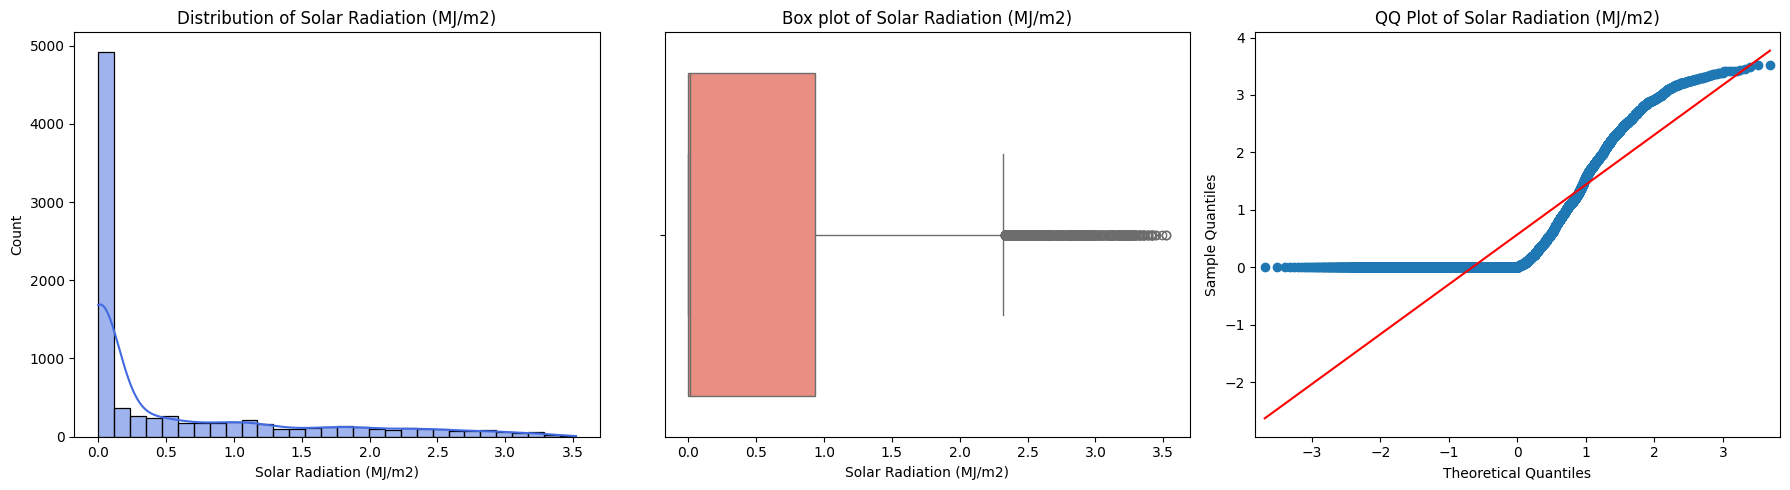


🔍 Normality Tests for: Solar Radiation (MJ/m2)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 1075.55152
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


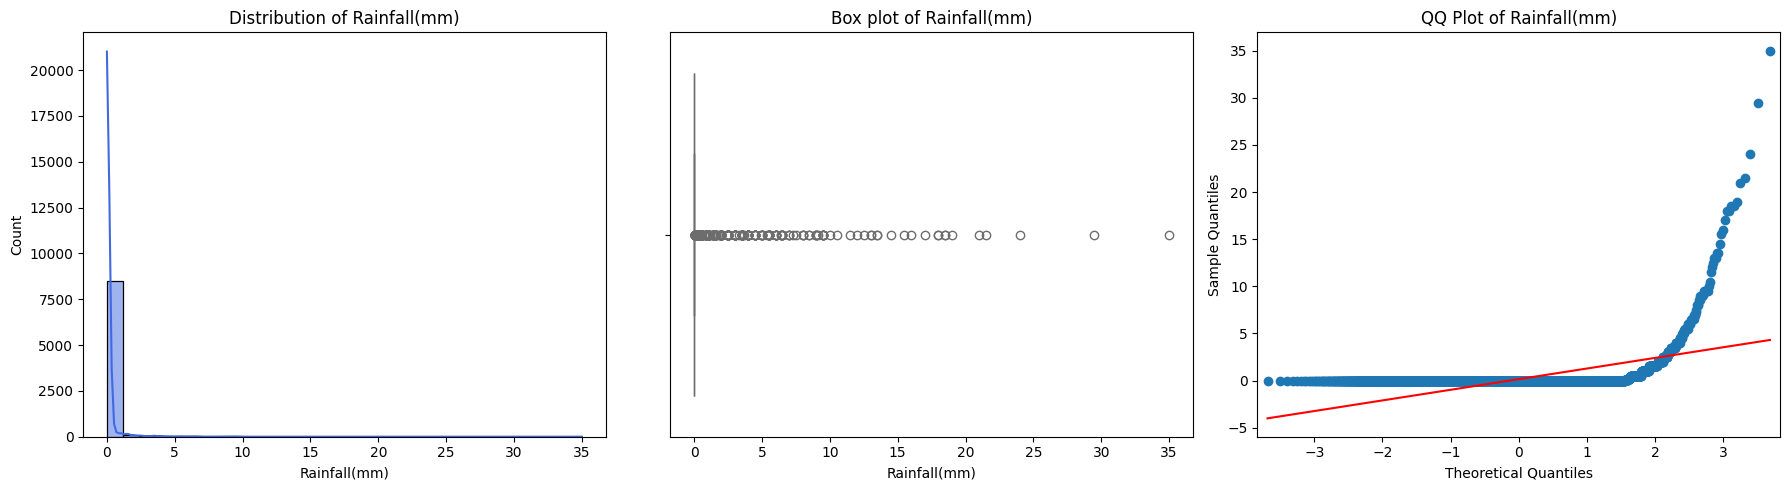


🔍 Normality Tests for: Rainfall(mm)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 2976.63588
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


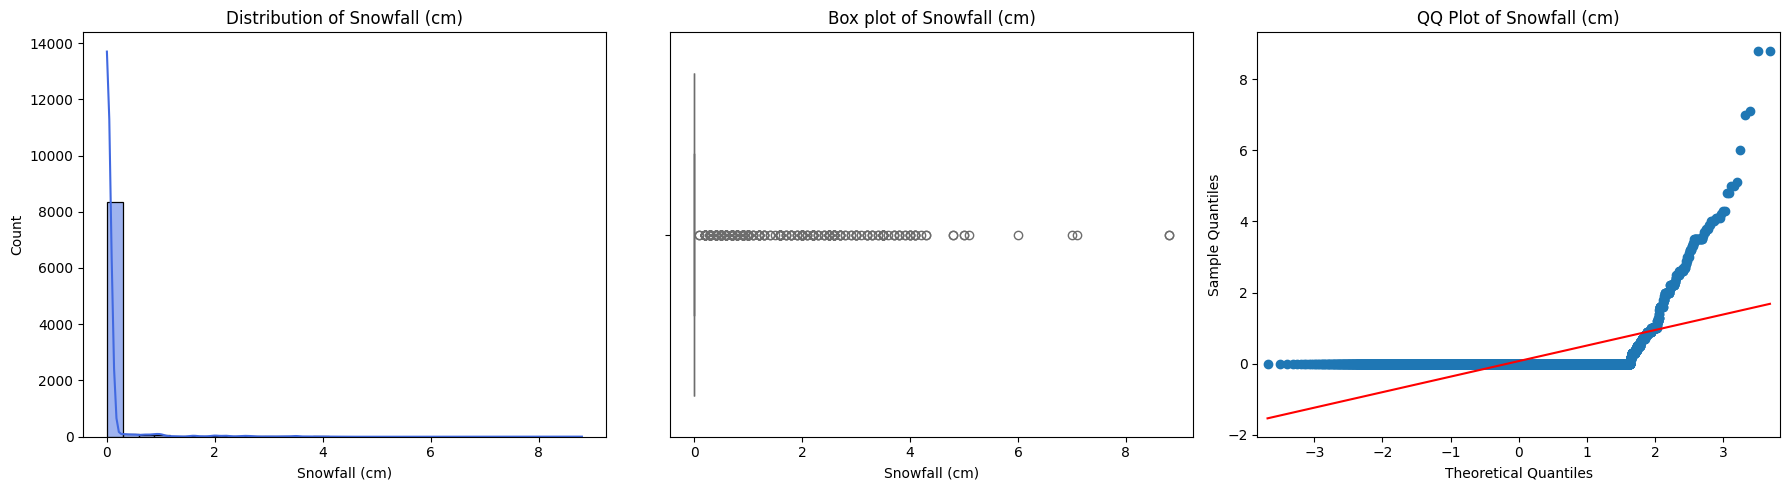


🔍 Normality Tests for: Snowfall (cm)
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 2987.17715
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


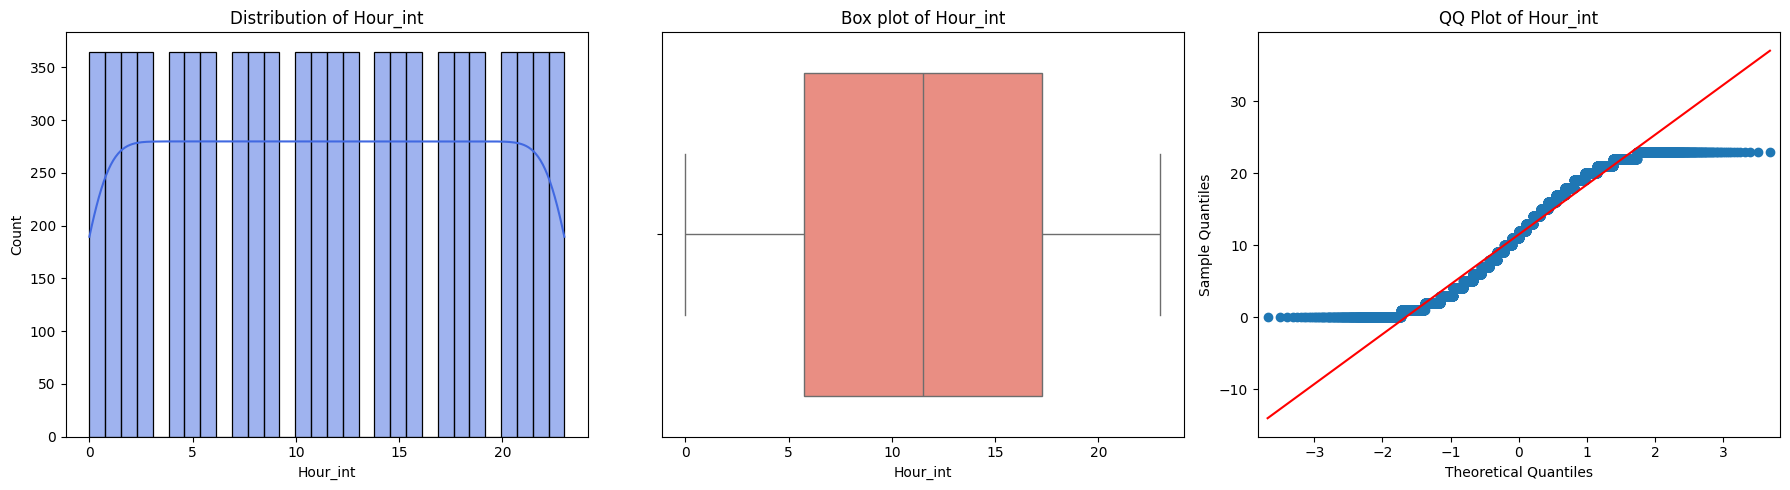


🔍 Normality Tests for: Hour_int
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 106.67410
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


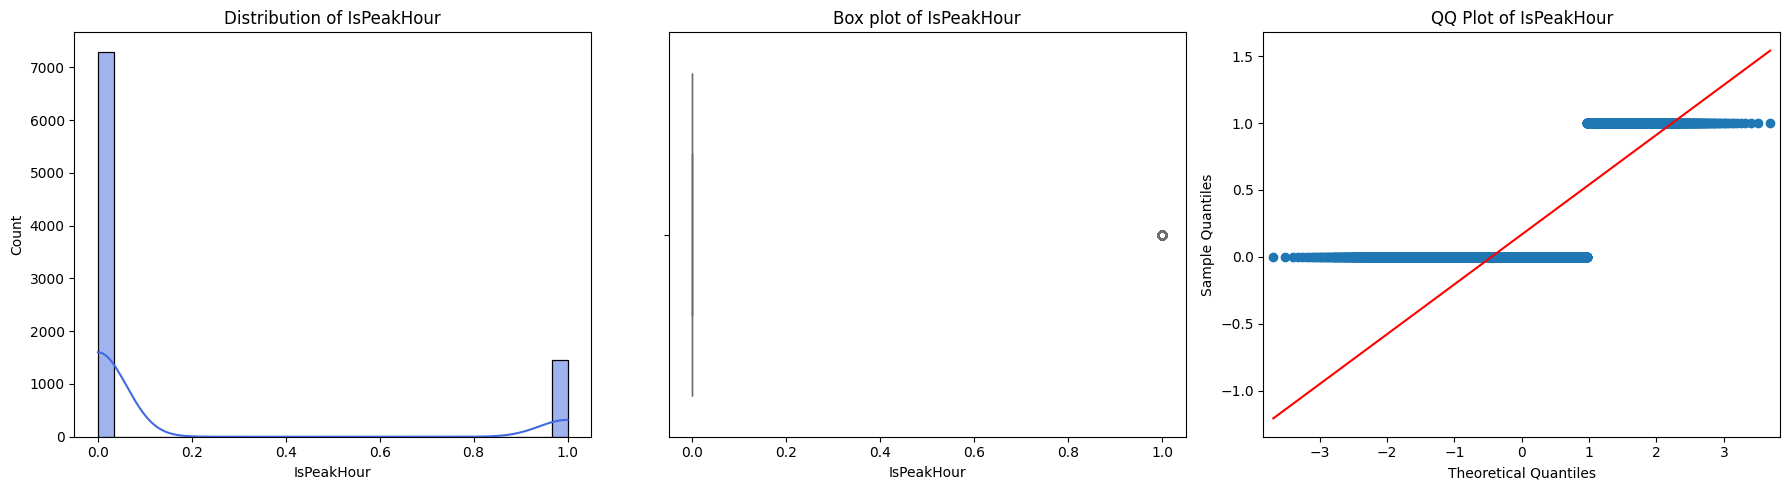


🔍 Normality Tests for: IsPeakHour
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 2507.41818
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


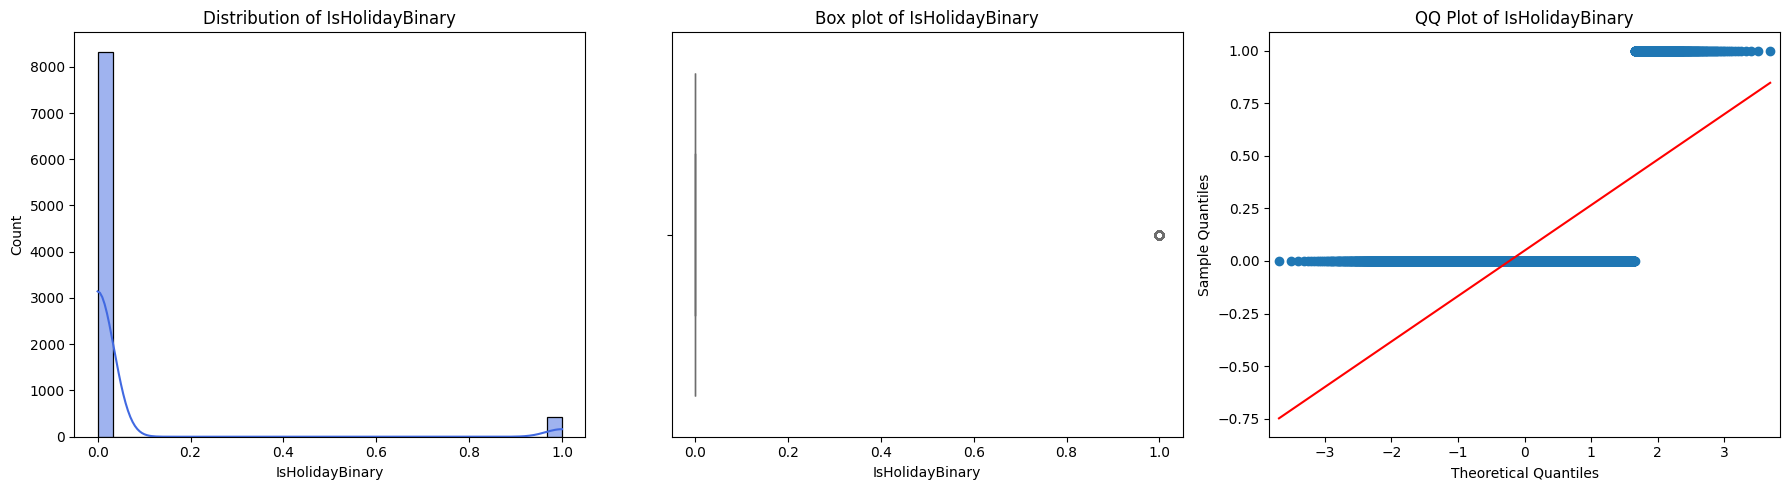


🔍 Normality Tests for: IsHolidayBinary
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 3167.63696
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


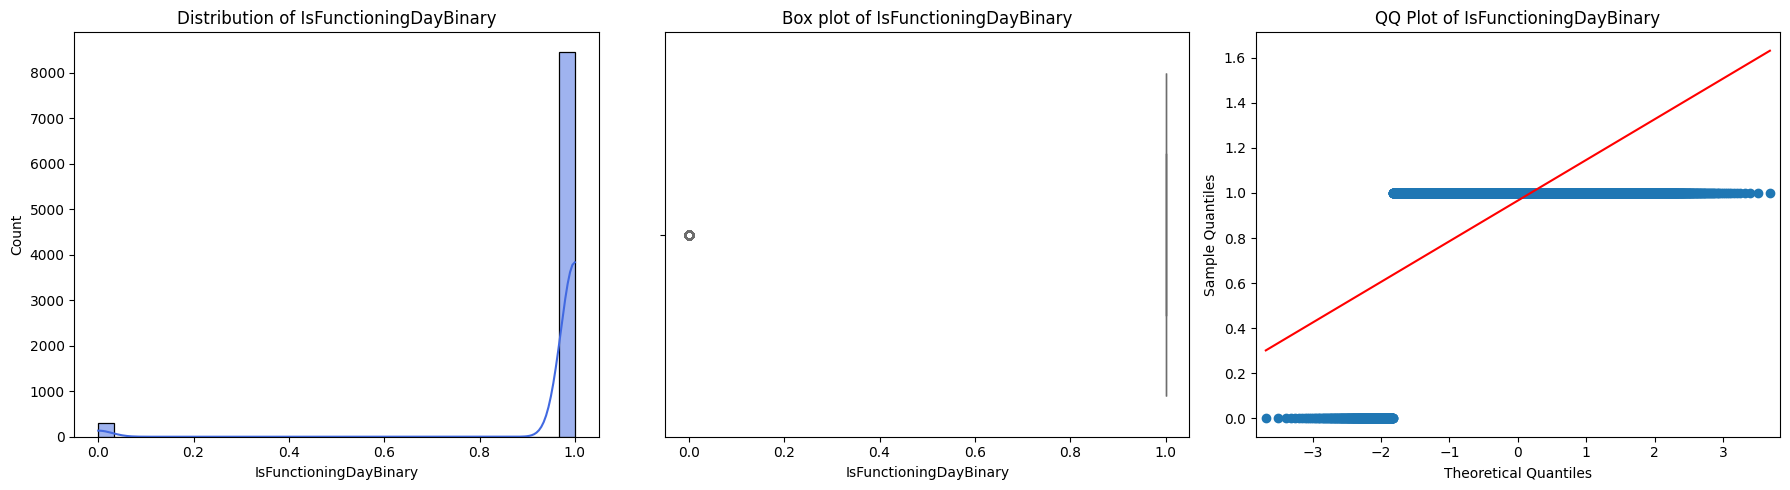


🔍 Normality Tests for: IsFunctioningDayBinary
Shapiro-Wilk Test: p-value = 0.00000
D'Agostino-Pearson Test: p-value = 0.00000
Anderson-Darling Test: Statistic = 3246.25341
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ Reject H₀: The data is NOT normally distributed.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


In [250]:


# Selecting only  numerical columns
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1️⃣ Histogram & KDE Plot
    sns.histplot(df2[col], kde=True, bins=30, ax=axes[0], color='royalblue')
    axes[0].set_title(f"Distribution of {col}")

    # 2️⃣ Box Plot
    sns.boxplot(x=df2[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Box plot of {col}")

    # 3️⃣ QQ Plot
    sm.qqplot(df2[col], line='s', ax=axes[2])
    axes[2].set_title(f"QQ Plot of {col}")

    plt.tight_layout()
    plt.show()

    # Performing Normality Tests
    print(f"\n🔍 Normality Tests for: {col}")

    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(df2[col])
    print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.5f}")

    # D'Agostino-Pearson Test
    dagostino_test = stats.normaltest(df2[col])
    print(f"D'Agostino-Pearson Test: p-value = {dagostino_test.pvalue:.5f}")

    # Anderson-Darling Test
    anderson_test = stats.anderson(df2[col])
    print(f"Anderson-Darling Test: Statistic = {anderson_test.statistic:.5f}")
    print(f"Critical Values: {anderson_test.critical_values}")
    print(f"Significance Levels: {anderson_test.significance_level}")

    # Interpretation
    if shapiro_test.pvalue < 0.05 or dagostino_test.pvalue < 0.05:
        print("❌ Reject H₀: The data is NOT normally distributed.\n")
    else:
        print("✅ Fail to reject H₀: The data appears normally distributed.\n")


In [261]:
# Load Dataset
df3=pd.read_csv('/content/SeoulBikeData (2).csv',encoding='ISO-8859-1')


# **Machine Learning Model**

# **Importing libraries**

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score

# **Preprocessing and Encoding and Scaling**

In [264]:
# 1️⃣ Preparing the Data
df_ml = df3.drop(columns=['Date', 'Functioning Day']).copy()

# One-hot encoding categorical variables
df_ml = pd.get_dummies(df_ml, columns=["Seasons", "Holiday"], drop_first=True)
X = df_ml.drop(columns=["Rented Bike Count"])
y = df_ml["Rented Bike Count"]

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **# Evaluating Multiple Machine Learning Models**

In [271]:
# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3️⃣ Training Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', eval_metric="rmse", random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    if name == "XGBoost":
        model.fit(
            X_train, y_train,
            eval_set=[(X_test, y_test)],
            verbose=False
        )
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}

print("\n📊 Model Performance Comparison:")
for model, metrics in results.items():
    print(f"\n📌 {model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
#selecting XGBoost for further model


📊 Model Performance Comparison:

📌 Linear Regression Performance:
R² Score: 0.4807
MAE: 344.5769
RMSE: 465.1405

📌 Random Forest Performance:
R² Score: 0.7823
MAE: 174.4776
RMSE: 301.2002

📌 XGBoost Performance:
R² Score: 0.7908
MAE: 177.4164
RMSE: 295.2135


# **Hyperparameter Tuning for Best Machine Learning Model**

In [274]:
# Defining parameter grid for XGBoost
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 9],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Initializing XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1,  colsample_bytree=1.0, learning_rate=0.05, max_depth=4,
    n_estimators=300, subsample=0.8,
    reg_lambda=5,  # Increase L2 regularization (default = 1)
    reg_alpha=2,  )

# Perform Grid Search
grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb,
    scoring="r2",
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Get best parameters
best_xgb_params = grid_search_xgb.best_params_
print("\n🔥 Best XGBoost Parameters:", best_xgb_params)

# Training the best XGBoost model7
best_xgb = xgb.XGBRegressor(**best_xgb_params, objective="reg:squarederror", random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluating performance
y_pred_xgb = best_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n✅ Best XGBoost Performance After Tuning:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits

🔥 Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}

✅ Best XGBoost Performance After Tuning:
R² Score: 0.7935
MAE: 171.2733
RMSE: 293.3029


In [275]:
from sklearn.metrics import explained_variance_score
accuracy_xgb = explained_variance_score(y_test, y_pred_xgb)

print(f"✅ XGBoost Model Accuracy (EVS): {accuracy_xgb:.4f}")


✅ XGBoost Model Accuracy (EVS): 0.7942


# **Cross Validation**

In [276]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2')
print(f"📊 Cross-Validation R² Scores: {cv_r2}")
print(f"🔍 Mean R² Score: {np.mean(cv_r2):.4f}")


📊 Cross-Validation R² Scores: [0.80651546 0.79132682 0.78125954 0.81466287 0.76275772]
🔍 Mean R² Score: 0.7913


# **Model Saving**

In [257]:
joblib.dump(X.columns, "X_columns.pkl")  # Save feature column names

#Saving the trained model
joblib.dump(best_xgb, "xgboost_bike_rental_model.pkl")

print("✅ Model saved successfully!")

['X_columns.pkl']

In [258]:

# Saving the trained model
joblib.dump(best_xgb, "xgboost_bike_rental_model.pkl")

print("✅ Model saved successfully!")


✅ Model saved successfully!


# **Making Predictions from our Model**

In [259]:

# Loading the trained model and feature columns
loaded_model = joblib.load("/content/xgboost_bike_rental_model.pkl")
X_columns = joblib.load("/content/X_columns.pkl")

# Defining the function to preprocess input and predict
def predict_bike_rentals(input_data: dict):
    # Converting input dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # One-hot encoding categorical variables (Seasons & Holiday)
    input_df = pd.get_dummies(input_df, columns=["Seasons", "Holiday"], drop_first=True)

    # Ensuring input has the same columns as the trained model
    missing_cols = set(X_columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0  # Add missing columns with value 0

    # Reordering columns to match training data
    input_df = input_df[X_columns]

    # Make prediction
    prediction = loaded_model.predict(input_df)

    return int(prediction[0])

# Example input data
sample_input = {
    "Hour": 10,
    "Temperature(°C)": 15.0,
    "Humidity(%)": 60,
    "Wind speed (m/s)": 2.5,
    "Visibility (10m)": 2000,
    "Dew point temperature(°C)": 10.0,
    "Solar Radiation (MJ/m2)": 0.5,
    "Rainfall(mm)": 0.0,
    "Snowfall (cm)": 0.0,
    "Seasons": "Summer",
    "Holiday": "No Holiday"
}

# Predicting bike rentals counts
predicted_rentals = predict_bike_rentals(sample_input)
print("Predicted bike rentals:", predicted_rentals)


Predicted bike rentals: 683


In [260]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2')
print(f"📊 Cross-Validation R² Scores: {cv_r2}")
print(f"🔍 Mean R² Score: {np.mean(cv_r2):.4f}")


📊 Cross-Validation R² Scores: [0.80651546 0.79132682 0.78125954 0.81466287 0.76275772]
🔍 Mean R² Score: 0.7913


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I successfully analyzed the factors influencing bike rentals using Exploratory Data Analysis (EDA) and statistical hypothesis testing. Key weather features such as temperature, humidity, and wind speed were tested for their correlation with rental counts using Pearson’s correlation. Additionally, a t-test was conducted to compare bike rentals on weekends vs. weekdays, revealing no significant difference.

To further strengthen the analysis, I developed a predictive model using XGBoost, which achieved an R² score of 0.80, indicating that the model explains 80% of the variance in bike rental counts. This highlights the strong predictive capability of weather and time-based features in determining rental demand.

Overall, this study provided valuable insights into the key drivers of bike rentals and successfully built a reliable predictive model, making it useful for demand forecasting and operational decision-making. 🚴‍♂️📊

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***